Data madness setup

In [28]:
#Imports
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns

import sys

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

pd.set_option('display.max_rows', 50)
np.set_printoptions(linewidth=50)
np.set_printoptions(threshold=999)

In [29]:
# Load 
complete_data = pd.read_csv("athlete_events.csv")

print(complete_data.columns.values)
#1. ID - Row numbers
#2. Name - Athlete's name
#3. Sex - M or F
#4. Age - Integer
#5. Height - In centimeters
#6. Weight - In kilograms
#7. Team - Team name
#8. NOC - National Olympic Committee 3-letter code
#9. Games - Year and season
#10. Year - Integer
#11. Season - Summer or Winter
#12. City - Host city
#13. Sport - Sport
#14. Event - Event
#15. Medal - Gold, Silver, Bronze, or NA
complete_data.head(5)

['ID' 'Name' 'Sex' 'Age' 'Height' 'Weight' 'Team'
 'NOC' 'Games' 'Year' 'Season' 'City' 'Sport'
 'Event' 'Medal']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [30]:
# drop rows where age is NaN
# complete_data = complete_data.dropna(subset=['Age'])

In [31]:
# Clean data #TODO

# maybe we replace some NaN values

# Electronic clocks only started since 1936 (we could do something with that)

In [32]:
# Functions

# Medal conversion to numeric columns
def convert_medals(data):
    types = ['NA', 'Gold', 'Silver', 'Bronze']
    
    cat_type = CategoricalDtype(categories=types)
    
    data['Medal'] = data['Medal'].astype(cat_type)
    data = pd.get_dummies(data,
                          prefix='mdl',
                          columns=['Medal'], 
                          drop_first=True)
    
    return data

In [33]:
# Order & group by queries

# Medals
Medals = convert_medals(complete_data)
Medals = Medals[Medals.Year > 2000]
Medals = Medals[['Name', 'Team', 'Games', 'Sport', 'mdl_Gold', 'mdl_Silver', 'mdl_Bronze', "Age"]]

Medal_counts = Medals.groupby(['Name', 'Team', 'Games', 'Sport'], as_index=False).sum()
Medal_counts = Medal_counts.sort_values('Games')
Medal_counts.head(10)


,Name,Team,Games,Sport,mdl_Gold,mdl_Silver,mdl_Bronze,Age
33834,"Mikhalis Panagiotis ""Michael"" Voudouris",Greece,2002 Winter,Skeleton,0,0,0,41.0
37236,Oleg Vladimirovich Kvasha,Russia,2002 Winter,Ice Hockey,0,0,1,23.0
24462,Katja Minna Marita Holanti,Finland,2002 Winter,Biathlon,0,0,0,108.0
37237,Oleg Vladimirovich Ryzhenkov,Belarus,2002 Winter,Biathlon,0,0,0,136.0
31852,Martina Glagow-Beck,Germany,2002 Winter,Biathlon,0,0,0,22.0
37242,Oleh Avdieiev,Ukraine,2002 Winter,Luge,0,0,0,28.0
37243,"Oleh Fedorovych ""Oleg"" Tverdovsky",Russia,2002 Winter,Ice Hockey,0,0,1,25.0
9074,"Christopher ""Chris"" Thorpe",United States-1,2002 Winter,Luge,0,0,1,31.0
40908,Ricco Gro,Germany,2002 Winter,Biathlon,0,1,1,124.0
24473,"Katrin ""Kati"" Winkler (-Schneider)",Germany,2002 Winter,Figure Skating,0,0,0,28.0


In [34]:
mc = Medal_counts[Medal_counts["Age"] > 0]
# filter out the ones without a medal, gold + silver + bronze = 0
mc = mc[mc["mdl_Gold"] + mc["mdl_Silver"] + mc["mdl_Bronze"] == 0]
mc

,Name,Team,Games,Sport,mdl_Gold,mdl_Silver,mdl_Bronze,Age
33834,"Mikhalis Panagiotis ""Michael"" Voudouris",Greece,2002 Winter,Skeleton,0,0,0,41.0
24462,Katja Minna Marita Holanti,Finland,2002 Winter,Biathlon,0,0,0,108.0
37237,Oleg Vladimirovich Ryzhenkov,Belarus,2002 Winter,Biathlon,0,0,0,136.0
31852,Martina Glagow-Beck,Germany,2002 Winter,Biathlon,0,0,0,22.0
37242,Oleh Avdieiev,Ukraine,2002 Winter,Luge,0,0,0,28.0
...,...,...,...,...,...,...,...,...
34186,Mirza Bai,Bosnia and Herzegovina,2016 Summer,Tennis,0,0,0,25.0
34185,Miryam Roper (-Yearwood),Germany,2016 Summer,Judo,0,0,0,34.0
34183,Mirsamad Pourseyedigolakhour,Iran,2016 Summer,Cycling,0,0,0,30.0
34193,Misaki Doi,Japan,2016 Summer,Tennis,0,0,0,50.0


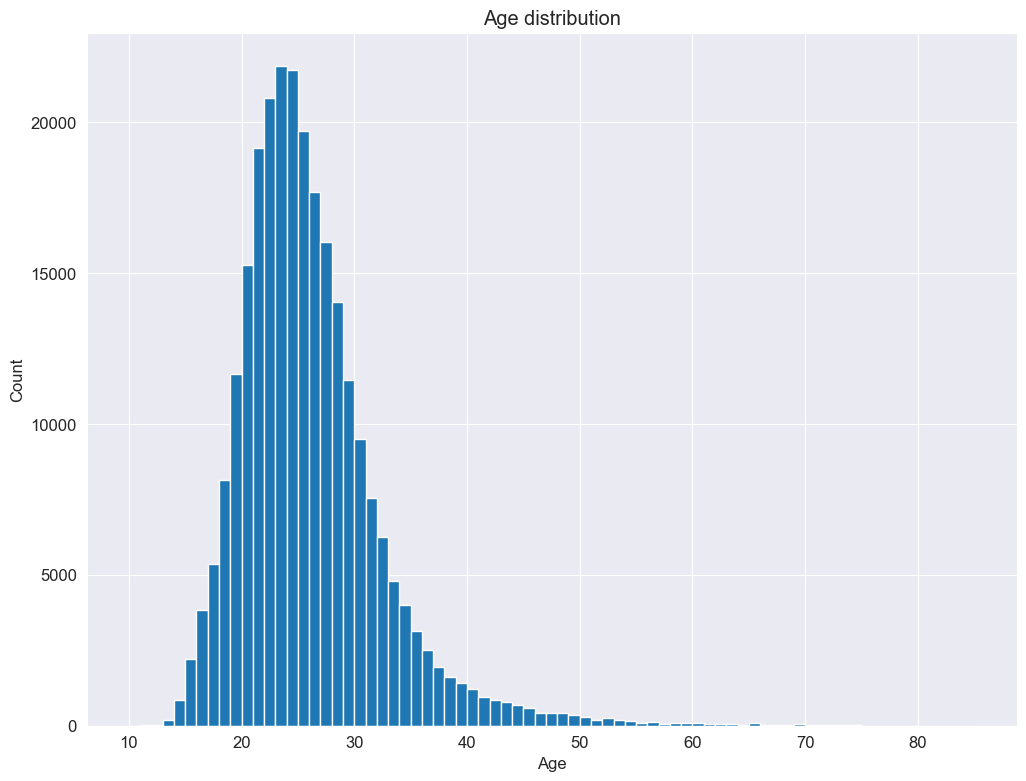

In [35]:
# age histogram
plt.hist(complete_data.Age, bins=75, range=(10, 85))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

In [36]:
min(complete_data.Age.unique())

10.0

In [37]:
max(complete_data.Age.unique())

97.0

In [38]:
# dropna on medal
meds = complete_data.dropna(subset=['Medal'])
meds

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [39]:
# get diff between complete data and meds
nomeds = pd.concat([complete_data, meds]).drop_duplicates(keep=False)
nomeds

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


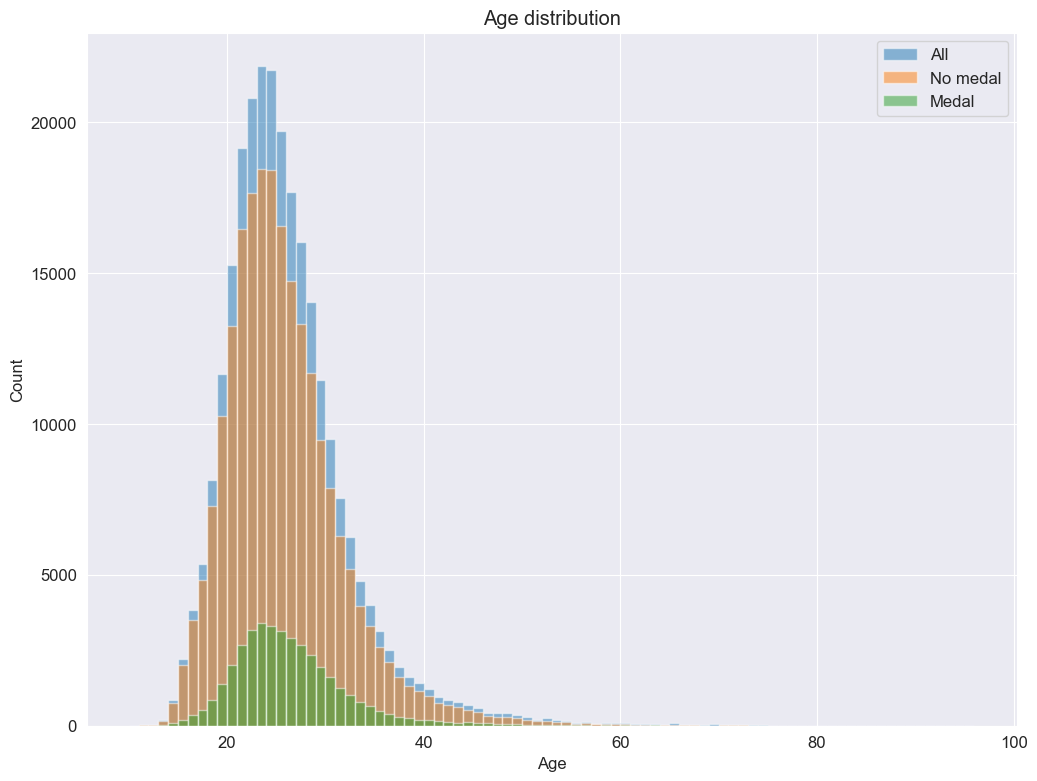

In [40]:
# make 2 histograms with mc and md, age
# do subplots

fig = plt.figure()
plt.hist(complete_data.Age, bins=range(10, 97), alpha=0.5, label='All')
plt.hist(nomeds.Age, bins=range(10, 97), alpha=0.5, label='No medal')
plt.hist(meds.Age,  bins=range(10, 97), alpha=0.5, label='Medal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.legend(loc='upper right')
plt.show()


In [41]:
meds

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


<Axes: xlabel='Age', ylabel='Count'>

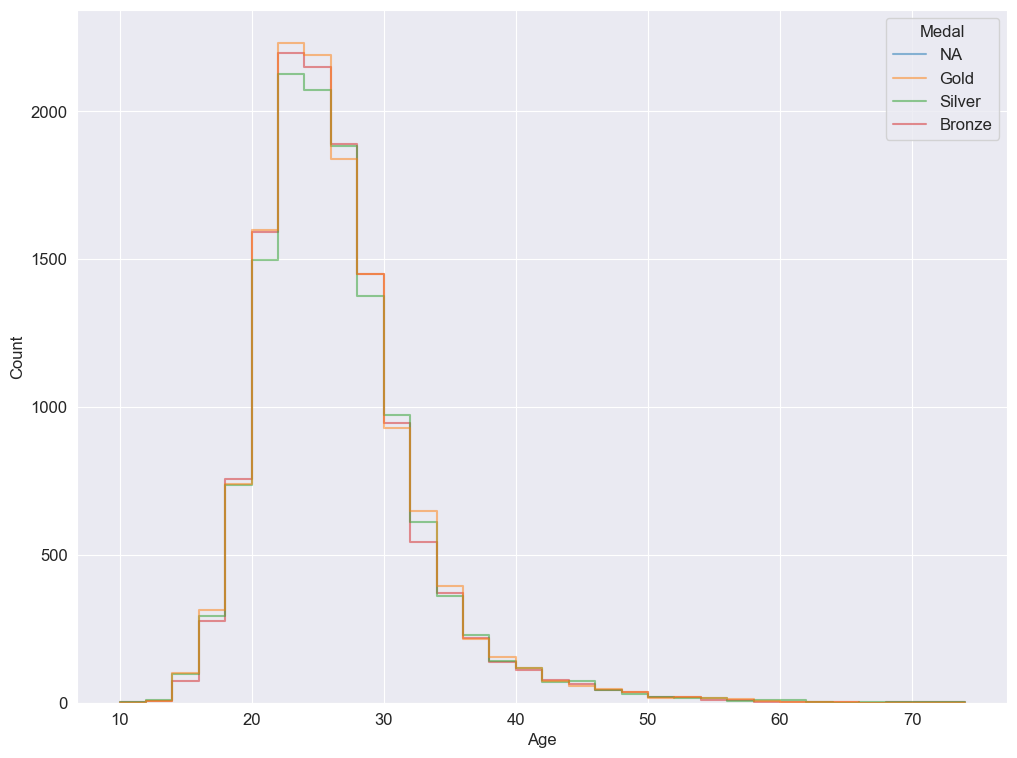

In [42]:
sns.histplot(complete_data, x="Age", hue="Medal",
            alpha=0.5,
            binwidth=2, element="step", fill=False)

In [43]:
complete_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [51]:
# import random forest classifier, train test split, accuracy score,

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing




In [52]:
complete_data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [53]:
def getData(data, random_state=42, test_size=0.3):
    # replace na values in medal with ""
    df = data.copy()
    df['Medal'] = df['Medal'].cat.add_categories('NoMedal')
    df['Medal'].fillna('NoMedal', inplace =True)

    # train test pslit, X = all columns except Team, Games, Sport, Event, Medal
    # y = Medal
    X = df.drop(['Team', 'Games', 'Sport', 'Event', 'Medal'], axis=1)
    y = df['Medal']

    # labelencode y
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(y)


    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # ordinal encode the categorical columns of X_train and X_test
    # fit ordinal encoder on x train
    oe = preprocessing.OrdinalEncoder()
    # fit on X_train
    oe.fit(X_train)

    # transform X_train and X_test
    X_train = oe.transform(X_train)
    X_test = oe.transform(X_test)



    return X_train, X_test, y_train, y_test



In [54]:
X_train, X_test, y_train, y_test = getData(complete_data)



ValueError: Found unknown categories [12, 14, 22, 26, 27, 29, 37, 38, 42, 43, 45, 54, 57, 60, 65, 69, 78, 81, 84, 90, 97, 99, 101, 115, 118, 128, 132, 133, 134, 136, 138, 141, 142, 149, 150, 152, 153, 154, 160, 170, 172, 174, 176, 181, 183, 195, 198, 200, 201, 210, 217, 220, 236, 243, 258, 266, 271, 273, 274, 278, 281, 285, 286, 290, 291, 294, 295, 296, 310, 315, 316, 322, 329, 330, 338, 342, 343, 353, 362, 364, 365, 366, 377, 378, 381, 388, 399, 400, 404, 406, 409, 411, 419, 430, 431, 437, 445, 446, 454, 458, 464, 472, 473, 485, 490, 493, 498, 501, 505, 507, 526, 527, 529, 530, 541, 544, 545, 551, 556, 564, 569, 573, 575, 578, 588, 589, 593, 599, 600, 606, 617, 620, 621, 629, 630, 632, 635, 641, 662, 663, 667, 670, 681, 686, 695, 699, 703, 707, 708, 710, 714, 715, 717, 718, 721, 730, 732, 738, 739, 741, 743, 745, 747, 751, 753, 757, 760, 761, 769, 777, 780, 784, 790, 796, 801, 805, 806, 808, 810, 812, 819, 827, 828, 831, 840, 847, 850, 855, 862, 864, 867, 869, 874, 877, 878, 879, 883, 890, 898, 902, 908, 915, 921, 930, 934, 935, 937, 943, 949, 950, 952, 954, 956, 961, 962, 963, 969, 971, 972, 979, 982, 983, 985, 991, 1000, 1004, 1009, 1010, 1011, 1013, 1016, 1030, 1031, 1035, 1045, 1046, 1047, 1048, 1050, 1053, 1060, 1067, 1068, 1073, 1075, 1078, 1086, 1087, 1090, 1094, 1095, 1104, 1107, 1125, 1126, 1130, 1133, 1150, 1158, 1159, 1160, 1171, 1177, 1186, 1189, 1191, 1194, 1195, 1197, 1202, 1206, 1210, 1211, 1212, 1218, 1228, 1229, 1248, 1253, 1256, 1268, 1269, 1270, 1276, 1280, 1281, 1289, 1292, 1294, 1297, 1298, 1301, 1305, 1308, 1309, 1320, 1321, 1322, 1328, 1332, 1334, 1337, 1338, 1345, 1349, 1351, 1362, 1371, 1372, 1394, 1395, 1396, 1403, 1407, 1408, 1410, 1411, 1415, 1420, 1421, 1424, 1430, 1432, 1437, 1441, 1446, 1456, 1461, 1463, 1465, 1468, 1470, 1471, 1475, 1487, 1490, 1492, 1493, 1494, 1509, 1514, 1517, 1520, 1522, 1530, 1531, 1535, 1537, 1538, 1552, 1555, 1558, 1575, 1576, 1578, 1579, 1583, 1585, 1586, 1591, 1594, 1608, 1612, 1618, 1632, 1647, 1648, 1664, 1668, 1670, 1679, 1683, 1685, 1686, 1687, 1701, 1704, 1707, 1712, 1718, 1722, 1727, 1728, 1730, 1733, 1737, 1744, 1745, 1762, 1772, 1773, 1777, 1781, 1782, 1796, 1813, 1815, 1817, 1824, 1825, 1835, 1845, 1849, 1850, 1851, 1853, 1854, 1860, 1862, 1868, 1872, 1873, 1874, 1878, 1879, 1887, 1888, 1893, 1894, 1895, 1908, 1909, 1917, 1921, 1929, 1939, 1957, 1962, 1963, 1964, 1966, 1969, 1970, 1971, 1975, 1982, 1984, 1987, 1991, 1992, 1993, 1999, 2001, 2007, 2013, 2015, 2023, 2024, 2030, 2032, 2033, 2034, 2037, 2048, 2052, 2062, 2068, 2070, 2073, 2074, 2082, 2087, 2088, 2092, 2096, 2098, 2105, 2108, 2118, 2119, 2124, 2129, 2131, 2136, 2138, 2141, 2146, 2147, 2154, 2156, 2162, 2171, 2174, 2176, 2177, 2180, 2182, 2185, 2187, 2188, 2189, 2192, 2211, 2212, 2213, 2215, 2219, 2224, 2229, 2241, 2244, 2257, 2259, 2261, 2266, 2272, 2279, 2280, 2281, 2284, 2285, 2287, 2293, 2301, 2302, 2310, 2314, 2318, 2324, 2327, 2334, 2335, 2340, 2341, 2344, 2350, 2351, 2355, 2356, 2358, 2365, 2374, 2375, 2388, 2391, 2399, 2400, 2407, 2408, 2410, 2421, 2422, 2424, 2426, 2428, 2429, 2441, 2453, 2455, 2477, 2484, 2485, 2496, 2499, 2500, 2536, 2542, 2548, 2554, 2557, 2563, 2570, 2582, 2591, 2593, 2597, 2616, 2617, 2622, 2623, 2624, 2625, 2627, 2634, 2635, 2641, 2643, 2653, 2655, 2659, 2667, 2679, 2682, 2686, 2697, 2699, 2701, 2705, 2716, 2725, 2727, 2741, 2742, 2743, 2746, 2753, 2757, 2770, 2775, 2778, 2780, 2782, 2789, 2791, 2794, 2805, 2818, 2819, 2825, 2831, 2842, 2844, 2847, 2852, 2853, 2856, 2857, 2861, 2868, 2870, 2873, 2879, 2880, 2882, 2887, 2889, 2891, 2900, 2902, 2908, 2916, 2918, 2920, 2926, 2929, 2935, 2938, 2961, 2972, 2973, 2982, 2999, 3006, 3009, 3014, 3015, 3017, 3019, 3024, 3027, 3031, 3033, 3043, 3053, 3054, 3057, 3059, 3063, 3077, 3090, 3098, 3106, 3111, 3125, 3127, 3135, 3140, 3143, 3144, 3148, 3149, 3152, 3157, 3164, 3173, 3185, 3189, 3194, 3203, 3208, 3212, 3220, 3221, 3223, 3225, 3236, 3240, 3242, 3243, 3244, 3253, 3258, 3263, 3264, 3277, 3279, 3283, 3287, 3299, 3304, 3305, 3315, 3327, 3333, 3334, 3339, 3346, 3348, 3351, 3352, 3357, 3360, 3364, 3370, 3375, 3379, 3382, 3385, 3400, 3402, 3404, 3409, 3410, 3412, 3420, 3421, 3430, 3442, 3454, 3457, 3464, 3474, 3481, 3483, 3488, 3489, 3491, 3498, 3509, 3515, 3518, 3524, 3526, 3527, 3528, 3529, 3532, 3538, 3543, 3547, 3551, 3553, 3560, 3565, 3566, 3569, 3572, 3574, 3578, 3580, 3581, 3588, 3589, 3592, 3598, 3599, 3608, 3618, 3621, 3636, 3637, 3639, 3640, 3648, 3649, 3655, 3658, 3662, 3670, 3680, 3681, 3682, 3690, 3696, 3699, 3706, 3708, 3710, 3712, 3722, 3731, 3737, 3739, 3744, 3752, 3754, 3758, 3767, 3771, 3773, 3781, 3785, 3786, 3787, 3792, 3806, 3813, 3819, 3822, 3832, 3833, 3841, 3842, 3843, 3844, 3846, 3854, 3859, 3860, 3862, 3872, 3879, 3889, 3891, 3897, 3898, 3910, 3915, 3916, 3919, 3924, 3928, 3941, 3947, 3967, 3969, 3971, 3990, 3991, 3995, 3999, 4002, 4011, 4015, 4019, 4021, 4023, 4035, 4036, 4041, 4053, 4054, 4062, 4070, 4072, 4073, 4079, 4081, 4083, 4095, 4096, 4097, 4099, 4113, 4117, 4118, 4122, 4123, 4133, 4136, 4151, 4158, 4162, 4167, 4171, 4176, 4182, 4184, 4186, 4192, 4193, 4203, 4217, 4219, 4231, 4240, 4243, 4245, 4251, 4255, 4275, 4276, 4278, 4281, 4283, 4289, 4291, 4295, 4297, 4316, 4330, 4341, 4347, 4352, 4353, 4355, 4356, 4357, 4372, 4376, 4379, 4387, 4388, 4394, 4405, 4420, 4425, 4434, 4440, 4454, 4455, 4456, 4466, 4468, 4473, 4478, 4484, 4485, 4489, 4496, 4507, 4518, 4521, 4522, 4527, 4528, 4529, 4544, 4547, 4550, 4557, 4565, 4586, 4589, 4598, 4601, 4603, 4618, 4621, 4622, 4625, 4633, 4636, 4637, 4638, 4641, 4643, 4661, 4665, 4666, 4669, 4682, 4688, 4691, 4700, 4701, 4722, 4725, 4733, 4739, 4744, 4757, 4760, 4765, 4772, 4781, 4786, 4787, 4805, 4809, 4810, 4825, 4826, 4831, 4839, 4840, 4849, 4850, 4861, 4864, 4865, 4867, 4868, 4881, 4885, 4891, 4895, 4901, 4902, 4904, 4907, 4908, 4909, 4911, 4913, 4915, 4917, 4923, 4927, 4935, 4939, 4940, 4941, 4944, 4955, 4958, 4960, 4961, 4971, 4984, 4997, 5005, 5008, 5010, 5013, 5025, 5026, 5028, 5030, 5036, 5039, 5040, 5042, 5044, 5045, 5058, 5060, 5067, 5071, 5082, 5085, 5088, 5089, 5090, 5094, 5099, 5109, 5111, 5115, 5117, 5121, 5139, 5142, 5145, 5148, 5157, 5175, 5191, 5196, 5204, 5205, 5211, 5214, 5229, 5231, 5243, 5245, 5251, 5260, 5273, 5276, 5279, 5283, 5288, 5298, 5310, 5312, 5314, 5317, 5320, 5325, 5330, 5331, 5334, 5341, 5344, 5349, 5352, 5359, 5365, 5373, 5375, 5377, 5379, 5382, 5384, 5385, 5392, 5394, 5409, 5417, 5418, 5421, 5433, 5436, 5443, 5446, 5449, 5459, 5460, 5461, 5472, 5474, 5476, 5480, 5484, 5487, 5489, 5493, 5494, 5498, 5502, 5506, 5510, 5516, 5520, 5522, 5523, 5525, 5532, 5534, 5545, 5548, 5563, 5566, 5569, 5571, 5574, 5576, 5578, 5582, 5587, 5588, 5598, 5600, 5607, 5612, 5629, 5633, 5634, 5639, 5640, 5641, 5642, 5644, 5645, 5647, 5649, 5651, 5655, 5658, 5662, 5673, 5677, 5679, 5685, 5690, 5696, 5701, 5704, 5717, 5718, 5722, 5736, 5738, 5741, 5753, 5755, 5759, 5769, 5771, 5777, 5781, 5785, 5803, 5804, 5811, 5812, 5819, 5821, 5822, 5824, 5825, 5827, 5831, 5833, 5835, 5838, 5850, 5853, 5862, 5870, 5881, 5884, 5888, 5889, 5891, 5892, 5900, 5902, 5904, 5910, 5915, 5916, 5919, 5924, 5928, 5941, 5942, 5945, 5949, 5950, 5952, 5953, 5960, 5963, 5978, 5983, 5990, 5995, 5999, 6004, 6011, 6015, 6017, 6020, 6027, 6029, 6030, 6032, 6036, 6037, 6039, 6041, 6046, 6049, 6050, 6056, 6072, 6075, 6091, 6106, 6107, 6108, 6111, 6120, 6122, 6124, 6128, 6132, 6139, 6140, 6147, 6149, 6152, 6155, 6157, 6158, 6163, 6166, 6168, 6172, 6184, 6186, 6189, 6196, 6198, 6200, 6214, 6215, 6219, 6220, 6223, 6226, 6229, 6234, 6237, 6238, 6250, 6263, 6265, 6280, 6281, 6295, 6297, 6307, 6316, 6320, 6325, 6347, 6348, 6350, 6355, 6360, 6363, 6366, 6376, 6377, 6378, 6379, 6380, 6393, 6394, 6410, 6413, 6419, 6420, 6434, 6450, 6454, 6456, 6458, 6463, 6467, 6472, 6473, 6477, 6487, 6491, 6501, 6506, 6510, 6512, 6516, 6517, 6522, 6525, 6528, 6533, 6538, 6551, 6553, 6566, 6569, 6584, 6590, 6591, 6595, 6601, 6603, 6605, 6609, 6614, 6615, 6620, 6639, 6656, 6666, 6668, 6670, 6672, 6677, 6681, 6686, 6687, 6690, 6691, 6699, 6705, 6707, 6713, 6722, 6731, 6734, 6737, 6744, 6745, 6754, 6757, 6760, 6764, 6777, 6779, 6783, 6785, 6791, 6796, 6800, 6805, 6806, 6809, 6816, 6818, 6820, 6821, 6824, 6836, 6838, 6840, 6842, 6843, 6850, 6852, 6853, 6855, 6858, 6859, 6866, 6874, 6875, 6876, 6896, 6897, 6908, 6909, 6911, 6914, 6917, 6918, 6921, 6924, 6927, 6932, 6935, 6937, 6943, 6945, 6949, 6950, 6953, 6957, 6960, 6962, 6965, 6967, 6968, 6974, 6977, 6978, 6980, 6981, 6984, 6987, 6988, 7002, 7006, 7015, 7019, 7027, 7028, 7032, 7040, 7043, 7046, 7049, 7059, 7061, 7066, 7076, 7080, 7100, 7101, 7108, 7114, 7127, 7135, 7137, 7141, 7155, 7159, 7167, 7173, 7184, 7192, 7198, 7200, 7201, 7205, 7206, 7208, 7209, 7210, 7221, 7223, 7225, 7226, 7233, 7234, 7237, 7240, 7246, 7250, 7254, 7258, 7261, 7263, 7268, 7270, 7274, 7279, 7295, 7299, 7312, 7313, 7314, 7326, 7329, 7334, 7341, 7349, 7351, 7352, 7367, 7368, 7378, 7381, 7383, 7385, 7386, 7400, 7402, 7403, 7406, 7408, 7409, 7413, 7419, 7428, 7447, 7453, 7456, 7461, 7473, 7483, 7484, 7493, 7495, 7497, 7498, 7499, 7506, 7507, 7511, 7512, 7516, 7522, 7538, 7540, 7549, 7551, 7556, 7561, 7578, 7581, 7582, 7597, 7598, 7603, 7608, 7615, 7624, 7629, 7636, 7638, 7644, 7646, 7648, 7651, 7655, 7657, 7665, 7670, 7672, 7680, 7682, 7696, 7697, 7700, 7703, 7710, 7715, 7722, 7728, 7731, 7740, 7746, 7747, 7748, 7749, 7755, 7764, 7770, 7777, 7787, 7795, 7798, 7803, 7815, 7816, 7817, 7822, 7827, 7828, 7838, 7843, 7847, 7852, 7857, 7866, 7867, 7868, 7869, 7872, 7883, 7885, 7890, 7892, 7898, 7900, 7904, 7907, 7908, 7909, 7915, 7918, 7933, 7947, 7949, 7950, 7954, 7957, 7960, 7970, 7977, 7983, 7986, 7994, 7996, 7998, 7999, 8000, 8008, 8013, 8016, 8017, 8024, 8040, 8041, 8050, 8057, 8069, 8074, 8075, 8080, 8084, 8090, 8096, 8117, 8122, 8123, 8127, 8130, 8132, 8138, 8141, 8147, 8151, 8157, 8165, 8171, 8172, 8182, 8186, 8194, 8196, 8197, 8204, 8206, 8212, 8218, 8226, 8246, 8247, 8253, 8255, 8258, 8259, 8262, 8265, 8268, 8273, 8277, 8284, 8315, 8316, 8320, 8324, 8327, 8344, 8347, 8353, 8355, 8357, 8363, 8371, 8372, 8377, 8394, 8398, 8401, 8404, 8405, 8416, 8419, 8420, 8421, 8426, 8429, 8433, 8438, 8440, 8446, 8447, 8452, 8453, 8461, 8462, 8465, 8469, 8478, 8496, 8497, 8499, 8509, 8510, 8511, 8517, 8529, 8531, 8532, 8537, 8540, 8543, 8544, 8566, 8569, 8574, 8579, 8582, 8583, 8588, 8591, 8595, 8598, 8600, 8604, 8605, 8606, 8614, 8617, 8622, 8629, 8634, 8642, 8656, 8658, 8667, 8672, 8678, 8680, 8682, 8685, 8690, 8693, 8700, 8703, 8713, 8717, 8721, 8726, 8734, 8737, 8739, 8741, 8744, 8746, 8750, 8755, 8761, 8789, 8797, 8812, 8813, 8814, 8817, 8819, 8837, 8854, 8856, 8860, 8879, 8881, 8887, 8896, 8900, 8901, 8908, 8909, 8911, 8913, 8924, 8925, 8926, 8927, 8932, 8934, 8939, 8940, 8943, 8949, 8957, 8972, 8982, 8983, 8985, 8989, 8992, 8998, 8999, 9005, 9009, 9010, 9014, 9018, 9027, 9029, 9047, 9051, 9053, 9057, 9062, 9066, 9070, 9075, 9081, 9084, 9114, 9126, 9137, 9142, 9143, 9146, 9148, 9150, 9165, 9191, 9206, 9208, 9237, 9246, 9247, 9273, 9285, 9287, 9288, 9289, 9300, 9302, 9304, 9305, 9307, 9308, 9310, 9314, 9318, 9322, 9325, 9326, 9335, 9338, 9341, 9351, 9355, 9360, 9364, 9374, 9382, 9387, 9388, 9397, 9423, 9437, 9459, 9461, 9465, 9466, 9468, 9472, 9485, 9486, 9488, 9499, 9508, 9511, 9520, 9526, 9527, 9529, 9531, 9537, 9547, 9551, 9552, 9558, 9596, 9599, 9601, 9610, 9617, 9619, 9621, 9623, 9625, 9627, 9629, 9651, 9663, 9671, 9682, 9700, 9725, 9733, 9735, 9740, 9751, 9758, 9762, 9766, 9782, 9793, 9802, 9803, 9807, 9813, 9817, 9827, 9828, 9831, 9835, 9838, 9841, 9845, 9851, 9852, 9863, 9869, 9875, 9878, 9883, 9885, 9889, 9890, 9893, 9908, 9912, 9913, 9914, 9918, 9923, 9924, 9934, 9937, 9942, 9943, 9952, 9965, 9969, 9984, 9986, 10004, 10018, 10020, 10035, 10036, 10047, 10050, 10056, 10061, 10068, 10069, 10072, 10073, 10074, 10075, 10081, 10082, 10088, 10097, 10104, 10107, 10109, 10110, 10111, 10114, 10118, 10130, 10132, 10141, 10150, 10165, 10166, 10168, 10173, 10176, 10177, 10185, 10190, 10193, 10195, 10207, 10211, 10215, 10216, 10222, 10225, 10254, 10257, 10259, 10269, 10290, 10297, 10319, 10321, 10331, 10336, 10343, 10352, 10353, 10354, 10369, 10383, 10391, 10394, 10398, 10399, 10416, 10418, 10433, 10435, 10438, 10440, 10442, 10452, 10453, 10457, 10462, 10469, 10471, 10473, 10480, 10481, 10488, 10494, 10495, 10498, 10507, 10509, 10525, 10527, 10530, 10540, 10541, 10547, 10549, 10550, 10556, 10559, 10564, 10569, 10571, 10573, 10577, 10579, 10581, 10584, 10585, 10586, 10590, 10600, 10601, 10603, 10604, 10610, 10622, 10640, 10653, 10655, 10663, 10665, 10667, 10668, 10698, 10701, 10722, 10740, 10741, 10752, 10754, 10757, 10772, 10779, 10782, 10786, 10789, 10796, 10797, 10802, 10808, 10820, 10823, 10837, 10850, 10852, 10855, 10856, 10866, 10868, 10869, 10871, 10873, 10877, 10878, 10881, 10883, 10884, 10895, 10901, 10911, 10916, 10934, 10938, 10941, 10954, 10971, 10976, 10978, 10979, 10980, 10987, 10989, 10997, 11000, 11008, 11022, 11026, 11027, 11032, 11034, 11055, 11059, 11063, 11067, 11075, 11079, 11082, 11093, 11112, 11114, 11116, 11118, 11127, 11130, 11133, 11136, 11140, 11153, 11154, 11160, 11162, 11164, 11178, 11186, 11188, 11199, 11208, 11212, 11221, 11230, 11237, 11251, 11255, 11259, 11262, 11263, 11267, 11268, 11273, 11275, 11276, 11282, 11286, 11288, 11299, 11301, 11303, 11309, 11311, 11314, 11319, 11323, 11324, 11327, 11328, 11329, 11332, 11336, 11338, 11355, 11363, 11377, 11381, 11383, 11387, 11393, 11400, 11403, 11411, 11414, 11415, 11433, 11434, 11435, 11436, 11449, 11450, 11451, 11453, 11457, 11461, 11462, 11464, 11466, 11472, 11477, 11484, 11489, 11494, 11500, 11515, 11521, 11523, 11525, 11527, 11549, 11550, 11569, 11574, 11581, 11582, 11586, 11587, 11607, 11617, 11621, 11624, 11625, 11626, 11627, 11634, 11637, 11641, 11654, 11659, 11661, 11680, 11682, 11687, 11709, 11710, 11714, 11716, 11720, 11722, 11726, 11728, 11731, 11734, 11739, 11741, 11742, 11745, 11750, 11752, 11753, 11762, 11764, 11766, 11770, 11778, 11781, 11793, 11796, 11798, 11800, 11831, 11837, 11847, 11848, 11849, 11851, 11854, 11855, 11856, 11865, 11866, 11867, 11868, 11870, 11873, 11882, 11884, 11886, 11896, 11897, 11914, 11917, 11925, 11927, 11940, 11948, 11953, 11959, 11960, 11982, 11985, 11995, 11996, 11997, 11998, 12013, 12026, 12030, 12043, 12045, 12072, 12074, 12079, 12081, 12085, 12087, 12091, 12096, 12128, 12132, 12136, 12150, 12158, 12161, 12163, 12168, 12169, 12179, 12183, 12187, 12191, 12193, 12196, 12199, 12203, 12218, 12220, 12223, 12230, 12241, 12249, 12252, 12253, 12257, 12267, 12268, 12271, 12272, 12278, 12281, 12282, 12285, 12293, 12296, 12303, 12309, 12312, 12329, 12332, 12340, 12346, 12347, 12348, 12349, 12355, 12365, 12369, 12373, 12377, 12384, 12390, 12393, 12401, 12410, 12411, 12413, 12422, 12424, 12427, 12438, 12446, 12452, 12453, 12458, 12459, 12470, 12480, 12486, 12492, 12497, 12500, 12503, 12504, 12511, 12514, 12516, 12523, 12528, 12529, 12531, 12543, 12545, 12550, 12552, 12557, 12561, 12579, 12583, 12585, 12587, 12590, 12592, 12607, 12611, 12613, 12615, 12617, 12626, 12637, 12642, 12647, 12651, 12655, 12656, 12659, 12662, 12663, 12666, 12670, 12672, 12675, 12677, 12680, 12681, 12688, 12692, 12695, 12704, 12705, 12709, 12715, 12722, 12729, 12734, 12743, 12746, 12747, 12756, 12763, 12771, 12776, 12780, 12783, 12787, 12790, 12796, 12809, 12817, 12819, 12824, 12825, 12832, 12833, 12841, 12842, 12845, 12852, 12853, 12854, 12858, 12870, 12871, 12872, 12877, 12884, 12899, 12901, 12908, 12913, 12917, 12920, 12922, 12926, 12928, 12930, 12934, 12935, 12943, 12944, 12948, 12953, 12955, 12958, 12968, 12973, 12979, 12982, 12986, 12989, 12992, 13003, 13004, 13015, 13016, 13022, 13043, 13049, 13051, 13055, 13057, 13083, 13098, 13100, 13105, 13106, 13109, 13117, 13125, 13130, 13136, 13138, 13144, 13149, 13153, 13156, 13158, 13160, 13167, 13175, 13176, 13192, 13205, 13211, 13220, 13222, 13227, 13236, 13253, 13260, 13265, 13266, 13268, 13275, 13277, 13281, 13283, 13294, 13298, 13308, 13310, 13315, 13316, 13320, 13321, 13326, 13330, 13331, 13333, 13336, 13339, 13344, 13349, 13351, 13355, 13374, 13376, 13379, 13395, 13398, 13399, 13407, 13409, 13411, 13412, 13418, 13420, 13427, 13431, 13433, 13441, 13448, 13451, 13461, 13467, 13469, 13474, 13478, 13480, 13494, 13497, 13502, 13506, 13514, 13537, 13538, 13542, 13560, 13578, 13584, 13607, 13611, 13613, 13622, 13631, 13638, 13646, 13652, 13653, 13656, 13659, 13671, 13672, 13677, 13682, 13704, 13709, 13711, 13720, 13722, 13726, 13732, 13735, 13739, 13744, 13748, 13749, 13753, 13767, 13768, 13771, 13781, 13785, 13791, 13802, 13804, 13809, 13817, 13821, 13825, 13829, 13832, 13834, 13835, 13838, 13849, 13865, 13868, 13869, 13876, 13877, 13885, 13888, 13891, 13895, 13899, 13901, 13904, 13907, 13919, 13920, 13921, 13925, 13963, 13964, 13967, 13971, 13981, 13983, 13986, 13993, 14005, 14006, 14007, 14009, 14025, 14027, 14032, 14035, 14055, 14057, 14059, 14060, 14061, 14069, 14072, 14077, 14078, 14086, 14091, 14096, 14098, 14102, 14116, 14117, 14125, 14129, 14140, 14141, 14147, 14150, 14153, 14154, 14160, 14161, 14162, 14164, 14166, 14168, 14169, 14179, 14186, 14189, 14190, 14194, 14195, 14201, 14213, 14214, 14215, 14219, 14220, 14221, 14228, 14231, 14232, 14238, 14241, 14247, 14249, 14252, 14268, 14271, 14277, 14279, 14296, 14299, 14306, 14308, 14311, 14346, 14350, 14363, 14371, 14372, 14377, 14387, 14391, 14394, 14396, 14399, 14404, 14408, 14410, 14432, 14442, 14445, 14446, 14447, 14452, 14456, 14459, 14463, 14469, 14471, 14474, 14478, 14483, 14489, 14501, 14511, 14514, 14526, 14527, 14529, 14533, 14534, 14536, 14541, 14550, 14559, 14560, 14562, 14564, 14566, 14567, 14569, 14570, 14571, 14572, 14573, 14574, 14576, 14583, 14587, 14594, 14599, 14600, 14605, 14606, 14609, 14619, 14620, 14621, 14622, 14623, 14627, 14629, 14634, 14642, 14648, 14652, 14658, 14662, 14663, 14670, 14672, 14680, 14682, 14687, 14693, 14695, 14699, 14705, 14708, 14714, 14724, 14727, 14728, 14734, 14740, 14744, 14751, 14757, 14767, 14773, 14779, 14780, 14783, 14784, 14798, 14800, 14801, 14817, 14824, 14825, 14826, 14836, 14840, 14849, 14851, 14868, 14877, 14881, 14884, 14885, 14894, 14895, 14900, 14902, 14905, 14907, 14908, 14919, 14923, 14934, 14948, 14955, 14961, 14963, 14967, 14972, 14974, 14984, 14985, 14987, 14995, 14997, 15002, 15004, 15008, 15010, 15014, 15022, 15029, 15033, 15045, 15050, 15054, 15058, 15061, 15062, 15072, 15076, 15083, 15086, 15098, 15103, 15106, 15110, 15116, 15121, 15123, 15136, 15139, 15155, 15169, 15172, 15174, 15175, 15184, 15196, 15208, 15209, 15216, 15218, 15233, 15235, 15236, 15238, 15241, 15245, 15248, 15254, 15256, 15258, 15260, 15267, 15268, 15283, 15285, 15286, 15290, 15294, 15297, 15298, 15304, 15308, 15317, 15322, 15329, 15336, 15349, 15355, 15359, 15360, 15364, 15370, 15371, 15375, 15388, 15391, 15393, 15398, 15409, 15411, 15414, 15423, 15426, 15429, 15430, 15443, 15446, 15455, 15456, 15464, 15472, 15479, 15493, 15496, 15497, 15510, 15525, 15538, 15550, 15551, 15554, 15555, 15558, 15560, 15564, 15568, 15577, 15593, 15597, 15601, 15609, 15610, 15613, 15615, 15625, 15626, 15634, 15646, 15647, 15648, 15651, 15654, 15655, 15658, 15662, 15663, 15672, 15673, 15678, 15685, 15690, 15709, 15717, 15729, 15733, 15735, 15738, 15758, 15760, 15762, 15763, 15768, 15770, 15773, 15777, 15778, 15780, 15787, 15789, 15795, 15797, 15800, 15806, 15809, 15810, 15813, 15815, 15822, 15823, 15826, 15827, 15830, 15838, 15845, 15852, 15854, 15862, 15869, 15888, 15895, 15899, 15908, 15917, 15919, 15921, 15922, 15924, 15927, 15934, 15940, 15942, 15943, 15956, 15972, 15976, 15980, 15984, 15989, 15990, 16004, 16007, 16011, 16012, 16013, 16014, 16020, 16024, 16032, 16036, 16037, 16039, 16042, 16043, 16046, 16064, 16067, 16077, 16079, 16082, 16085, 16087, 16091, 16092, 16095, 16100, 16101, 16102, 16103, 16109, 16111, 16112, 16116, 16124, 16132, 16137, 16141, 16144, 16149, 16151, 16171, 16176, 16180, 16181, 16183, 16186, 16191, 16198, 16211, 16212, 16218, 16229, 16232, 16234, 16243, 16245, 16246, 16251, 16254, 16265, 16269, 16274, 16275, 16281, 16282, 16285, 16287, 16289, 16297, 16299, 16302, 16306, 16319, 16320, 16331, 16337, 16342, 16344, 16353, 16358, 16363, 16369, 16370, 16371, 16372, 16374, 16385, 16388, 16393, 16394, 16402, 16411, 16426, 16428, 16442, 16449, 16455, 16460, 16464, 16471, 16474, 16477, 16479, 16480, 16482, 16489, 16496, 16498, 16499, 16506, 16512, 16521, 16528, 16530, 16531, 16532, 16535, 16544, 16548, 16549, 16552, 16563, 16573, 16574, 16575, 16577, 16581, 16587, 16602, 16605, 16611, 16612, 16619, 16620, 16621, 16624, 16626, 16637, 16642, 16646, 16647, 16651, 16659, 16666, 16667, 16668, 16669, 16673, 16685, 16686, 16687, 16694, 16696, 16703, 16715, 16720, 16727, 16729, 16739, 16741, 16750, 16751, 16753, 16754, 16761, 16767, 16768, 16771, 16772, 16773, 16781, 16789, 16792, 16803, 16812, 16815, 16827, 16830, 16831, 16833, 16839, 16841, 16844, 16847, 16848, 16856, 16866, 16868, 16876, 16879, 16884, 16886, 16889, 16896, 16899, 16907, 16915, 16917, 16926, 16939, 16941, 16947, 16957, 16967, 16973, 16974, 16975, 16987, 16988, 16990, 16999, 17001, 17003, 17004, 17015, 17026, 17028, 17029, 17030, 17032, 17039, 17041, 17044, 17052, 17055, 17063, 17065, 17077, 17079, 17081, 17083, 17087, 17093, 17095, 17098, 17108, 17112, 17116, 17131, 17132, 17141, 17143, 17147, 17149, 17156, 17160, 17164, 17167, 17168, 17181, 17185, 17186, 17193, 17205, 17206, 17214, 17215, 17219, 17222, 17239, 17241, 17251, 17256, 17257, 17268, 17288, 17290, 17298, 17311, 17312, 17316, 17321, 17332, 17336, 17340, 17347, 17353, 17361, 17372, 17380, 17382, 17396, 17398, 17400, 17401, 17404, 17408, 17414, 17417, 17424, 17425, 17428, 17430, 17435, 17438, 17453, 17460, 17465, 17475, 17479, 17484, 17496, 17498, 17505, 17517, 17521, 17525, 17532, 17549, 17552, 17554, 17559, 17566, 17572, 17578, 17581, 17609, 17614, 17616, 17619, 17621, 17623, 17626, 17630, 17643, 17644, 17645, 17652, 17653, 17660, 17666, 17668, 17670, 17671, 17672, 17673, 17681, 17688, 17692, 17701, 17708, 17709, 17722, 17723, 17727, 17732, 17736, 17746, 17748, 17754, 17765, 17767, 17769, 17772, 17778, 17794, 17799, 17803, 17806, 17809, 17810, 17813, 17817, 17819, 17828, 17832, 17844, 17858, 17859, 17861, 17865, 17867, 17870, 17886, 17893, 17896, 17904, 17908, 17911, 17916, 17917, 17925, 17930, 17934, 17936, 17938, 17941, 17945, 17954, 17956, 17965, 17971, 17974, 17975, 17979, 17981, 17991, 17995, 17999, 18002, 18009, 18019, 18020, 18021, 18023, 18025, 18035, 18041, 18043, 18048, 18049, 18050, 18086, 18095, 18101, 18106, 18108, 18109, 18112, 18117, 18120, 18123, 18131, 18136, 18139, 18158, 18160, 18161, 18185, 18196, 18205, 18209, 18218, 18221, 18225, 18226, 18228, 18233, 18244, 18249, 18254, 18267, 18270, 18300, 18308, 18316, 18321, 18326, 18329, 18331, 18332, 18333, 18345, 18346, 18352, 18354, 18361, 18365, 18366, 18367, 18378, 18379, 18386, 18387, 18397, 18399, 18404, 18406, 18420, 18424, 18432, 18439, 18444, 18461, 18465, 18466, 18472, 18476, 18480, 18483, 18484, 18485, 18489, 18492, 18494, 18496, 18507, 18508, 18511, 18512, 18533, 18534, 18536, 18543, 18548, 18553, 18556, 18557, 18558, 18569, 18573, 18574, 18587, 18589, 18591, 18603, 18609, 18610, 18612, 18615, 18626, 18629, 18634, 18635, 18637, 18639, 18642, 18644, 18658, 18662, 18667, 18675, 18681, 18686, 18687, 18688, 18693, 18694, 18702, 18706, 18707, 18710, 18712, 18729, 18730, 18738, 18745, 18748, 18751, 18754, 18760, 18766, 18770, 18771, 18775, 18777, 18780, 18782, 18787, 18791, 18792, 18793, 18798, 18801, 18803, 18805, 18809, 18811, 18813, 18817, 18819, 18830, 18834, 18839, 18843, 18844, 18846, 18856, 18857, 18860, 18862, 18863, 18864, 18870, 18872, 18873, 18874, 18876, 18877, 18884, 18886, 18891, 18892, 18900, 18902, 18916, 18928, 18934, 18935, 18944, 18946, 18952, 18966, 18967, 18972, 18985, 18993, 18995, 19001, 19008, 19009, 19010, 19011, 19012, 19017, 19033, 19039, 19050, 19051, 19052, 19054, 19056, 19060, 19069, 19070, 19072, 19088, 19091, 19106, 19108, 19111, 19122, 19123, 19126, 19133, 19134, 19144, 19146, 19147, 19149, 19157, 19170, 19174, 19178, 19182, 19193, 19203, 19213, 19216, 19221, 19224, 19226, 19227, 19231, 19238, 19241, 19243, 19248, 19249, 19251, 19278, 19279, 19283, 19284, 19287, 19288, 19289, 19291, 19292, 19296, 19297, 19303, 19312, 19314, 19321, 19331, 19337, 19349, 19350, 19355, 19363, 19370, 19372, 19378, 19379, 19390, 19391, 19400, 19405, 19406, 19408, 19410, 19413, 19414, 19416, 19423, 19426, 19434, 19437, 19438, 19440, 19442, 19444, 19458, 19475, 19482, 19487, 19490, 19498, 19501, 19508, 19512, 19520, 19522, 19523, 19529, 19531, 19535, 19539, 19541, 19549, 19553, 19570, 19572, 19574, 19577, 19580, 19585, 19586, 19589, 19591, 19593, 19605, 19608, 19612, 19620, 19621, 19622, 19625, 19633, 19639, 19645, 19647, 19651, 19653, 19665, 19667, 19672, 19678, 19683, 19703, 19705, 19710, 19713, 19720, 19721, 19724, 19727, 19729, 19731, 19732, 19740, 19741, 19745, 19749, 19750, 19761, 19762, 19764, 19770, 19774, 19776, 19777, 19791, 19795, 19799, 19809, 19811, 19814, 19815, 19816, 19818, 19822, 19834, 19839, 19842, 19848, 19849, 19863, 19872, 19873, 19881, 19888, 19892, 19896, 19897, 19900, 19901, 19902, 19904, 19935, 19936, 19947, 19957, 19959, 19960, 19968, 19971, 19981, 19984, 19987, 19988, 19989, 19990, 20003, 20008, 20009, 20012, 20015, 20017, 20021, 20031, 20037, 20038, 20039, 20040, 20042, 20053, 20056, 20057, 20064, 20068, 20070, 20072, 20078, 20083, 20085, 20088, 20090, 20091, 20094, 20102, 20113, 20115, 20126, 20132, 20141, 20143, 20147, 20151, 20153, 20154, 20157, 20160, 20161, 20182, 20185, 20189, 20200, 20208, 20209, 20225, 20237, 20242, 20244, 20256, 20265, 20271, 20273, 20276, 20286, 20289, 20291, 20293, 20295, 20302, 20303, 20314, 20316, 20318, 20320, 20321, 20328, 20331, 20334, 20344, 20346, 20349, 20350, 20352, 20358, 20373, 20381, 20387, 20389, 20390, 20391, 20399, 20400, 20409, 20412, 20413, 20416, 20417, 20419, 20428, 20430, 20437, 20443, 20444, 20452, 20454, 20461, 20462, 20471, 20472, 20476, 20480, 20482, 20483, 20494, 20498, 20505, 20508, 20511, 20513, 20518, 20522, 20528, 20538, 20542, 20558, 20562, 20569, 20575, 20579, 20585, 20592, 20598, 20604, 20605, 20608, 20612, 20616, 20619, 20623, 20624, 20627, 20631, 20643, 20654, 20661, 20669, 20674, 20687, 20692, 20697, 20704, 20714, 20719, 20720, 20727, 20731, 20737, 20746, 20758, 20760, 20766, 20770, 20771, 20776, 20778, 20780, 20783, 20785, 20809, 20810, 20812, 20813, 20815, 20819, 20820, 20832, 20834, 20839, 20841, 20845, 20849, 20857, 20861, 20872, 20883, 20889, 20893, 20899, 20902, 20903, 20908, 20913, 20914, 20916, 20924, 20930, 20937, 20943, 20951, 20957, 20959, 20968, 20970, 20971, 20979, 20985, 20989, 21003, 21006, 21021, 21035, 21042, 21044, 21052, 21054, 21057, 21063, 21068, 21069, 21070, 21072, 21075, 21081, 21092, 21095, 21096, 21099, 21108, 21110, 21119, 21122, 21125, 21131, 21137, 21141, 21144, 21154, 21158, 21159, 21167, 21173, 21180, 21183, 21187, 21190, 21192, 21194, 21195, 21208, 21210, 21217, 21218, 21220, 21224, 21230, 21241, 21242, 21243, 21249, 21255, 21261, 21263, 21268, 21271, 21278, 21282, 21285, 21295, 21296, 21301, 21309, 21310, 21329, 21332, 21348, 21351, 21354, 21359, 21362, 21364, 21379, 21382, 21387, 21391, 21393, 21395, 21397, 21403, 21405, 21410, 21411, 21418, 21446, 21447, 21464, 21466, 21471, 21472, 21476, 21483, 21488, 21491, 21494, 21500, 21502, 21504, 21508, 21533, 21538, 21545, 21547, 21554, 21564, 21578, 21579, 21586, 21593, 21595, 21601, 21609, 21611, 21612, 21621, 21626, 21634, 21638, 21641, 21646, 21650, 21651, 21653, 21654, 21655, 21668, 21678, 21683, 21685, 21688, 21694, 21697, 21700, 21708, 21723, 21726, 21730, 21736, 21743, 21753, 21758, 21773, 21774, 21780, 21782, 21787, 21793, 21796, 21805, 21806, 21810, 21812, 21822, 21823, 21826, 21829, 21845, 21846, 21872, 21875, 21876, 21877, 21888, 21889, 21897, 21898, 21904, 21924, 21928, 21939, 21942, 21943, 21945, 21959, 21973, 21984, 21987, 21992, 21994, 22019, 22030, 22038, 22041, 22043, 22048, 22053, 22064, 22065, 22074, 22077, 22079, 22080, 22082, 22085, 22095, 22101, 22103, 22113, 22115, 22116, 22117, 22123, 22124, 22135, 22136, 22150, 22153, 22154, 22173, 22177, 22184, 22193, 22195, 22197, 22198, 22203, 22205, 22213, 22218, 22234, 22235, 22240, 22244, 22253, 22256, 22257, 22268, 22288, 22292, 22299, 22300, 22302, 22306, 22307, 22308, 22309, 22311, 22313, 22320, 22331, 22335, 22340, 22344, 22345, 22350, 22357, 22382, 22389, 22397, 22398, 22399, 22401, 22406, 22411, 22421, 22424, 22430, 22434, 22436, 22440, 22443, 22448, 22451, 22456, 22458, 22459, 22470, 22472, 22473, 22476, 22477, 22484, 22485, 22493, 22503, 22504, 22512, 22513, 22516, 22520, 22527, 22529, 22530, 22531, 22532, 22533, 22541, 22548, 22554, 22555, 22572, 22579, 22583, 22584, 22588, 22590, 22592, 22601, 22602, 22604, 22607, 22608, 22612, 22616, 22617, 22622, 22627, 22628, 22638, 22639, 22640, 22647, 22663, 22666, 22669, 22686, 22690, 22694, 22705, 22706, 22709, 22712, 22714, 22717, 22718, 22719, 22722, 22726, 22727, 22733, 22738, 22745, 22746, 22758, 22770, 22781, 22785, 22786, 22790, 22801, 22804, 22805, 22806, 22813, 22815, 22821, 22822, 22824, 22833, 22840, 22842, 22849, 22855, 22861, 22872, 22873, 22881, 22885, 22887, 22896, 22904, 22905, 22909, 22916, 22924, 22937, 22940, 22958, 22959, 22970, 22983, 22985, 22990, 23003, 23005, 23014, 23019, 23024, 23031, 23036, 23037, 23039, 23041, 23045, 23047, 23049, 23057, 23060, 23071, 23080, 23083, 23099, 23101, 23102, 23104, 23111, 23114, 23117, 23118, 23119, 23122, 23124, 23127, 23128, 23139, 23141, 23144, 23148, 23153, 23155, 23159, 23163, 23165, 23170, 23177, 23180, 23182, 23184, 23187, 23194, 23198, 23200, 23214, 23218, 23219, 23221, 23223, 23225, 23241, 23242, 23245, 23246, 23248, 23254, 23264, 23265, 23270, 23274, 23281, 23284, 23286, 23289, 23294, 23295, 23297, 23298, 23300, 23304, 23313, 23314, 23316, 23319, 23324, 23333, 23338, 23341, 23353, 23358, 23363, 23369, 23371, 23378, 23379, 23384, 23386, 23391, 23398, 23401, 23405, 23407, 23419, 23420, 23427, 23439, 23441, 23448, 23449, 23450, 23451, 23453, 23460, 23461, 23467, 23472, 23473, 23475, 23486, 23494, 23497, 23499, 23507, 23509, 23515, 23516, 23520, 23523, 23525, 23536, 23539, 23543, 23554, 23556, 23557, 23563, 23571, 23580, 23586, 23587, 23589, 23591, 23593, 23595, 23600, 23601, 23611, 23619, 23621, 23631, 23632, 23640, 23651, 23663, 23669, 23677, 23681, 23692, 23695, 23698, 23704, 23706, 23708, 23722, 23733, 23734, 23737, 23740, 23750, 23754, 23757, 23759, 23763, 23767, 23770, 23772, 23777, 23779, 23784, 23802, 23803, 23809, 23817, 23819, 23824, 23827, 23830, 23836, 23844, 23853, 23854, 23856, 23860, 23867, 23870, 23879, 23880, 23883, 23885, 23886, 23889, 23895, 23896, 23897, 23903, 23904, 23909, 23911, 23912, 23918, 23919, 23924, 23925, 23928, 23934, 23937, 23947, 23955, 23956, 23962, 23966, 23968, 23975, 23983, 23989, 23990, 23994, 23996, 24005, 24008, 24025, 24028, 24032, 24044, 24049, 24057, 24059, 24060, 24072, 24087, 24096, 24103, 24108, 24111, 24117, 24133, 24140, 24147, 24152, 24161, 24163, 24173, 24176, 24180, 24182, 24185, 24186, 24191, 24194, 24210, 24214, 24218, 24224, 24225, 24232, 24248, 24253, 24259, 24263, 24265, 24269, 24270, 24273, 24275, 24277, 24288, 24297, 24299, 24305, 24313, 24318, 24328, 24329, 24337, 24338, 24341, 24346, 24348, 24352, 24353, 24355, 24366, 24367, 24383, 24394, 24402, 24404, 24405, 24419, 24432, 24436, 24437, 24439, 24440, 24445, 24449, 24451, 24458, 24459, 24466, 24468, 24475, 24481, 24485, 24488, 24489, 24501, 24504, 24507, 24511, 24512, 24514, 24517, 24518, 24521, 24523, 24529, 24553, 24566, 24569, 24571, 24585, 24586, 24588, 24599, 24602, 24607, 24608, 24610, 24612, 24615, 24617, 24620, 24622, 24624, 24634, 24639, 24645, 24651, 24664, 24668, 24674, 24679, 24683, 24688, 24691, 24695, 24703, 24725, 24728, 24729, 24737, 24739, 24748, 24755, 24759, 24763, 24770, 24775, 24777, 24784, 24786, 24789, 24791, 24794, 24797, 24798, 24800, 24812, 24813, 24816, 24823, 24824, 24832, 24855, 24856, 24868, 24873, 24884, 24885, 24891, 24898, 24899, 24906, 24910, 24914, 24918, 24919, 24924, 24927, 24928, 24930, 24931, 24932, 24937, 24941, 24942, 24947, 24958, 24966, 24972, 24984, 24992, 24994, 25000, 25002, 25006, 25008, 25012, 25017, 25022, 25025, 25029, 25037, 25042, 25043, 25050, 25056, 25057, 25058, 25064, 25071, 25074, 25078, 25081, 25083, 25087, 25096, 25105, 25106, 25109, 25120, 25127, 25133, 25137, 25149, 25155, 25156, 25158, 25167, 25178, 25182, 25186, 25194, 25195, 25200, 25205, 25206, 25218, 25229, 25230, 25231, 25244, 25248, 25260, 25272, 25277, 25279, 25287, 25291, 25292, 25294, 25295, 25296, 25299, 25303, 25313, 25317, 25318, 25322, 25325, 25328, 25329, 25334, 25342, 25360, 25373, 25378, 25384, 25387, 25392, 25397, 25428, 25435, 25441, 25453, 25454, 25458, 25460, 25462, 25463, 25472, 25474, 25475, 25476, 25485, 25487, 25489, 25491, 25492, 25500, 25510, 25514, 25515, 25517, 25528, 25529, 25536, 25542, 25568, 25571, 25584, 25586, 25587, 25590, 25594, 25603, 25605, 25630, 25637, 25650, 25651, 25656, 25657, 25660, 25666, 25667, 25675, 25677, 25679, 25683, 25685, 25695, 25699, 25705, 25710, 25724, 25726, 25736, 25737, 25739, 25752, 25753, 25756, 25763, 25768, 25771, 25776, 25777, 25786, 25788, 25796, 25802, 25816, 25817, 25821, 25826, 25828, 25831, 25836, 25838, 25847, 25848, 25852, 25853, 25861, 25865, 25868, 25873, 25884, 25885, 25887, 25892, 25897, 25901, 25905, 25909, 25913, 25914, 25915, 25917, 25922, 25932, 25933, 25936, 25943, 25949, 25956, 25963, 25967, 25968, 25976, 25990, 25997, 26002, 26008, 26017, 26023, 26038, 26042, 26043, 26044, 26045, 26050, 26056, 26059, 26065, 26066, 26083, 26114, 26122, 26123, 26132, 26137, 26141, 26142, 26146, 26154, 26159, 26170, 26181, 26182, 26183, 26185, 26189, 26198, 26209, 26222, 26225, 26232, 26247, 26251, 26252, 26253, 26269, 26280, 26282, 26285, 26288, 26300, 26301, 26310, 26317, 26318, 26320, 26322, 26323, 26324, 26332, 26334, 26337, 26346, 26351, 26352, 26355, 26356, 26363, 26366, 26376, 26378, 26379, 26382, 26387, 26389, 26390, 26400, 26407, 26412, 26417, 26422, 26426, 26427, 26428, 26429, 26433, 26452, 26457, 26465, 26478, 26479, 26480, 26483, 26501, 26502, 26513, 26519, 26527, 26528, 26531, 26532, 26541, 26543, 26549, 26550, 26551, 26562, 26563, 26566, 26569, 26570, 26590, 26602, 26604, 26606, 26613, 26616, 26625, 26627, 26629, 26637, 26638, 26647, 26649, 26655, 26656, 26660, 26661, 26668, 26672, 26675, 26681, 26683, 26686, 26700, 26702, 26710, 26711, 26717, 26720, 26724, 26727, 26732, 26746, 26754, 26764, 26772, 26784, 26794, 26796, 26799, 26806, 26812, 26816, 26817, 26823, 26846, 26848, 26849, 26850, 26851, 26858, 26871, 26884, 26888, 26889, 26895, 26900, 26901, 26903, 26907, 26913, 26918, 26932, 26933, 26934, 26935, 26937, 26942, 26944, 26946, 26953, 26956, 26959, 26963, 26964, 26972, 26973, 26982, 26984, 26991, 26994, 26996, 26998, 27015, 27016, 27017, 27020, 27024, 27025, 27027, 27034, 27039, 27044, 27046, 27060, 27062, 27065, 27067, 27073, 27076, 27078, 27087, 27091, 27096, 27106, 27112, 27120, 27128, 27131, 27134, 27135, 27137, 27138, 27145, 27146, 27153, 27154, 27155, 27156, 27170, 27171, 27175, 27177, 27183, 27186, 27197, 27203, 27205, 27216, 27218, 27222, 27230, 27237, 27245, 27248, 27259, 27261, 27270, 27273, 27274, 27282, 27290, 27294, 27295, 27298, 27304, 27307, 27308, 27320, 27324, 27331, 27334, 27346, 27349, 27351, 27358, 27361, 27370, 27372, 27379, 27381, 27388, 27402, 27406, 27408, 27411, 27415, 27419, 27424, 27432, 27435, 27437, 27440, 27441, 27444, 27455, 27461, 27478, 27493, 27495, 27501, 27510, 27511, 27521, 27523, 27524, 27532, 27533, 27535, 27538, 27547, 27551, 27554, 27559, 27562, 27568, 27574, 27578, 27586, 27590, 27593, 27596, 27603, 27610, 27611, 27613, 27616, 27623, 27624, 27630, 27631, 27633, 27642, 27647, 27656, 27657, 27661, 27665, 27670, 27671, 27672, 27675, 27686, 27691, 27698, 27699, 27701, 27704, 27707, 27720, 27725, 27726, 27732, 27744, 27746, 27748, 27763, 27765, 27770, 27786, 27788, 27798, 27804, 27806, 27807, 27809, 27815, 27818, 27822, 27829, 27830, 27834, 27840, 27842, 27843, 27845, 27846, 27854, 27861, 27862, 27863, 27869, 27879, 27881, 27893, 27894, 27895, 27903, 27909, 27910, 27912, 27923, 27925, 27933, 27934, 27938, 27939, 27942, 27943, 27958, 27962, 27965, 27967, 27973, 27975, 27976, 27981, 27984, 27985, 27990, 27991, 27997, 28002, 28007, 28008, 28024, 28030, 28037, 28039, 28042, 28064, 28065, 28066, 28067, 28068, 28069, 28083, 28084, 28098, 28118, 28119, 28120, 28137, 28141, 28144, 28160, 28164, 28166, 28168, 28170, 28174, 28175, 28180, 28181, 28186, 28187, 28193, 28201, 28203, 28215, 28217, 28219, 28224, 28225, 28228, 28229, 28231, 28238, 28241, 28250, 28252, 28260, 28270, 28276, 28280, 28294, 28295, 28296, 28303, 28314, 28317, 28322, 28325, 28334, 28340, 28342, 28349, 28364, 28365, 28367, 28369, 28373, 28377, 28380, 28381, 28391, 28398, 28405, 28406, 28415, 28419, 28420, 28424, 28427, 28432, 28437, 28439, 28440, 28446, 28447, 28452, 28467, 28474, 28486, 28494, 28500, 28506, 28508, 28512, 28518, 28521, 28524, 28535, 28545, 28546, 28551, 28555, 28560, 28563, 28573, 28579, 28583, 28589, 28596, 28598, 28603, 28604, 28608, 28616, 28617, 28623, 28633, 28641, 28643, 28644, 28648, 28651, 28666, 28668, 28673, 28686, 28687, 28697, 28702, 28709, 28715, 28718, 28721, 28731, 28732, 28735, 28736, 28737, 28739, 28740, 28743, 28749, 28756, 28758, 28760, 28761, 28772, 28775, 28783, 28801, 28807, 28809, 28810, 28812, 28820, 28824, 28825, 28826, 28831, 28837, 28844, 28851, 28859, 28862, 28880, 28885, 28886, 28891, 28893, 28894, 28901, 28906, 28913, 28920, 28923, 28924, 28926, 28931, 28932, 28933, 28934, 28941, 28942, 28943, 28951, 28952, 28955, 28956, 28958, 28961, 28963, 28969, 28987, 28997, 28999, 29016, 29018, 29019, 29021, 29034, 29045, 29051, 29067, 29069, 29074, 29075, 29079, 29081, 29083, 29090, 29097, 29102, 29105, 29110, 29120, 29127, 29130, 29146, 29148, 29158, 29169, 29170, 29185, 29187, 29194, 29195, 29207, 29216, 29217, 29220, 29222, 29229, 29231, 29234, 29239, 29240, 29244, 29246, 29249, 29251, 29257, 29262, 29277, 29279, 29284, 29299, 29301, 29304, 29311, 29319, 29327, 29331, 29332, 29353, 29355, 29358, 29367, 29378, 29381, 29397, 29403, 29406, 29407, 29414, 29420, 29425, 29427, 29430, 29432, 29435, 29439, 29443, 29449, 29457, 29470, 29482, 29487, 29490, 29492, 29497, 29504, 29507, 29510, 29513, 29515, 29518, 29519, 29522, 29524, 29526, 29527, 29530, 29538, 29541, 29544, 29546, 29561, 29567, 29568, 29579, 29582, 29595, 29602, 29603, 29615, 29633, 29642, 29647, 29652, 29656, 29662, 29668, 29669, 29682, 29688, 29695, 29701, 29714, 29715, 29720, 29721, 29722, 29732, 29743, 29745, 29754, 29761, 29763, 29765, 29768, 29778, 29779, 29793, 29794, 29800, 29807, 29808, 29818, 29828, 29833, 29839, 29841, 29842, 29844, 29847, 29860, 29861, 29862, 29864, 29865, 29866, 29873, 29876, 29880, 29884, 29885, 29886, 29893, 29923, 29928, 29929, 29930, 29936, 29938, 29940, 29956, 29961, 29966, 29973, 29976, 29983, 29986, 29989, 30001, 30010, 30012, 30016, 30023, 30028, 30029, 30034, 30046, 30050, 30051, 30055, 30061, 30062, 30071, 30074, 30079, 30085, 30087, 30102, 30111, 30113, 30116, 30121, 30125, 30126, 30140, 30158, 30162, 30165, 30166, 30170, 30178, 30189, 30196, 30211, 30213, 30217, 30222, 30224, 30225, 30234, 30235, 30241, 30244, 30247, 30256, 30260, 30264, 30265, 30273, 30292, 30293, 30297, 30307, 30311, 30312, 30317, 30318, 30319, 30324, 30325, 30336, 30343, 30344, 30346, 30351, 30355, 30356, 30359, 30372, 30385, 30399, 30406, 30414, 30419, 30421, 30427, 30431, 30459, 30471, 30477, 30485, 30490, 30492, 30498, 30502, 30515, 30518, 30521, 30533, 30534, 30537, 30543, 30552, 30553, 30554, 30555, 30557, 30560, 30561, 30565, 30574, 30577, 30578, 30588, 30592, 30598, 30601, 30602, 30603, 30608, 30611, 30615, 30622, 30632, 30637, 30640, 30647, 30655, 30656, 30671, 30678, 30687, 30690, 30693, 30696, 30697, 30700, 30701, 30702, 30707, 30712, 30721, 30722, 30723, 30726, 30737, 30743, 30749, 30750, 30751, 30754, 30758, 30762, 30764, 30771, 30774, 30779, 30787, 30794, 30796, 30797, 30802, 30813, 30814, 30815, 30816, 30826, 30827, 30828, 30831, 30834, 30838, 30840, 30843, 30844, 30853, 30856, 30863, 30886, 30892, 30900, 30908, 30919, 30925, 30928, 30930, 30931, 30936, 30950, 30953, 30955, 30959, 30963, 30965, 30968, 30972, 30980, 30989, 30990, 30993, 30994, 31000, 31003, 31013, 31020, 31034, 31043, 31044, 31053, 31061, 31068, 31070, 31071, 31073, 31077, 31080, 31088, 31108, 31112, 31113, 31119, 31121, 31122, 31129, 31132, 31137, 31142, 31144, 31145, 31146, 31152, 31154, 31155, 31157, 31164, 31171, 31174, 31177, 31182, 31187, 31189, 31199, 31200, 31201, 31204, 31212, 31220, 31222, 31223, 31229, 31237, 31238, 31241, 31255, 31264, 31267, 31268, 31269, 31279, 31286, 31289, 31297, 31300, 31302, 31305, 31306, 31311, 31319, 31324, 31326, 31328, 31329, 31349, 31357, 31361, 31362, 31364, 31365, 31375, 31383, 31389, 31392, 31416, 31417, 31427, 31437, 31438, 31439, 31449, 31453, 31454, 31460, 31466, 31470, 31481, 31489, 31491, 31497, 31498, 31501, 31510, 31515, 31517, 31530, 31542, 31554, 31557, 31570, 31580, 31581, 31587, 31588, 31591, 31610, 31621, 31632, 31633, 31642, 31663, 31666, 31668, 31672, 31676, 31683, 31686, 31690, 31692, 31694, 31698, 31706, 31708, 31709, 31712, 31718, 31726, 31728, 31732, 31739, 31741, 31744, 31745, 31748, 31754, 31763, 31768, 31774, 31779, 31783, 31785, 31787, 31800, 31811, 31812, 31819, 31821, 31829, 31831, 31837, 31839, 31846, 31849, 31852, 31855, 31859, 31893, 31895, 31898, 31903, 31904, 31907, 31915, 31926, 31928, 31933, 31938, 31939, 31944, 31947, 31954, 31966, 31973, 31981, 31983, 31994, 31996, 31997, 31998, 32003, 32006, 32010, 32015, 32021, 32026, 32029, 32036, 32040, 32041, 32046, 32052, 32057, 32058, 32060, 32072, 32073, 32077, 32084, 32088, 32089, 32095, 32099, 32102, 32109, 32113, 32115, 32117, 32120, 32124, 32131, 32132, 32148, 32150, 32151, 32153, 32156, 32165, 32166, 32173, 32174, 32175, 32177, 32180, 32182, 32192, 32194, 32202, 32205, 32210, 32212, 32215, 32220, 32222, 32225, 32231, 32237, 32239, 32242, 32246, 32252, 32254, 32259, 32261, 32278, 32298, 32299, 32304, 32309, 32311, 32312, 32339, 32345, 32346, 32350, 32354, 32355, 32358, 32365, 32372, 32377, 32380, 32385, 32386, 32390, 32395, 32396, 32403, 32404, 32405, 32408, 32412, 32417, 32420, 32421, 32429, 32430, 32434, 32448, 32450, 32455, 32457, 32462, 32466, 32471, 32474, 32477, 32487, 32490, 32513, 32522, 32531, 32537, 32547, 32548, 32555, 32567, 32572, 32573, 32575, 32585, 32591, 32592, 32597, 32603, 32606, 32608, 32609, 32615, 32616, 32617, 32618, 32625, 32627, 32629, 32634, 32641, 32647, 32648, 32656, 32657, 32663, 32664, 32665, 32667, 32675, 32677, 32683, 32688, 32691, 32692, 32708, 32712, 32719, 32720, 32721, 32732, 32733, 32734, 32736, 32738, 32748, 32759, 32767, 32771, 32773, 32780, 32789, 32795, 32800, 32811, 32812, 32825, 32830, 32831, 32838, 32840, 32841, 32844, 32861, 32864, 32868, 32873, 32874, 32876, 32887, 32890, 32895, 32899, 32907, 32915, 32916, 32917, 32925, 32928, 32933, 32935, 32937, 32938, 32942, 32949, 32960, 32962, 32965, 32968, 32980, 32985, 32992, 33001, 33002, 33008, 33009, 33011, 33015, 33021, 33043, 33057, 33059, 33063, 33066, 33075, 33081, 33083, 33084, 33089, 33094, 33096, 33097, 33103, 33104, 33107, 33116, 33117, 33119, 33136, 33140, 33141, 33149, 33158, 33164, 33177, 33182, 33197, 33199, 33203, 33209, 33216, 33220, 33224, 33226, 33228, 33230, 33231, 33232, 33234, 33240, 33246, 33253, 33254, 33255, 33258, 33263, 33266, 33272, 33276, 33278, 33284, 33285, 33287, 33288, 33289, 33290, 33303, 33313, 33314, 33331, 33333, 33336, 33338, 33345, 33356, 33360, 33366, 33384, 33386, 33391, 33397, 33400, 33406, 33411, 33417, 33422, 33441, 33443, 33444, 33451, 33453, 33473, 33486, 33494, 33501, 33506, 33511, 33513, 33524, 33536, 33550, 33561, 33562, 33572, 33583, 33592, 33600, 33608, 33613, 33628, 33630, 33636, 33639, 33640, 33643, 33645, 33647, 33654, 33655, 33675, 33677, 33683, 33684, 33691, 33693, 33697, 33699, 33701, 33706, 33711, 33716, 33732, 33743, 33751, 33752, 33753, 33764, 33766, 33767, 33772, 33777, 33784, 33786, 33791, 33795, 33798, 33800, 33807, 33812, 33817, 33826, 33827, 33828, 33837, 33838, 33839, 33843, 33851, 33853, 33857, 33860, 33863, 33868, 33870, 33877, 33880, 33888, 33907, 33912, 33915, 33919, 33924, 33928, 33931, 33932, 33936, 33940, 33950, 33953, 33962, 33969, 33971, 33979, 33984, 33987, 33992, 34000, 34002, 34011, 34013, 34014, 34020, 34021, 34022, 34023, 34031, 34033, 34038, 34041, 34047, 34053, 34054, 34057, 34060, 34062, 34067, 34071, 34072, 34078, 34081, 34082, 34083, 34085, 34093, 34100, 34106, 34110, 34117, 34126, 34128, 34129, 34131, 34136, 34146, 34151, 34184, 34205, 34207, 34214, 34237, 34239, 34243, 34245, 34249, 34250, 34262, 34281, 34284, 34288, 34290, 34293, 34294, 34303, 34304, 34305, 34308, 34311, 34315, 34319, 34323, 34327, 34328, 34330, 34333, 34335, 34340, 34343, 34344, 34360, 34362, 34370, 34373, 34375, 34379, 34391, 34403, 34407, 34408, 34421, 34422, 34427, 34435, 34443, 34451, 34452, 34463, 34466, 34467, 34471, 34472, 34474, 34482, 34485, 34489, 34492, 34493, 34496, 34505, 34508, 34509, 34512, 34513, 34517, 34520, 34522, 34526, 34527, 34539, 34544, 34561, 34563, 34565, 34569, 34571, 34575, 34577, 34589, 34595, 34597, 34599, 34601, 34604, 34606, 34607, 34617, 34618, 34628, 34633, 34639, 34640, 34645, 34646, 34647, 34651, 34664, 34677, 34679, 34685, 34690, 34696, 34698, 34705, 34711, 34715, 34726, 34729, 34732, 34738, 34751, 34752, 34753, 34757, 34759, 34767, 34769, 34770, 34774, 34776, 34783, 34786, 34791, 34794, 34798, 34800, 34803, 34805, 34810, 34812, 34813, 34834, 34837, 34838, 34842, 34843, 34852, 34854, 34856, 34857, 34863, 34865, 34867, 34869, 34873, 34875, 34878, 34884, 34887, 34888, 34900, 34906, 34908, 34911, 34912, 34916, 34920, 34921, 34927, 34936, 34937, 34961, 34966, 34974, 34984, 34985, 34992, 34998, 35004, 35005, 35014, 35018, 35019, 35026, 35028, 35029, 35031, 35040, 35042, 35044, 35048, 35062, 35065, 35069, 35074, 35092, 35096, 35104, 35105, 35112, 35115, 35116, 35119, 35120, 35126, 35128, 35129, 35135, 35136, 35142, 35151, 35159, 35172, 35177, 35182, 35188, 35193, 35199, 35200, 35206, 35212, 35214, 35216, 35230, 35232, 35235, 35239, 35241, 35242, 35248, 35249, 35256, 35257, 35260, 35267, 35270, 35271, 35274, 35278, 35283, 35297, 35303, 35309, 35310, 35316, 35319, 35320, 35322, 35333, 35335, 35350, 35354, 35362, 35365, 35368, 35369, 35372, 35374, 35375, 35387, 35407, 35409, 35412, 35426, 35441, 35442, 35444, 35448, 35455, 35456, 35460, 35466, 35470, 35475, 35482, 35488, 35495, 35499, 35500, 35503, 35508, 35534, 35541, 35546, 35552, 35553, 35559, 35564, 35567, 35575, 35586, 35587, 35588, 35600, 35601, 35607, 35612, 35623, 35625, 35628, 35629, 35634, 35642, 35651, 35652, 35654, 35656, 35660, 35661, 35662, 35671, 35672, 35674, 35676, 35681, 35683, 35687, 35690, 35694, 35707, 35711, 35714, 35718, 35719, 35725, 35728, 35732, 35739, 35743, 35745, 35753, 35758, 35760, 35761, 35774, 35788, 35793, 35795, 35804, 35806, 35813, 35818, 35819, 35828, 35831, 35832, 35836, 35842, 35856, 35867, 35868, 35871, 35876, 35885, 35901, 35908, 35909, 35912, 35917, 35928, 35929, 35932, 35935, 35938, 35940, 35943, 35947, 35952, 35954, 35961, 35965, 35970, 35977, 35986, 35987, 35995, 36002, 36004, 36005, 36013, 36022, 36023, 36027, 36028, 36034, 36050, 36055, 36057, 36066, 36075, 36076, 36079, 36081, 36082, 36084, 36086, 36090, 36099, 36101, 36102, 36108, 36110, 36111, 36114, 36119, 36120, 36123, 36126, 36130, 36133, 36139, 36164, 36169, 36172, 36173, 36184, 36189, 36199, 36209, 36219, 36223, 36224, 36238, 36240, 36254, 36263, 36264, 36267, 36274, 36281, 36286, 36288, 36292, 36299, 36300, 36303, 36306, 36313, 36318, 36330, 36334, 36352, 36361, 36364, 36381, 36382, 36385, 36386, 36392, 36393, 36400, 36424, 36425, 36427, 36431, 36442, 36460, 36480, 36482, 36485, 36487, 36515, 36520, 36522, 36532, 36534, 36535, 36543, 36545, 36550, 36551, 36552, 36556, 36557, 36560, 36565, 36572, 36577, 36582, 36587, 36588, 36594, 36599, 36602, 36611, 36612, 36617, 36619, 36621, 36628, 36642, 36662, 36666, 36669, 36673, 36680, 36683, 36694, 36702, 36711, 36725, 36737, 36738, 36741, 36745, 36749, 36752, 36760, 36764, 36765, 36769, 36773, 36780, 36781, 36782, 36787, 36790, 36792, 36796, 36801, 36804, 36810, 36821, 36825, 36827, 36831, 36852, 36859, 36866, 36867, 36872, 36873, 36875, 36886, 36895, 36904, 36920, 36929, 36936, 36938, 36940, 36941, 36943, 36945, 36949, 36952, 36955, 36957, 36963, 36970, 36972, 36973, 36979, 36981, 36986, 36995, 36997, 37008, 37010, 37014, 37019, 37034, 37037, 37049, 37056, 37060, 37061, 37064, 37070, 37078, 37081, 37092, 37093, 37097, 37101, 37106, 37108, 37113, 37116, 37122, 37125, 37129, 37136, 37140, 37154, 37158, 37161, 37171, 37186, 37189, 37201, 37202, 37213, 37214, 37215, 37220, 37221, 37226, 37229, 37230, 37231, 37244, 37264, 37267, 37271, 37274, 37285, 37288, 37291, 37297, 37300, 37302, 37305, 37306, 37307, 37309, 37310, 37317, 37318, 37320, 37322, 37324, 37328, 37331, 37347, 37349, 37355, 37356, 37360, 37367, 37378, 37381, 37383, 37387, 37392, 37401, 37406, 37418, 37427, 37432, 37438, 37443, 37447, 37450, 37453, 37455, 37460, 37462, 37464, 37469, 37481, 37485, 37486, 37490, 37498, 37508, 37511, 37514, 37520, 37522, 37527, 37529, 37535, 37541, 37543, 37550, 37552, 37554, 37555, 37556, 37575, 37577, 37578, 37593, 37595, 37603, 37615, 37616, 37617, 37619, 37632, 37635, 37636, 37651, 37655, 37656, 37662, 37663, 37665, 37684, 37693, 37695, 37707, 37708, 37715, 37720, 37721, 37727, 37729, 37743, 37758, 37760, 37761, 37769, 37776, 37778, 37779, 37784, 37785, 37792, 37797, 37802, 37805, 37806, 37807, 37808, 37811, 37818, 37821, 37822, 37825, 37827, 37830, 37833, 37837, 37841, 37845, 37848, 37852, 37856, 37859, 37863, 37868, 37869, 37870, 37878, 37879, 37881, 37888, 37893, 37898, 37902, 37913, 37923, 37926, 37942, 37947, 37951, 37953, 37957, 37963, 37977, 37980, 37984, 37989, 38001, 38003, 38012, 38023, 38026, 38028, 38034, 38048, 38054, 38059, 38062, 38064, 38068, 38070, 38075, 38092, 38093, 38094, 38095, 38097, 38099, 38102, 38104, 38106, 38116, 38121, 38126, 38139, 38147, 38149, 38153, 38154, 38155, 38163, 38164, 38168, 38169, 38170, 38183, 38192, 38198, 38199, 38212, 38213, 38215, 38223, 38224, 38225, 38231, 38235, 38236, 38243, 38244, 38257, 38258, 38267, 38275, 38281, 38289, 38294, 38320, 38323, 38340, 38341, 38342, 38343, 38345, 38346, 38348, 38354, 38355, 38360, 38365, 38368, 38375, 38380, 38385, 38389, 38392, 38400, 38401, 38410, 38412, 38419, 38423, 38430, 38437, 38439, 38442, 38443, 38445, 38447, 38448, 38455, 38456, 38465, 38467, 38468, 38471, 38478, 38481, 38485, 38489, 38491, 38494, 38499, 38514, 38520, 38521, 38536, 38546, 38549, 38550, 38555, 38556, 38565, 38571, 38575, 38588, 38593, 38596, 38601, 38606, 38608, 38610, 38618, 38619, 38628, 38637, 38639, 38646, 38657, 38664, 38678, 38680, 38684, 38686, 38688, 38696, 38697, 38698, 38699, 38708, 38709, 38710, 38714, 38715, 38716, 38718, 38733, 38739, 38740, 38749, 38751, 38760, 38761, 38774, 38779, 38782, 38794, 38799, 38802, 38806, 38811, 38813, 38821, 38822, 38826, 38831, 38840, 38845, 38872, 38880, 38887, 38902, 38909, 38917, 38920, 38922, 38933, 38935, 38953, 38974, 38983, 38984, 38990, 38993, 39009, 39021, 39022, 39030, 39037, 39049, 39052, 39055, 39070, 39087, 39089, 39103, 39111, 39115, 39119, 39122, 39124, 39126, 39134, 39138, 39140, 39141, 39144, 39145, 39150, 39153, 39159, 39176, 39180, 39186, 39188, 39189, 39190, 39192, 39198, 39201, 39205, 39212, 39214, 39216, 39222, 39237, 39244, 39251, 39252, 39256, 39258, 39265, 39272, 39283, 39287, 39289, 39292, 39293, 39296, 39302, 39307, 39308, 39312, 39316, 39318, 39326, 39328, 39341, 39344, 39345, 39356, 39366, 39372, 39378, 39379, 39388, 39389, 39394, 39411, 39412, 39425, 39427, 39430, 39441, 39446, 39448, 39450, 39451, 39459, 39461, 39469, 39471, 39477, 39478, 39482, 39487, 39488, 39490, 39491, 39494, 39495, 39499, 39500, 39501, 39502, 39503, 39512, 39521, 39524, 39526, 39534, 39545, 39550, 39553, 39565, 39575, 39580, 39585, 39589, 39596, 39598, 39602, 39606, 39615, 39623, 39625, 39629, 39631, 39635, 39639, 39640, 39645, 39648, 39651, 39652, 39653, 39657, 39661, 39662, 39670, 39675, 39676, 39677, 39685, 39688, 39689, 39691, 39692, 39693, 39695, 39698, 39715, 39724, 39742, 39744, 39747, 39754, 39758, 39759, 39764, 39766, 39774, 39776, 39783, 39794, 39802, 39805, 39809, 39817, 39818, 39820, 39825, 39827, 39828, 39830, 39831, 39834, 39838, 39840, 39853, 39855, 39859, 39862, 39864, 39866, 39869, 39872, 39873, 39875, 39878, 39885, 39902, 39905, 39906, 39909, 39916, 39917, 39918, 39928, 39929, 39936, 39939, 39940, 39952, 39954, 39955, 39959, 39965, 39968, 39969, 39972, 39974, 39977, 40002, 40008, 40015, 40018, 40022, 40026, 40035, 40036, 40049, 40052, 40053, 40056, 40057, 40061, 40063, 40069, 40071, 40076, 40083, 40086, 40088, 40098, 40099, 40101, 40102, 40116, 40117, 40121, 40122, 40124, 40127, 40136, 40143, 40144, 40158, 40161, 40168, 40169, 40171, 40177, 40179, 40186, 40187, 40196, 40197, 40200, 40208, 40210, 40214, 40218, 40219, 40224, 40226, 40237, 40239, 40249, 40251, 40254, 40256, 40257, 40258, 40259, 40261, 40263, 40266, 40268, 40270, 40276, 40280, 40285, 40288, 40290, 40298, 40307, 40309, 40311, 40320, 40323, 40330, 40341, 40350, 40358, 40359, 40374, 40377, 40382, 40387, 40398, 40411, 40415, 40416, 40417, 40418, 40420, 40423, 40424, 40426, 40428, 40433, 40435, 40437, 40438, 40440, 40455, 40467, 40478, 40484, 40493, 40496, 40498, 40500, 40503, 40505, 40512, 40516, 40518, 40523, 40524, 40527, 40528, 40535, 40546, 40548, 40551, 40552, 40560, 40561, 40568, 40573, 40574, 40578, 40582, 40591, 40592, 40601, 40605, 40610, 40612, 40617, 40620, 40624, 40639, 40648, 40651, 40657, 40670, 40687, 40689, 40700, 40703, 40707, 40718, 40719, 40720, 40721, 40727, 40728, 40738, 40749, 40773, 40780, 40790, 40796, 40806, 40807, 40808, 40812, 40816, 40819, 40820, 40821, 40824, 40827, 40832, 40833, 40835, 40836, 40840, 40844, 40845, 40846, 40857, 40859, 40863, 40868, 40881, 40884, 40885, 40891, 40898, 40903, 40916, 40918, 40923, 40927, 40933, 40937, 40943, 40948, 40951, 40952, 40960, 40963, 40967, 40968, 40978, 40981, 40982, 40983, 41008, 41011, 41014, 41022, 41027, 41041, 41046, 41051, 41057, 41073, 41074, 41075, 41076, 41080, 41083, 41084, 41087, 41089, 41094, 41100, 41102, 41104, 41105, 41108, 41109, 41115, 41118, 41119, 41128, 41132, 41134, 41137, 41140, 41143, 41146, 41147, 41153, 41155, 41159, 41162, 41163, 41164, 41173, 41177, 41180, 41187, 41199, 41208, 41212, 41232, 41240, 41241, 41242, 41247, 41255, 41257, 41262, 41271, 41272, 41273, 41279, 41287, 41290, 41291, 41293, 41297, 41300, 41302, 41305, 41306, 41309, 41321, 41324, 41329, 41336, 41341, 41344, 41345, 41386, 41389, 41390, 41391, 41398, 41401, 41415, 41424, 41425, 41433, 41437, 41442, 41446, 41448, 41450, 41458, 41463, 41464, 41471, 41495, 41497, 41507, 41508, 41521, 41522, 41532, 41536, 41542, 41546, 41549, 41551, 41566, 41568, 41569, 41572, 41573, 41576, 41580, 41586, 41588, 41589, 41592, 41593, 41595, 41608, 41610, 41615, 41617, 41628, 41629, 41632, 41633, 41642, 41644, 41646, 41652, 41653, 41659, 41669, 41672, 41676, 41681, 41687, 41692, 41693, 41694, 41698, 41700, 41710, 41719, 41722, 41734, 41741, 41747, 41749, 41754, 41763, 41766, 41772, 41777, 41778, 41781, 41782, 41789, 41793, 41794, 41796, 41798, 41809, 41820, 41821, 41822, 41833, 41835, 41836, 41841, 41846, 41848, 41851, 41853, 41856, 41859, 41861, 41863, 41866, 41869, 41870, 41873, 41875, 41886, 41891, 41903, 41908, 41919, 41924, 41926, 41942, 41947, 41948, 41949, 41950, 41951, 41968, 41978, 41984, 41987, 41995, 42005, 42008, 42013, 42022, 42023, 42030, 42031, 42035, 42040, 42041, 42044, 42045, 42049, 42054, 42067, 42069, 42074, 42077, 42079, 42080, 42082, 42084, 42085, 42093, 42104, 42105, 42117, 42118, 42126, 42132, 42133, 42134, 42137, 42150, 42156, 42159, 42174, 42184, 42187, 42196, 42205, 42209, 42216, 42217, 42222, 42224, 42233, 42241, 42245, 42247, 42251, 42253, 42262, 42263, 42265, 42269, 42283, 42284, 42285, 42293, 42295, 42305, 42308, 42315, 42320, 42323, 42326, 42327, 42328, 42338, 42350, 42355, 42367, 42371, 42378, 42381, 42384, 42391, 42404, 42409, 42417, 42425, 42429, 42430, 42433, 42438, 42442, 42448, 42457, 42458, 42460, 42462, 42468, 42481, 42486, 42490, 42491, 42497, 42499, 42501, 42505, 42514, 42517, 42524, 42541, 42548, 42552, 42558, 42564, 42567, 42568, 42574, 42579, 42585, 42592, 42595, 42611, 42619, 42622, 42623, 42626, 42627, 42628, 42639, 42643, 42644, 42648, 42657, 42668, 42683, 42690, 42692, 42699, 42707, 42711, 42713, 42718, 42719, 42728, 42739, 42740, 42772, 42773, 42776, 42785, 42792, 42825, 42836, 42844, 42845, 42847, 42855, 42856, 42866, 42868, 42869, 42873, 42877, 42889, 42899, 42900, 42901, 42909, 42926, 42938, 42943, 42944, 42949, 42962, 42966, 42968, 42971, 42972, 42976, 42990, 42996, 43010, 43016, 43017, 43021, 43035, 43039, 43049, 43051, 43059, 43064, 43072, 43076, 43078, 43082, 43085, 43087, 43088, 43090, 43093, 43094, 43098, 43103, 43105, 43107, 43109, 43119, 43125, 43131, 43134, 43137, 43147, 43161, 43162, 43175, 43177, 43180, 43182, 43185, 43188, 43193, 43215, 43216, 43217, 43220, 43229, 43232, 43240, 43243, 43244, 43249, 43262, 43263, 43280, 43285, 43309, 43310, 43313, 43318, 43323, 43336, 43341, 43343, 43344, 43352, 43353, 43358, 43368, 43379, 43381, 43387, 43399, 43405, 43407, 43416, 43427, 43429, 43444, 43447, 43459, 43460, 43469, 43484, 43485, 43486, 43488, 43498, 43499, 43506, 43507, 43508, 43521, 43524, 43536, 43537, 43538, 43539, 43547, 43552, 43553, 43556, 43560, 43591, 43598, 43600, 43605, 43606, 43612, 43634, 43638, 43640, 43652, 43663, 43664, 43667, 43672, 43674, 43675, 43678, 43681, 43696, 43697, 43699, 43701, 43705, 43707, 43713, 43714, 43718, 43719, 43733, 43744, 43753, 43755, 43758, 43761, 43764, 43768, 43772, 43778, 43781, 43785, 43788, 43789, 43801, 43807, 43809, 43811, 43818, 43827, 43832, 43839, 43846, 43859, 43880, 43885, 43890, 43897, 43905, 43913, 43915, 43921, 43925, 43931, 43934, 43944, 43948, 43950, 43952, 43955, 43964, 43966, 43968, 43972, 43974, 43975, 43978, 43985, 43998, 43999, 44002, 44003, 44008, 44010, 44024, 44025, 44027, 44028, 44039, 44043, 44049, 44052, 44062, 44066, 44067, 44073, 44083, 44087, 44093, 44099, 44100, 44104, 44105, 44108, 44111, 44123, 44127, 44135, 44140, 44152, 44153, 44160, 44163, 44168, 44169, 44175, 44177, 44190, 44195, 44197, 44201, 44206, 44212, 44218, 44219, 44225, 44230, 44232, 44241, 44248, 44250, 44251, 44253, 44254, 44257, 44265, 44267, 44268, 44275, 44276, 44293, 44294, 44300, 44307, 44308, 44334, 44336, 44339, 44340, 44348, 44354, 44376, 44382, 44386, 44393, 44394, 44402, 44405, 44406, 44412, 44414, 44415, 44420, 44435, 44436, 44441, 44457, 44465, 44471, 44474, 44475, 44499, 44512, 44513, 44518, 44519, 44521, 44531, 44532, 44539, 44546, 44555, 44563, 44565, 44572, 44576, 44590, 44591, 44604, 44622, 44637, 44638, 44642, 44656, 44657, 44659, 44670, 44675, 44692, 44695, 44705, 44724, 44731, 44733, 44736, 44740, 44744, 44748, 44763, 44771, 44777, 44780, 44782, 44798, 44801, 44805, 44810, 44816, 44820, 44826, 44827, 44832, 44833, 44850, 44855, 44856, 44866, 44869, 44870, 44874, 44886, 44890, 44894, 44900, 44903, 44906, 44908, 44918, 44928, 44949, 44955, 44956, 44957, 44965, 44971, 44977, 44985, 44986, 44989, 44990, 44991, 44992, 44999, 45006, 45008, 45010, 45016, 45024, 45033, 45034, 45037, 45047, 45050, 45051, 45054, 45057, 45061, 45067, 45068, 45071, 45074, 45076, 45081, 45084, 45091, 45098, 45100, 45102, 45104, 45109, 45119, 45128, 45147, 45151, 45157, 45162, 45163, 45165, 45169, 45170, 45179, 45195, 45197, 45198, 45203, 45208, 45211, 45212, 45220, 45222, 45227, 45239, 45244, 45245, 45249, 45251, 45254, 45256, 45257, 45264, 45272, 45280, 45283, 45287, 45293, 45316, 45323, 45326, 45334, 45338, 45346, 45348, 45353, 45357, 45361, 45364, 45367, 45381, 45386, 45392, 45394, 45396, 45399, 45405, 45408, 45409, 45416, 45427, 45433, 45436, 45440, 45442, 45448, 45453, 45454, 45455, 45462, 45475, 45476, 45479, 45488, 45494, 45520, 45525, 45530, 45538, 45544, 45570, 45572, 45574, 45584, 45587, 45592, 45595, 45599, 45600, 45604, 45618, 45625, 45626, 45637, 45641, 45642, 45644, 45652, 45658, 45675, 45687, 45696, 45723, 45728, 45734, 45736, 45741, 45744, 45749, 45754, 45755, 45763, 45767, 45768, 45770, 45773, 45774, 45788, 45792, 45804, 45805, 45814, 45833, 45834, 45839, 45845, 45854, 45856, 45872, 45876, 45878, 45883, 45887, 45888, 45892, 45898, 45900, 45907, 45912, 45928, 45937, 45942, 45944, 45957, 45969, 45975, 45981, 45986, 45993, 45994, 45997, 46003, 46004, 46005, 46014, 46020, 46023, 46026, 46028, 46033, 46044, 46045, 46046, 46051, 46054, 46059, 46063, 46074, 46075, 46077, 46081, 46090, 46096, 46102, 46117, 46129, 46131, 46133, 46142, 46146, 46156, 46162, 46163, 46166, 46173, 46174, 46177, 46178, 46184, 46192, 46195, 46198, 46206, 46208, 46213, 46215, 46223, 46224, 46233, 46237, 46240, 46253, 46256, 46257, 46260, 46263, 46266, 46268, 46275, 46278, 46281, 46284, 46287, 46298, 46307, 46312, 46314, 46315, 46318, 46321, 46325, 46327, 46330, 46336, 46338, 46344, 46348, 46350, 46363, 46368, 46380, 46385, 46387, 46396, 46397, 46412, 46420, 46423, 46425, 46426, 46441, 46451, 46466, 46467, 46475, 46476, 46478, 46483, 46489, 46491, 46498, 46506, 46509, 46510, 46512, 46522, 46534, 46537, 46538, 46547, 46550, 46558, 46561, 46563, 46565, 46573, 46575, 46580, 46587, 46588, 46599, 46604, 46612, 46627, 46631, 46633, 46634, 46637, 46640, 46656, 46667, 46670, 46672, 46675, 46686, 46700, 46702, 46704, 46712, 46715, 46718, 46719, 46721, 46725, 46727, 46731, 46734, 46738, 46743, 46746, 46751, 46755, 46759, 46762, 46764, 46770, 46771, 46772, 46778, 46779, 46780, 46782, 46784, 46789, 46792, 46795, 46800, 46801, 46802, 46803, 46818, 46824, 46826, 46831, 46832, 46836, 46838, 46839, 46841, 46843, 46847, 46849, 46852, 46870, 46879, 46880, 46886, 46890, 46894, 46897, 46902, 46909, 46910, 46915, 46916, 46920, 46928, 46929, 46944, 46958, 46959, 46965, 46970, 46979, 46980, 46987, 46996, 47000, 47014, 47015, 47018, 47019, 47022, 47027, 47029, 47032, 47033, 47046, 47055, 47061, 47067, 47076, 47079, 47083, 47096, 47107, 47109, 47111, 47112, 47113, 47115, 47121, 47126, 47142, 47164, 47178, 47195, 47197, 47199, 47202, 47204, 47207, 47209, 47210, 47213, 47215, 47223, 47230, 47240, 47245, 47247, 47254, 47258, 47268, 47277, 47283, 47293, 47296, 47302, 47304, 47305, 47314, 47317, 47319, 47346, 47353, 47355, 47359, 47365, 47368, 47371, 47372, 47376, 47377, 47378, 47395, 47396, 47401, 47417, 47420, 47427, 47441, 47454, 47465, 47469, 47470, 47474, 47483, 47485, 47489, 47493, 47499, 47501, 47502, 47510, 47512, 47513, 47522, 47523, 47537, 47546, 47551, 47553, 47555, 47557, 47563, 47566, 47567, 47569, 47574, 47576, 47578, 47584, 47586, 47588, 47596, 47600, 47603, 47604, 47605, 47612, 47615, 47632, 47638, 47646, 47647, 47652, 47653, 47654, 47655, 47670, 47675, 47680, 47692, 47705, 47709, 47715, 47719, 47722, 47728, 47748, 47769, 47770, 47773, 47780, 47785, 47786, 47789, 47797, 47805, 47816, 47822, 47823, 47826, 47827, 47828, 47831, 47844, 47849, 47861, 47869, 47871, 47872, 47875, 47889, 47892, 47896, 47900, 47903, 47907, 47915, 47916, 47921, 47928, 47933, 47935, 47953, 47954, 47955, 47962, 47963, 47989, 47994, 47999, 48001, 48010, 48012, 48015, 48019, 48022, 48025, 48028, 48030, 48031, 48035, 48037, 48040, 48043, 48046, 48057, 48071, 48080, 48083, 48089, 48097, 48100, 48105, 48109, 48122, 48131, 48137, 48151, 48159, 48162, 48167, 48185, 48189, 48200, 48201, 48203, 48206, 48207, 48212, 48216, 48217, 48229, 48240, 48244, 48248, 48257, 48258, 48264, 48265, 48267, 48269, 48270, 48276, 48285, 48286, 48305, 48317, 48319, 48329, 48339, 48341, 48347, 48356, 48357, 48368, 48370, 48374, 48380, 48382, 48383, 48388, 48395, 48400, 48402, 48409, 48412, 48417, 48422, 48426, 48433, 48443, 48455, 48456, 48457, 48460, 48461, 48475, 48477, 48484, 48488, 48492, 48495, 48500, 48515, 48518, 48519, 48521, 48526, 48547, 48548, 48550, 48555, 48559, 48561, 48564, 48573, 48574, 48581, 48588, 48600, 48609, 48613, 48616, 48623, 48625, 48628, 48629, 48630, 48647, 48652, 48654, 48657, 48660, 48669, 48670, 48682, 48687, 48713, 48718, 48726, 48727, 48735, 48738, 48744, 48745, 48747, 48751, 48755, 48763, 48766, 48770, 48771, 48773, 48782, 48791, 48798, 48804, 48810, 48811, 48822, 48825, 48830, 48833, 48834, 48837, 48851, 48853, 48854, 48863, 48868, 48879, 48888, 48891, 48893, 48908, 48910, 48912, 48915, 48927, 48930, 48934, 48939, 48948, 48949, 48953, 48956, 48958, 48961, 48962, 48964, 48979, 48981, 48986, 48995, 48997, 48999, 49008, 49009, 49013, 49018, 49024, 49027, 49031, 49035, 49054, 49057, 49058, 49072, 49084, 49087, 49090, 49095, 49099, 49110, 49117, 49127, 49131, 49134, 49143, 49156, 49161, 49163, 49166, 49171, 49173, 49179, 49182, 49186, 49190, 49198, 49200, 49201, 49215, 49222, 49223, 49234, 49242, 49243, 49262, 49263, 49270, 49275, 49281, 49296, 49298, 49299, 49301, 49302, 49308, 49311, 49313, 49319, 49321, 49325, 49326, 49328, 49342, 49349, 49350, 49360, 49370, 49373, 49385, 49393, 49394, 49395, 49397, 49398, 49400, 49404, 49406, 49407, 49408, 49410, 49425, 49428, 49430, 49446, 49449, 49452, 49455, 49460, 49462, 49470, 49478, 49481, 49484, 49486, 49496, 49513, 49534, 49552, 49559, 49565, 49571, 49575, 49582, 49584, 49588, 49594, 49600, 49603, 49605, 49615, 49621, 49633, 49634, 49636, 49639, 49641, 49644, 49645, 49648, 49649, 49651, 49652, 49675, 49679, 49681, 49686, 49693, 49700, 49704, 49707, 49709, 49716, 49717, 49719, 49724, 49727, 49729, 49731, 49738, 49739, 49745, 49746, 49758, 49765, 49770, 49783, 49784, 49786, 49789, 49798, 49807, 49808, 49810, 49815, 49823, 49827, 49831, 49832, 49835, 49837, 49838, 49842, 49846, 49848, 49851, 49852, 49860, 49861, 49863, 49876, 49881, 49886, 49891, 49903, 49904, 49911, 49913, 49932, 49933, 49937, 49941, 49942, 49950, 49953, 49955, 49962, 49963, 49965, 49968, 49973, 49975, 49978, 49986, 49988, 49990, 49991, 49998, 50000, 50007, 50013, 50014, 50019, 50026, 50027, 50033, 50038, 50040, 50042, 50047, 50057, 50059, 50069, 50072, 50076, 50078, 50082, 50088, 50090, 50102, 50104, 50108, 50109, 50114, 50121, 50127, 50128, 50133, 50136, 50137, 50147, 50149, 50153, 50158, 50159, 50166, 50167, 50177, 50193, 50195, 50199, 50204, 50222, 50230, 50233, 50236, 50242, 50246, 50247, 50249, 50251, 50255, 50261, 50262, 50263, 50266, 50279, 50281, 50286, 50287, 50300, 50301, 50302, 50309, 50313, 50316, 50326, 50330, 50338, 50349, 50351, 50352, 50356, 50364, 50369, 50372, 50380, 50389, 50390, 50394, 50401, 50407, 50410, 50423, 50429, 50435, 50452, 50458, 50459, 50462, 50464, 50467, 50468, 50486, 50495, 50497, 50498, 50503, 50512, 50517, 50520, 50527, 50532, 50534, 50536, 50539, 50540, 50546, 50550, 50561, 50565, 50584, 50590, 50595, 50602, 50603, 50607, 50623, 50631, 50639, 50644, 50648, 50650, 50651, 50653, 50657, 50665, 50668, 50672, 50681, 50682, 50686, 50688, 50689, 50697, 50698, 50701, 50710, 50711, 50718, 50734, 50736, 50749, 50759, 50763, 50769, 50773, 50775, 50786, 50789, 50800, 50801, 50804, 50830, 50838, 50841, 50843, 50850, 50851, 50861, 50863, 50865, 50867, 50868, 50870, 50876, 50878, 50887, 50888, 50904, 50909, 50912, 50919, 50925, 50933, 50937, 50939, 50942, 50943, 50961, 50970, 50971, 50982, 50983, 50985, 50987, 50995, 50996, 50999, 51002, 51010, 51011, 51013, 51015, 51032, 51034, 51035, 51036, 51047, 51051, 51055, 51056, 51058, 51064, 51076, 51082, 51089, 51095, 51106, 51108, 51120, 51129, 51131, 51137, 51139, 51144, 51145, 51154, 51156, 51158, 51160, 51165, 51169, 51171, 51173, 51178, 51187, 51193, 51198, 51201, 51207, 51210, 51213, 51233, 51234, 51239, 51241, 51248, 51255, 51257, 51258, 51276, 51278, 51283, 51289, 51294, 51295, 51296, 51303, 51307, 51310, 51315, 51323, 51325, 51327, 51333, 51334, 51335, 51337, 51338, 51340, 51342, 51345, 51362, 51366, 51367, 51373, 51377, 51379, 51390, 51391, 51392, 51393, 51411, 51418, 51425, 51426, 51431, 51433, 51435, 51443, 51449, 51450, 51451, 51462, 51463, 51475, 51480, 51481, 51492, 51494, 51499, 51501, 51502, 51504, 51511, 51512, 51513, 51518, 51525, 51529, 51530, 51531, 51534, 51540, 51542, 51543, 51545, 51547, 51554, 51556, 51557, 51560, 51563, 51566, 51575, 51589, 51597, 51610, 51612, 51615, 51616, 51619, 51621, 51622, 51626, 51628, 51631, 51636, 51639, 51645, 51646, 51654, 51662, 51666, 51668, 51670, 51697, 51698, 51702, 51711, 51725, 51727, 51756, 51761, 51774, 51775, 51782, 51791, 51802, 51804, 51808, 51809, 51813, 51814, 51815, 51827, 51834, 51844, 51845, 51848, 51852, 51868, 51869, 51872, 51876, 51880, 51881, 51882, 51883, 51891, 51897, 51907, 51911, 51919, 51923, 51928, 51948, 51949, 51950, 51954, 51962, 51963, 51968, 51974, 51975, 51981, 51982, 51983, 51997, 52004, 52009, 52013, 52015, 52018, 52027, 52038, 52041, 52044, 52052, 52055, 52061, 52066, 52068, 52069, 52077, 52079, 52082, 52086, 52108, 52112, 52116, 52120, 52126, 52127, 52129, 52135, 52147, 52152, 52154, 52156, 52157, 52170, 52172, 52177, 52186, 52189, 52196, 52209, 52211, 52212, 52216, 52217, 52227, 52250, 52252, 52255, 52261, 52262, 52265, 52278, 52279, 52285, 52286, 52290, 52291, 52294, 52300, 52305, 52313, 52331, 52333, 52337, 52342, 52343, 52348, 52362, 52366, 52379, 52382, 52384, 52390, 52395, 52400, 52402, 52407, 52413, 52414, 52415, 52416, 52432, 52441, 52443, 52448, 52449, 52450, 52454, 52464, 52466, 52476, 52483, 52487, 52502, 52509, 52512, 52513, 52516, 52521, 52523, 52524, 52526, 52531, 52548, 52552, 52556, 52561, 52563, 52564, 52568, 52571, 52573, 52576, 52578, 52582, 52591, 52606, 52614, 52623, 52627, 52634, 52642, 52648, 52649, 52653, 52660, 52662, 52669, 52674, 52681, 52699, 52700, 52702, 52706, 52707, 52724, 52728, 52729, 52730, 52738, 52740, 52741, 52747, 52749, 52750, 52759, 52761, 52776, 52779, 52783, 52798, 52800, 52804, 52817, 52829, 52830, 52832, 52840, 52844, 52845, 52850, 52855, 52857, 52859, 52860, 52863, 52866, 52868, 52869, 52870, 52876, 52889, 52892, 52893, 52896, 52898, 52905, 52914, 52915, 52918, 52927, 52937, 52939, 52941, 52954, 52955, 52956, 52967, 52968, 52982, 52987, 52991, 52998, 53000, 53005, 53011, 53022, 53024, 53027, 53029, 53036, 53039, 53040, 53047, 53049, 53066, 53076, 53086, 53093, 53094, 53095, 53096, 53100, 53105, 53113, 53114, 53118, 53123, 53124, 53128, 53133, 53136, 53147, 53152, 53165, 53166, 53174, 53175, 53177, 53179, 53181, 53185, 53193, 53208, 53220, 53222, 53224, 53233, 53239, 53248, 53261, 53263, 53264, 53267, 53271, 53288, 53290, 53296, 53303, 53310, 53321, 53322, 53330, 53334, 53336, 53341, 53344, 53345, 53346, 53347, 53351, 53359, 53360, 53361, 53369, 53379, 53387, 53395, 53397, 53400, 53417, 53421, 53428, 53435, 53436, 53445, 53446, 53448, 53453, 53454, 53463, 53464, 53479, 53484, 53485, 53493, 53498, 53499, 53500, 53503, 53508, 53513, 53517, 53526, 53527, 53538, 53539, 53540, 53546, 53561, 53571, 53574, 53575, 53576, 53578, 53579, 53585, 53587, 53589, 53598, 53605, 53616, 53617, 53620, 53621, 53624, 53627, 53636, 53638, 53640, 53641, 53645, 53649, 53671, 53673, 53677, 53685, 53699, 53703, 53707, 53708, 53713, 53717, 53719, 53723, 53725, 53727, 53734, 53739, 53747, 53750, 53760, 53762, 53767, 53770, 53772, 53799, 53801, 53802, 53804, 53813, 53815, 53823, 53832, 53837, 53856, 53860, 53862, 53864, 53873, 53874, 53879, 53887, 53896, 53901, 53908, 53916, 53917, 53921, 53934, 53937, 53943, 53946, 53947, 53949, 53951, 53955, 53962, 53974, 53977, 53981, 53988, 53990, 53999, 54003, 54004, 54008, 54011, 54019, 54024, 54025, 54035, 54045, 54049, 54051, 54066, 54069, 54076, 54077, 54078, 54084, 54090, 54100, 54101, 54103, 54115, 54117, 54134, 54141, 54150, 54155, 54158, 54162, 54172, 54176, 54178, 54182, 54195, 54201, 54205, 54206, 54207, 54211, 54213, 54229, 54232, 54233, 54235, 54236, 54240, 54250, 54256, 54257, 54267, 54270, 54278, 54281, 54282, 54283, 54284, 54286, 54287, 54289, 54296, 54301, 54312, 54318, 54322, 54326, 54329, 54333, 54335, 54343, 54348, 54351, 54354, 54359, 54373, 54389, 54400, 54411, 54413, 54418, 54424, 54432, 54438, 54440, 54443, 54444, 54445, 54446, 54450, 54451, 54452, 54455, 54463, 54466, 54468, 54473, 54476, 54507, 54509, 54519, 54525, 54526, 54528, 54533, 54534, 54536, 54538, 54540, 54548, 54549, 54557, 54561, 54563, 54570, 54573, 54577, 54588, 54592, 54593, 54604, 54610, 54620, 54621, 54645, 54648, 54649, 54654, 54657, 54660, 54669, 54682, 54687, 54690, 54698, 54702, 54703, 54705, 54712, 54715, 54717, 54727, 54743, 54750, 54753, 54756, 54762, 54763, 54767, 54774, 54779, 54783, 54786, 54795, 54796, 54800, 54802, 54807, 54810, 54811, 54822, 54826, 54831, 54839, 54844, 54847, 54850, 54859, 54862, 54864, 54867, 54870, 54890, 54895, 54935, 54936, 54939, 54941, 54953, 54955, 54958, 54961, 54962, 54963, 54971, 54976, 54978, 54982, 54984, 54986, 55004, 55005, 55008, 55014, 55019, 55026, 55027, 55031, 55042, 55045, 55060, 55070, 55074, 55081, 55082, 55087, 55093, 55095, 55096, 55103, 55106, 55112, 55126, 55129, 55141, 55147, 55163, 55169, 55173, 55175, 55177, 55179, 55181, 55192, 55196, 55199, 55207, 55213, 55216, 55218, 55225, 55227, 55228, 55235, 55237, 55249, 55253, 55262, 55264, 55268, 55274, 55277, 55284, 55287, 55290, 55299, 55300, 55306, 55311, 55319, 55339, 55341, 55343, 55348, 55350, 55353, 55357, 55366, 55371, 55375, 55377, 55383, 55384, 55385, 55389, 55401, 55402, 55403, 55410, 55412, 55418, 55424, 55426, 55429, 55436, 55439, 55449, 55450, 55452, 55458, 55460, 55464, 55466, 55478, 55482, 55493, 55494, 55495, 55499, 55500, 55513, 55514, 55517, 55525, 55527, 55538, 55540, 55546, 55547, 55548, 55550, 55556, 55562, 55565, 55568, 55573, 55575, 55576, 55583, 55589, 55590, 55592, 55603, 55605, 55606, 55607, 55611, 55615, 55616, 55621, 55624, 55630, 55631, 55651, 55654, 55660, 55665, 55669, 55680, 55691, 55699, 55712, 55715, 55722, 55731, 55732, 55737, 55739, 55743, 55747, 55748, 55750, 55757, 55763, 55787, 55796, 55798, 55804, 55806, 55808, 55810, 55819, 55822, 55829, 55840, 55852, 55853, 55856, 55858, 55865, 55867, 55870, 55873, 55874, 55877, 55882, 55888, 55890, 55899, 55906, 55908, 55909, 55913, 55917, 55919, 55923, 55925, 55931, 55932, 55939, 55941, 55943, 55958, 55970, 55971, 55973, 55975, 55981, 55982, 55984, 55986, 55988, 55993, 55996, 55997, 55998, 56003, 56006, 56009, 56010, 56023, 56024, 56026, 56034, 56037, 56040, 56043, 56050, 56052, 56053, 56058, 56059, 56071, 56087, 56090, 56094, 56096, 56098, 56099, 56105, 56106, 56114, 56116, 56122, 56128, 56129, 56130, 56140, 56141, 56149, 56151, 56164, 56169, 56172, 56181, 56193, 56195, 56197, 56198, 56199, 56200, 56201, 56203, 56210, 56211, 56212, 56218, 56225, 56229, 56231, 56233, 56238, 56243, 56249, 56250, 56256, 56259, 56264, 56271, 56276, 56285, 56289, 56290, 56295, 56296, 56304, 56310, 56314, 56316, 56322, 56326, 56328, 56329, 56350, 56352, 56355, 56362, 56369, 56372, 56377, 56379, 56381, 56384, 56396, 56409, 56415, 56425, 56426, 56428, 56430, 56431, 56432, 56433, 56435, 56442, 56449, 56453, 56464, 56480, 56482, 56484, 56489, 56494, 56496, 56500, 56503, 56512, 56515, 56521, 56522, 56538, 56539, 56557, 56559, 56568, 56570, 56572, 56573, 56575, 56577, 56584, 56588, 56589, 56591, 56592, 56594, 56597, 56598, 56601, 56608, 56609, 56618, 56619, 56624, 56628, 56632, 56635, 56640, 56643, 56647, 56648, 56658, 56666, 56673, 56679, 56680, 56682, 56685, 56686, 56688, 56697, 56701, 56703, 56704, 56706, 56708, 56719, 56720, 56721, 56722, 56725, 56726, 56733, 56745, 56747, 56749, 56750, 56751, 56753, 56758, 56759, 56763, 56766, 56767, 56770, 56782, 56786, 56787, 56790, 56791, 56793, 56795, 56808, 56816, 56819, 56820, 56823, 56831, 56832, 56847, 56851, 56860, 56877, 56880, 56886, 56895, 56896, 56897, 56899, 56900, 56902, 56908, 56914, 56917, 56920, 56923, 56928, 56935, 56937, 56953, 56968, 56970, 56972, 56974, 56982, 56987, 56989, 56991, 57001, 57003, 57010, 57014, 57024, 57025, 57033, 57036, 57038, 57048, 57052, 57053, 57056, 57058, 57062, 57069, 57073, 57074, 57075, 57078, 57085, 57086, 57099, 57105, 57110, 57114, 57120, 57123, 57125, 57127, 57138, 57139, 57141, 57143, 57146, 57148, 57157, 57160, 57163, 57164, 57171, 57180, 57181, 57195, 57197, 57216, 57226, 57238, 57241, 57242, 57248, 57253, 57259, 57264, 57265, 57271, 57287, 57295, 57296, 57305, 57306, 57307, 57316, 57317, 57326, 57330, 57334, 57345, 57347, 57358, 57376, 57384, 57395, 57399, 57407, 57408, 57409, 57410, 57413, 57414, 57416, 57428, 57434, 57436, 57437, 57440, 57444, 57449, 57453, 57459, 57461, 57462, 57466, 57477, 57478, 57488, 57489, 57502, 57504, 57509, 57513, 57523, 57534, 57535, 57536, 57537, 57538, 57539, 57545, 57549, 57552, 57553, 57557, 57559, 57566, 57575, 57579, 57584, 57598, 57601, 57602, 57609, 57611, 57615, 57617, 57619, 57626, 57636, 57638, 57639, 57644, 57647, 57657, 57659, 57665, 57674, 57679, 57683, 57695, 57700, 57704, 57705, 57708, 57710, 57720, 57721, 57731, 57732, 57734, 57739, 57740, 57761, 57768, 57771, 57783, 57784, 57785, 57788, 57799, 57806, 57831, 57832, 57840, 57846, 57856, 57858, 57861, 57863, 57869, 57870, 57874, 57875, 57885, 57894, 57901, 57919, 57922, 57923, 57929, 57933, 57945, 57947, 57955, 57962, 57971, 57976, 57979, 57980, 57981, 57985, 57986, 57988, 57989, 57993, 58003, 58004, 58008, 58019, 58028, 58037, 58038, 58040, 58042, 58043, 58050, 58056, 58060, 58061, 58063, 58064, 58068, 58070, 58076, 58080, 58083, 58084, 58088, 58089, 58098, 58099, 58101, 58103, 58105, 58112, 58128, 58130, 58132, 58139, 58147, 58153, 58157, 58168, 58173, 58174, 58175, 58177, 58194, 58199, 58200, 58202, 58205, 58208, 58211, 58212, 58214, 58219, 58221, 58226, 58228, 58234, 58238, 58239, 58242, 58247, 58254, 58265, 58269, 58277, 58280, 58281, 58284, 58291, 58293, 58294, 58296, 58297, 58299, 58308, 58309, 58310, 58313, 58314, 58317, 58320, 58332, 58354, 58356, 58359, 58361, 58368, 58371, 58373, 58377, 58383, 58385, 58388, 58396, 58398, 58399, 58403, 58410, 58411, 58413, 58416, 58422, 58427, 58432, 58439, 58440, 58441, 58448, 58456, 58463, 58465, 58469, 58473, 58491, 58492, 58496, 58506, 58507, 58514, 58522, 58527, 58528, 58529, 58532, 58534, 58535, 58543, 58547, 58550, 58551, 58559, 58560, 58573, 58575, 58577, 58578, 58579, 58582, 58583, 58585, 58594, 58602, 58604, 58606, 58612, 58613, 58620, 58623, 58627, 58632, 58635, 58637, 58641, 58644, 58647, 58655, 58661, 58662, 58669, 58674, 58677, 58687, 58689, 58697, 58704, 58705, 58706, 58707, 58718, 58724, 58728, 58730, 58732, 58736, 58741, 58742, 58745, 58750, 58752, 58754, 58759, 58762, 58765, 58766, 58771, 58774, 58793, 58797, 58800, 58806, 58808, 58809, 58815, 58820, 58824, 58833, 58837, 58838, 58841, 58842, 58852, 58860, 58865, 58866, 58876, 58892, 58893, 58901, 58907, 58908, 58913, 58915, 58918, 58921, 58922, 58923, 58933, 58945, 58953, 58954, 58955, 58961, 58963, 58968, 58975, 58995, 59001, 59006, 59008, 59011, 59012, 59013, 59014, 59020, 59026, 59027, 59028, 59030, 59034, 59037, 59042, 59046, 59055, 59069, 59071, 59075, 59078, 59082, 59083, 59100, 59102, 59103, 59106, 59113, 59120, 59121, 59123, 59124, 59125, 59132, 59134, 59140, 59143, 59148, 59158, 59159, 59164, 59167, 59175, 59176, 59177, 59186, 59191, 59197, 59200, 59218, 59224, 59228, 59241, 59247, 59249, 59250, 59253, 59255, 59261, 59269, 59271, 59272, 59273, 59274, 59275, 59286, 59295, 59300, 59303, 59308, 59320, 59321, 59326, 59330, 59337, 59348, 59361, 59363, 59364, 59377, 59391, 59399, 59406, 59409, 59411, 59413, 59414, 59422, 59425, 59426, 59439, 59440, 59453, 59461, 59470, 59478, 59482, 59485, 59492, 59495, 59496, 59499, 59502, 59508, 59515, 59516, 59534, 59535, 59542, 59546, 59547, 59549, 59552, 59553, 59558, 59560, 59576, 59578, 59582, 59583, 59585, 59591, 59614, 59618, 59623, 59630, 59632, 59639, 59641, 59651, 59656, 59664, 59691, 59695, 59696, 59701, 59705, 59707, 59714, 59724, 59729, 59732, 59744, 59749, 59755, 59768, 59784, 59785, 59802, 59806, 59810, 59811, 59816, 59818, 59824, 59836, 59838, 59847, 59851, 59854, 59855, 59861, 59863, 59864, 59867, 59872, 59875, 59877, 59884, 59886, 59889, 59894, 59902, 59907, 59913, 59915, 59928, 59930, 59935, 59939, 59953, 59954, 59966, 59968, 59994, 60000, 60007, 60019, 60026, 60030, 60034, 60035, 60039, 60041, 60043, 60049, 60059, 60060, 60063, 60065, 60066, 60067, 60071, 60076, 60079, 60081, 60084, 60087, 60097, 60098, 60099, 60103, 60104, 60106, 60107, 60108, 60119, 60122, 60125, 60127, 60134, 60139, 60146, 60150, 60154, 60155, 60163, 60172, 60176, 60181, 60186, 60187, 60188, 60189, 60203, 60206, 60207, 60210, 60211, 60218, 60225, 60235, 60239, 60245, 60246, 60250, 60254, 60264, 60265, 60268, 60272, 60277, 60280, 60283, 60286, 60291, 60296, 60302, 60304, 60307, 60311, 60312, 60315, 60318, 60325, 60327, 60332, 60339, 60340, 60343, 60350, 60351, 60352, 60356, 60366, 60371, 60376, 60385, 60391, 60394, 60398, 60406, 60407, 60415, 60416, 60421, 60422, 60425, 60431, 60437, 60442, 60447, 60458, 60463, 60464, 60467, 60469, 60470, 60483, 60487, 60491, 60501, 60507, 60510, 60515, 60517, 60522, 60529, 60531, 60540, 60560, 60565, 60575, 60577, 60579, 60585, 60593, 60600, 60602, 60605, 60606, 60607, 60608, 60614, 60615, 60621, 60653, 60656, 60657, 60658, 60672, 60676, 60680, 60684, 60685, 60689, 60693, 60694, 60704, 60712, 60726, 60727, 60729, 60732, 60734, 60736, 60740, 60745, 60752, 60755, 60765, 60767, 60770, 60773, 60778, 60779, 60788, 60791, 60793, 60798, 60801, 60806, 60812, 60813, 60819, 60820, 60827, 60828, 60834, 60835, 60836, 60840, 60843, 60857, 60863, 60864, 60873, 60884, 60887, 60895, 60896, 60904, 60909, 60912, 60917, 60920, 60922, 60923, 60925, 60926, 60934, 60935, 60938, 60939, 60948, 60950, 60951, 60954, 60955, 60959, 60965, 60969, 60970, 60971, 60984, 60991, 60992, 60997, 61003, 61007, 61029, 61040, 61043, 61044, 61046, 61050, 61060, 61070, 61085, 61088, 61089, 61091, 61103, 61108, 61109, 61114, 61117, 61132, 61144, 61147, 61153, 61166, 61168, 61173, 61178, 61179, 61191, 61193, 61194, 61201, 61203, 61205, 61213, 61215, 61223, 61228, 61239, 61240, 61243, 61245, 61258, 61266, 61274, 61275, 61289, 61302, 61303, 61318, 61321, 61323, 61336, 61339, 61341, 61343, 61346, 61347, 61353, 61360, 61363, 61366, 61372, 61374, 61384, 61391, 61395, 61409, 61411, 61416, 61418, 61421, 61424, 61428, 61437, 61446, 61457, 61469, 61470, 61472, 61473, 61475, 61479, 61486, 61487, 61491, 61499, 61508, 61509, 61511, 61514, 61519, 61540, 61545, 61552, 61555, 61559, 61564, 61575, 61578, 61584, 61596, 61602, 61608, 61616, 61620, 61626, 61632, 61633, 61640, 61642, 61643, 61652, 61663, 61671, 61695, 61704, 61729, 61733, 61739, 61740, 61742, 61752, 61753, 61771, 61772, 61783, 61784, 61789, 61794, 61803, 61815, 61817, 61820, 61824, 61827, 61831, 61832, 61837, 61848, 61849, 61857, 61860, 61864, 61868, 61870, 61873, 61874, 61876, 61885, 61886, 61888, 61890, 61891, 61894, 61900, 61902, 61914, 61915, 61935, 61939, 61940, 61941, 61942, 61949, 61950, 61953, 61954, 61957, 61976, 61981, 61989, 61991, 62008, 62009, 62023, 62025, 62026, 62036, 62042, 62044, 62048, 62056, 62069, 62080, 62084, 62086, 62092, 62094, 62096, 62098, 62101, 62108, 62111, 62119, 62124, 62137, 62153, 62159, 62174, 62175, 62181, 62182, 62184, 62186, 62193, 62195, 62198, 62200, 62203, 62212, 62217, 62219, 62221, 62228, 62230, 62243, 62255, 62256, 62259, 62266, 62285, 62287, 62294, 62295, 62299, 62314, 62317, 62327, 62337, 62349, 62359, 62364, 62371, 62393, 62406, 62410, 62430, 62447, 62450, 62451, 62457, 62459, 62469, 62475, 62478, 62481, 62487, 62492, 62496, 62500, 62506, 62509, 62513, 62522, 62533, 62545, 62549, 62555, 62556, 62559, 62568, 62574, 62576, 62577, 62578, 62584, 62594, 62595, 62598, 62600, 62602, 62604, 62606, 62607, 62612, 62620, 62622, 62630, 62639, 62648, 62651, 62653, 62658, 62669, 62674, 62678, 62700, 62703, 62716, 62727, 62728, 62730, 62731, 62736, 62737, 62744, 62763, 62765, 62771, 62774, 62777, 62782, 62784, 62787, 62794, 62806, 62814, 62815, 62821, 62831, 62833, 62838, 62846, 62848, 62851, 62852, 62862, 62866, 62880, 62886, 62887, 62896, 62901, 62902, 62909, 62910, 62919, 62925, 62934, 62944, 62957, 62963, 62966, 62967, 62972, 62981, 62983, 62989, 62990, 62993, 63008, 63021, 63025, 63030, 63037, 63038, 63046, 63047, 63048, 63049, 63050, 63055, 63057, 63060, 63062, 63064, 63068, 63088, 63096, 63102, 63103, 63104, 63105, 63113, 63132, 63137, 63143, 63146, 63151, 63153, 63157, 63166, 63174, 63184, 63185, 63189, 63191, 63194, 63195, 63196, 63197, 63200, 63204, 63205, 63207, 63208, 63209, 63211, 63217, 63228, 63229, 63237, 63241, 63253, 63254, 63256, 63264, 63267, 63269, 63274, 63281, 63286, 63288, 63289, 63290, 63297, 63298, 63301, 63324, 63328, 63330, 63337, 63340, 63346, 63347, 63356, 63358, 63360, 63364, 63365, 63368, 63370, 63389, 63392, 63398, 63412, 63425, 63427, 63434, 63435, 63472, 63483, 63489, 63493, 63501, 63512, 63519, 63524, 63533, 63534, 63535, 63536, 63547, 63548, 63550, 63561, 63566, 63612, 63617, 63618, 63620, 63623, 63630, 63631, 63637, 63639, 63640, 63642, 63646, 63652, 63657, 63658, 63663, 63671, 63675, 63679, 63682, 63684, 63695, 63696, 63697, 63699, 63703, 63704, 63705, 63710, 63713, 63714, 63718, 63719, 63727, 63730, 63732, 63739, 63751, 63752, 63758, 63759, 63769, 63770, 63771, 63773, 63783, 63793, 63797, 63798, 63799, 63810, 63824, 63828, 63830, 63831, 63833, 63847, 63852, 63856, 63861, 63864, 63872, 63874, 63876, 63878, 63879, 63888, 63903, 63904, 63911, 63920, 63922, 63925, 63930, 63931, 63934, 63940, 63946, 63949, 63958, 63959, 63966, 63972, 63982, 63983, 63988, 63990, 63994, 63999, 64003, 64023, 64028, 64029, 64030, 64044, 64048, 64056, 64069, 64074, 64081, 64087, 64107, 64109, 64122, 64128, 64130, 64131, 64139, 64143, 64146, 64149, 64150, 64154, 64159, 64178, 64184, 64185, 64188, 64192, 64194, 64198, 64208, 64220, 64221, 64225, 64227, 64232, 64237, 64245, 64247, 64248, 64278, 64280, 64290, 64299, 64301, 64302, 64309, 64311, 64313, 64315, 64328, 64331, 64332, 64333, 64335, 64336, 64337, 64341, 64347, 64350, 64352, 64360, 64363, 64366, 64367, 64371, 64373, 64382, 64383, 64390, 64396, 64414, 64415, 64420, 64422, 64424, 64426, 64432, 64441, 64442, 64445, 64446, 64457, 64458, 64460, 64463, 64466, 64473, 64476, 64481, 64483, 64491, 64494, 64502, 64504, 64507, 64509, 64510, 64526, 64527, 64534, 64541, 64542, 64552, 64554, 64556, 64569, 64571, 64591, 64603, 64613, 64614, 64617, 64621, 64627, 64629, 64630, 64634, 64635, 64641, 64643, 64651, 64658, 64666, 64667, 64669, 64674, 64681, 64684, 64688, 64689, 64695, 64703, 64708, 64709, 64710, 64714, 64720, 64723, 64729, 64737, 64746, 64750, 64751, 64763, 64785, 64790, 64800, 64802, 64803, 64810, 64827, 64829, 64832, 64837, 64839, 64841, 64843, 64844, 64848, 64849, 64850, 64853, 64855, 64866, 64867, 64868, 64885, 64887, 64896, 64900, 64902, 64926, 64937, 64938, 64941, 64943, 64957, 64961, 64970, 64974, 64976, 64986, 64987, 64989, 64990, 65000, 65002, 65006, 65012, 65014, 65016, 65017, 65021, 65022, 65029, 65037, 65038, 65050, 65055, 65066, 65077, 65078, 65079, 65090, 65101, 65103, 65111, 65115, 65124, 65126, 65135, 65142, 65149, 65153, 65160, 65162, 65165, 65167, 65171, 65175, 65185, 65187, 65192, 65193, 65201, 65204, 65209, 65211, 65213, 65217, 65219, 65225, 65227, 65229, 65231, 65235, 65238, 65240, 65243, 65249, 65255, 65257, 65260, 65268, 65269, 65272, 65277, 65295, 65302, 65306, 65309, 65311, 65330, 65331, 65334, 65336, 65343, 65354, 65361, 65365, 65367, 65368, 65380, 65385, 65389, 65395, 65406, 65421, 65422, 65426, 65429, 65437, 65440, 65441, 65445, 65446, 65447, 65453, 65459, 65462, 65468, 65469, 65473, 65476, 65484, 65486, 65488, 65490, 65498, 65499, 65502, 65506, 65508, 65510, 65517, 65523, 65524, 65527, 65531, 65532, 65546, 65553, 65555, 65558, 65566, 65567, 65570, 65572, 65579, 65582, 65583, 65584, 65588, 65595, 65605, 65608, 65621, 65636, 65638, 65651, 65653, 65666, 65668, 65670, 65672, 65682, 65683, 65691, 65702, 65704, 65713, 65717, 65720, 65741, 65749, 65751, 65760, 65766, 65769, 65771, 65774, 65777, 65787, 65792, 65794, 65801, 65802, 65804, 65816, 65818, 65819, 65824, 65827, 65828, 65832, 65841, 65842, 65847, 65856, 65871, 65879, 65892, 65897, 65898, 65902, 65910, 65911, 65914, 65917, 65919, 65932, 65939, 65941, 65942, 65972, 65981, 65982, 65988, 65992, 65993, 65996, 65997, 65998, 66003, 66007, 66008, 66017, 66023, 66025, 66026, 66031, 66032, 66034, 66038, 66046, 66047, 66052, 66055, 66056, 66060, 66061, 66065, 66067, 66068, 66071, 66081, 66089, 66090, 66097, 66100, 66108, 66120, 66121, 66122, 66132, 66134, 66140, 66141, 66157, 66158, 66159, 66164, 66176, 66181, 66184, 66187, 66198, 66199, 66207, 66209, 66211, 66212, 66214, 66217, 66218, 66221, 66223, 66226, 66228, 66235, 66246, 66247, 66248, 66252, 66261, 66270, 66281, 66283, 66285, 66287, 66299, 66303, 66307, 66308, 66310, 66313, 66321, 66324, 66327, 66331, 66333, 66335, 66339, 66343, 66354, 66356, 66364, 66367, 66368, 66370, 66372, 66381, 66385, 66395, 66403, 66404, 66408, 66409, 66410, 66415, 66426, 66429, 66433, 66441, 66442, 66447, 66449, 66454, 66458, 66459, 66462, 66463, 66464, 66470, 66471, 66472, 66480, 66481, 66489, 66491, 66493, 66505, 66506, 66513, 66523, 66533, 66534, 66537, 66544, 66556, 66558, 66560, 66566, 66567, 66569, 66571, 66572, 66574, 66576, 66580, 66584, 66588, 66594, 66596, 66598, 66604, 66609, 66613, 66618, 66619, 66620, 66621, 66625, 66630, 66636, 66639, 66647, 66652, 66653, 66655, 66659, 66660, 66675, 66680, 66698, 66706, 66713, 66716, 66718, 66722, 66723, 66728, 66739, 66746, 66747, 66752, 66759, 66762, 66764, 66776, 66777, 66778, 66792, 66793, 66796, 66813, 66818, 66819, 66820, 66827, 66830, 66831, 66833, 66841, 66867, 66886, 66888, 66896, 66902, 66905, 66906, 66910, 66914, 66915, 66920, 66930, 66936, 66942, 66945, 66954, 66957, 66958, 66959, 66965, 66966, 66975, 66978, 66987, 66989, 66995, 67009, 67013, 67014, 67025, 67030, 67035, 67039, 67040, 67048, 67067, 67081, 67082, 67086, 67088, 67090, 67091, 67092, 67103, 67104, 67110, 67112, 67125, 67128, 67135, 67136, 67137, 67144, 67148, 67170, 67171, 67172, 67184, 67185, 67200, 67213, 67225, 67226, 67230, 67234, 67235, 67242, 67246, 67248, 67253, 67275, 67277, 67281, 67293, 67296, 67297, 67304, 67311, 67312, 67319, 67327, 67330, 67332, 67339, 67340, 67342, 67345, 67346, 67348, 67349, 67350, 67356, 67359, 67360, 67361, 67362, 67366, 67370, 67374, 67375, 67377, 67379, 67380, 67382, 67398, 67404, 67405, 67406, 67408, 67410, 67415, 67419, 67421, 67428, 67432, 67440, 67457, 67460, 67466, 67469, 67495, 67500, 67501, 67502, 67503, 67504, 67511, 67513, 67521, 67529, 67530, 67531, 67532, 67534, 67536, 67542, 67543, 67544, 67548, 67555, 67559, 67560, 67563, 67569, 67582, 67587, 67588, 67590, 67591, 67598, 67601, 67612, 67614, 67615, 67616, 67629, 67631, 67638, 67644, 67650, 67659, 67661, 67676, 67692, 67697, 67699, 67704, 67712, 67719, 67722, 67731, 67737, 67738, 67740, 67747, 67748, 67755, 67757, 67765, 67771, 67789, 67808, 67810, 67815, 67819, 67822, 67828, 67831, 67834, 67836, 67837, 67848, 67851, 67879, 67885, 67889, 67905, 67909, 67910, 67911, 67914, 67916, 67917, 67919, 67920, 67924, 67930, 67933, 67937, 67939, 67942, 67943, 67944, 67946, 67952, 67954, 67970, 67971, 67976, 67977, 67989, 67994, 67996, 67997, 68003, 68006, 68009, 68012, 68016, 68018, 68022, 68035, 68044, 68051, 68053, 68056, 68060, 68063, 68068, 68070, 68072, 68077, 68089, 68093, 68101, 68104, 68114, 68117, 68128, 68134, 68143, 68145, 68147, 68148, 68152, 68155, 68160, 68161, 68165, 68168, 68170, 68178, 68179, 68180, 68187, 68190, 68191, 68206, 68211, 68216, 68219, 68221, 68223, 68225, 68232, 68234, 68235, 68237, 68238, 68240, 68242, 68252, 68253, 68256, 68257, 68260, 68262, 68265, 68273, 68274, 68281, 68282, 68305, 68309, 68310, 68316, 68317, 68318, 68335, 68350, 68355, 68363, 68365, 68366, 68368, 68369, 68380, 68383, 68386, 68389, 68390, 68402, 68405, 68417, 68421, 68422, 68425, 68426, 68433, 68434, 68436, 68444, 68449, 68452, 68455, 68462, 68463, 68483, 68484, 68488, 68497, 68507, 68518, 68521, 68522, 68525, 68526, 68533, 68542, 68547, 68549, 68558, 68565, 68573, 68586, 68589, 68594, 68603, 68604, 68605, 68612, 68621, 68632, 68633, 68650, 68651, 68656, 68673, 68688, 68691, 68696, 68697, 68700, 68711, 68713, 68715, 68726, 68730, 68734, 68735, 68738, 68742, 68749, 68750, 68756, 68758, 68764, 68767, 68777, 68778, 68779, 68789, 68798, 68799, 68806, 68821, 68830, 68831, 68838, 68844, 68847, 68848, 68849, 68853, 68854, 68857, 68864, 68866, 68868, 68871, 68874, 68880, 68890, 68891, 68892, 68894, 68895, 68896, 68899, 68900, 68904, 68912, 68915, 68916, 68919, 68923, 68925, 68933, 68936, 68940, 68941, 68943, 68944, 68945, 68947, 68948, 68950, 68951, 68957, 68961, 68970, 68971, 68973, 68993, 68995, 69002, 69004, 69016, 69017, 69025, 69028, 69029, 69034, 69035, 69037, 69046, 69047, 69049, 69050, 69062, 69065, 69066, 69068, 69071, 69089, 69100, 69103, 69108, 69119, 69124, 69125, 69126, 69132, 69137, 69140, 69141, 69148, 69153, 69156, 69167, 69169, 69170, 69172, 69179, 69184, 69186, 69193, 69196, 69197, 69201, 69203, 69204, 69218, 69219, 69234, 69237, 69248, 69249, 69252, 69258, 69260, 69266, 69268, 69276, 69279, 69287, 69295, 69299, 69303, 69317, 69322, 69336, 69337, 69338, 69346, 69352, 69356, 69360, 69363, 69365, 69366, 69370, 69376, 69381, 69386, 69387, 69395, 69396, 69398, 69401, 69402, 69404, 69406, 69421, 69422, 69428, 69438, 69440, 69450, 69465, 69470, 69477, 69480, 69484, 69485, 69487, 69489, 69494, 69495, 69496, 69497, 69505, 69508, 69510, 69513, 69516, 69520, 69525, 69548, 69551, 69557, 69561, 69566, 69581, 69582, 69587, 69588, 69598, 69603, 69607, 69611, 69616, 69629, 69631, 69657, 69659, 69663, 69665, 69668, 69673, 69679, 69683, 69685, 69688, 69692, 69700, 69711, 69716, 69717, 69718, 69722, 69727, 69748, 69749, 69750, 69751, 69754, 69756, 69758, 69759, 69761, 69767, 69770, 69777, 69787, 69789, 69791, 69802, 69804, 69808, 69826, 69831, 69836, 69848, 69850, 69854, 69862, 69873, 69879, 69881, 69886, 69888, 69889, 69890, 69893, 69895, 69898, 69900, 69902, 69905, 69906, 69909, 69911, 69912, 69913, 69914, 69915, 69917, 69921, 69925, 69928, 69943, 69946, 69953, 69954, 69965, 69969, 69976, 69981, 69986, 69999, 70004, 70014, 70017, 70019, 70026, 70037, 70038, 70046, 70047, 70051, 70052, 70061, 70062, 70063, 70093, 70100, 70101, 70106, 70107, 70109, 70111, 70121, 70122, 70128, 70129, 70134, 70146, 70154, 70158, 70162, 70167, 70172, 70173, 70189, 70196, 70198, 70200, 70201, 70202, 70212, 70213, 70217, 70226, 70234, 70254, 70256, 70257, 70259, 70265, 70272, 70277, 70278, 70279, 70280, 70299, 70300, 70308, 70321, 70330, 70341, 70345, 70359, 70366, 70381, 70389, 70392, 70399, 70403, 70405, 70409, 70413, 70434, 70438, 70459, 70471, 70472, 70473, 70488, 70494, 70502, 70504, 70506, 70507, 70517, 70525, 70526, 70528, 70529, 70541, 70548, 70550, 70553, 70558, 70563, 70569, 70574, 70575, 70576, 70577, 70581, 70604, 70612, 70614, 70622, 70628, 70637, 70644, 70646, 70651, 70654, 70657, 70664, 70665, 70666, 70667, 70679, 70699, 70700, 70701, 70704, 70720, 70721, 70724, 70726, 70729, 70736, 70738, 70743, 70748, 70753, 70757, 70767, 70775, 70787, 70788, 70793, 70796, 70797, 70798, 70815, 70817, 70820, 70822, 70825, 70829, 70839, 70847, 70849, 70852, 70868, 70872, 70879, 70884, 70888, 70890, 70901, 70906, 70914, 70925, 70929, 70931, 70936, 70938, 70942, 70944, 70948, 70951, 70952, 70956, 70959, 70963, 70969, 70970, 70976, 70979, 70987, 70998, 71000, 71015, 71021, 71028, 71030, 71039, 71043, 71046, 71052, 71055, 71058, 71059, 71067, 71072, 71083, 71087, 71090, 71102, 71103, 71110, 71111, 71120, 71121, 71122, 71128, 71129, 71135, 71136, 71137, 71150, 71151, 71152, 71156, 71157, 71161, 71166, 71167, 71176, 71179, 71182, 71187, 71211, 71218, 71220, 71221, 71223, 71227, 71230, 71239, 71241, 71246, 71255, 71263, 71264, 71265, 71268, 71272, 71276, 71278, 71279, 71280, 71285, 71289, 71291, 71300, 71310, 71313, 71314, 71322, 71325, 71331, 71335, 71338, 71341, 71357, 71360, 71365, 71367, 71368, 71374, 71379, 71381, 71395, 71406, 71422, 71423, 71424, 71430, 71432, 71434, 71435, 71442, 71446, 71447, 71457, 71458, 71465, 71482, 71485, 71489, 71501, 71528, 71531, 71535, 71542, 71544, 71551, 71552, 71554, 71568, 71570, 71577, 71580, 71591, 71605, 71607, 71608, 71613, 71615, 71622, 71626, 71632, 71634, 71636, 71637, 71640, 71652, 71653, 71658, 71661, 71670, 71672, 71679, 71680, 71683, 71686, 71689, 71690, 71699, 71701, 71712, 71721, 71725, 71728, 71729, 71740, 71745, 71746, 71747, 71748, 71750, 71760, 71770, 71772, 71775, 71779, 71781, 71787, 71800, 71806, 71813, 71821, 71825, 71826, 71840, 71841, 71847, 71849, 71860, 71861, 71870, 71885, 71887, 71893, 71894, 71896, 71899, 71900, 71905, 71906, 71932, 71943, 71948, 71949, 71956, 71960, 71961, 71963, 71964, 71965, 71967, 71971, 71980, 71982, 71986, 71989, 71996, 71997, 72000, 72001, 72018, 72024, 72032, 72037, 72040, 72049, 72052, 72054, 72055, 72056, 72057, 72058, 72064, 72065, 72076, 72077, 72086, 72087, 72090, 72091, 72093, 72100, 72106, 72108, 72112, 72121, 72122, 72124, 72126, 72127, 72134, 72139, 72140, 72149, 72166, 72169, 72176, 72180, 72185, 72187, 72193, 72212, 72218, 72220, 72224, 72233, 72234, 72237, 72244, 72246, 72253, 72254, 72256, 72257, 72258, 72259, 72262, 72271, 72281, 72283, 72284, 72285, 72289, 72294, 72303, 72304, 72308, 72312, 72316, 72328, 72331, 72335, 72340, 72343, 72348, 72350, 72355, 72368, 72372, 72375, 72377, 72380, 72383, 72391, 72399, 72402, 72405, 72410, 72411, 72423, 72440, 72453, 72454, 72458, 72467, 72471, 72472, 72488, 72497, 72502, 72503, 72510, 72513, 72514, 72519, 72520, 72524, 72541, 72545, 72546, 72561, 72562, 72567, 72579, 72582, 72610, 72612, 72618, 72620, 72625, 72631, 72634, 72636, 72637, 72638, 72644, 72648, 72651, 72653, 72657, 72660, 72664, 72700, 72737, 72749, 72757, 72758, 72761, 72763, 72777, 72783, 72801, 72802, 72808, 72811, 72819, 72821, 72827, 72828, 72829, 72834, 72839, 72845, 72851, 72856, 72860, 72861, 72867, 72869, 72886, 72891, 72894, 72899, 72900, 72906, 72909, 72925, 72931, 72941, 72960, 72963, 72964, 72966, 72977, 72978, 72994, 72997, 73003, 73008, 73018, 73023, 73027, 73038, 73042, 73043, 73046, 73047, 73053, 73063, 73064, 73067, 73071, 73072, 73079, 73080, 73089, 73092, 73104, 73106, 73108, 73120, 73122, 73124, 73126, 73140, 73143, 73150, 73152, 73155, 73158, 73161, 73166, 73170, 73183, 73184, 73186, 73188, 73189, 73196, 73199, 73204, 73207, 73219, 73224, 73239, 73248, 73267, 73268, 73275, 73291, 73293, 73294, 73297, 73299, 73321, 73325, 73328, 73338, 73341, 73347, 73348, 73349, 73350, 73354, 73356, 73359, 73361, 73364, 73369, 73372, 73373, 73374, 73392, 73393, 73394, 73399, 73401, 73413, 73434, 73437, 73438, 73443, 73450, 73456, 73457, 73470, 73475, 73484, 73490, 73509, 73512, 73516, 73536, 73538, 73552, 73561, 73566, 73567, 73569, 73573, 73576, 73577, 73578, 73581, 73592, 73595, 73596, 73606, 73608, 73612, 73620, 73621, 73629, 73630, 73632, 73635, 73636, 73640, 73651, 73652, 73659, 73661, 73665, 73670, 73672, 73673, 73677, 73679, 73680, 73683, 73685, 73708, 73711, 73714, 73719, 73724, 73730, 73741, 73744, 73747, 73756, 73761, 73764, 73770, 73775, 73777, 73778, 73780, 73783, 73790, 73798, 73803, 73806, 73807, 73810, 73816, 73818, 73821, 73826, 73830, 73833, 73834, 73835, 73837, 73838, 73849, 73851, 73856, 73859, 73861, 73866, 73873, 73885, 73891, 73894, 73895, 73902, 73917, 73926, 73941, 73950, 73959, 73966, 73969, 73971, 73981, 73988, 73996, 73999, 74010, 74020, 74021, 74025, 74027, 74033, 74036, 74048, 74051, 74057, 74063, 74079, 74082, 74097, 74108, 74112, 74114, 74127, 74133, 74139, 74140, 74144, 74146, 74149, 74151, 74162, 74170, 74174, 74181, 74185, 74190, 74192, 74196, 74198, 74199, 74207, 74213, 74217, 74219, 74221, 74223, 74232, 74252, 74255, 74256, 74257, 74265, 74274, 74275, 74276, 74282, 74285, 74288, 74292, 74299, 74303, 74311, 74323, 74324, 74334, 74345, 74347, 74350, 74355, 74362, 74370, 74371, 74372, 74373, 74375, 74376, 74378, 74381, 74384, 74387, 74396, 74397, 74399, 74404, 74407, 74412, 74423, 74424, 74428, 74436, 74438, 74439, 74440, 74445, 74449, 74450, 74454, 74456, 74459, 74468, 74469, 74470, 74474, 74477, 74481, 74489, 74490, 74494, 74497, 74498, 74501, 74502, 74511, 74513, 74516, 74518, 74524, 74530, 74533, 74539, 74545, 74548, 74554, 74555, 74556, 74557, 74563, 74575, 74580, 74583, 74584, 74585, 74599, 74602, 74605, 74606, 74620, 74621, 74625, 74628, 74637, 74639, 74641, 74643, 74644, 74647, 74652, 74653, 74671, 74672, 74680, 74682, 74692, 74696, 74697, 74702, 74714, 74721, 74736, 74741, 74754, 74757, 74769, 74778, 74785, 74786, 74790, 74797, 74801, 74804, 74807, 74815, 74821, 74826, 74831, 74844, 74846, 74850, 74851, 74856, 74867, 74874, 74875, 74877, 74886, 74889, 74891, 74899, 74901, 74904, 74909, 74911, 74912, 74914, 74920, 74921, 74937, 74938, 74939, 74946, 74947, 74949, 74968, 74969, 74977, 74980, 74988, 74991, 74992, 74993, 75003, 75009, 75015, 75021, 75023, 75026, 75032, 75036, 75043, 75047, 75054, 75057, 75063, 75070, 75071, 75078, 75081, 75087, 75093, 75098, 75105, 75106, 75112, 75114, 75115, 75119, 75120, 75121, 75127, 75134, 75138, 75143, 75153, 75156, 75157, 75158, 75159, 75173, 75180, 75185, 75189, 75190, 75198, 75201, 75202, 75204, 75228, 75232, 75250, 75255, 75259, 75261, 75262, 75271, 75272, 75275, 75277, 75279, 75285, 75286, 75292, 75296, 75308, 75311, 75319, 75321, 75326, 75327, 75330, 75335, 75338, 75340, 75348, 75349, 75356, 75359, 75365, 75366, 75372, 75376, 75378, 75384, 75385, 75391, 75393, 75397, 75402, 75418, 75428, 75431, 75435, 75440, 75443, 75447, 75450, 75456, 75464, 75466, 75481, 75485, 75486, 75487, 75500, 75509, 75510, 75512, 75514, 75526, 75533, 75534, 75548, 75550, 75563, 75565, 75566, 75580, 75582, 75593, 75601, 75602, 75606, 75615, 75617, 75618, 75620, 75622, 75631, 75634, 75642, 75645, 75646, 75649, 75664, 75673, 75680, 75686, 75687, 75688, 75689, 75691, 75696, 75703, 75705, 75707, 75712, 75713, 75724, 75725, 75727, 75728, 75733, 75742, 75746, 75747, 75748, 75751, 75760, 75768, 75771, 75774, 75775, 75782, 75787, 75796, 75806, 75810, 75812, 75815, 75825, 75826, 75831, 75832, 75852, 75855, 75857, 75864, 75865, 75866, 75871, 75872, 75873, 75875, 75883, 75886, 75890, 75894, 75910, 75926, 75927, 75939, 75950, 75955, 75958, 75965, 75970, 75971, 75973, 75974, 75976, 75977, 75979, 75982, 75987, 76001, 76002, 76006, 76014, 76016, 76018, 76021, 76028, 76031, 76049, 76055, 76057, 76059, 76062, 76068, 76073, 76080, 76083, 76087, 76089, 76097, 76105, 76106, 76114, 76123, 76127, 76131, 76136, 76138, 76141, 76147, 76152, 76153, 76154, 76156, 76161, 76171, 76174, 76179, 76181, 76184, 76193, 76198, 76216, 76220, 76222, 76227, 76234, 76240, 76242, 76244, 76254, 76255, 76264, 76269, 76271, 76274, 76280, 76288, 76289, 76292, 76293, 76295, 76302, 76306, 76314, 76321, 76322, 76324, 76328, 76329, 76338, 76342, 76349, 76353, 76366, 76371, 76378, 76380, 76381, 76392, 76393, 76395, 76404, 76410, 76416, 76418, 76421, 76427, 76435, 76438, 76447, 76452, 76462, 76464, 76481, 76484, 76494, 76508, 76510, 76511, 76523, 76530, 76536, 76538, 76547, 76548, 76568, 76573, 76578, 76584, 76602, 76604, 76611, 76615, 76616, 76620, 76624, 76626, 76638, 76644, 76646, 76649, 76667, 76670, 76677, 76681, 76683, 76684, 76686, 76688, 76692, 76695, 76702, 76704, 76707, 76712, 76715, 76717, 76723, 76733, 76739, 76741, 76745, 76750, 76760, 76764, 76765, 76774, 76778, 76779, 76785, 76788, 76790, 76793, 76813, 76816, 76819, 76824, 76825, 76830, 76832, 76838, 76843, 76856, 76858, 76861, 76863, 76880, 76881, 76882, 76887, 76888, 76890, 76892, 76904, 76911, 76915, 76923, 76938, 76939, 76946, 76954, 76955, 76960, 76976, 76983, 76984, 76985, 77000, 77014, 77016, 77018, 77020, 77023, 77032, 77035, 77037, 77040, 77053, 77067, 77069, 77073, 77084, 77085, 77098, 77106, 77107, 77115, 77129, 77145, 77156, 77157, 77158, 77163, 77164, 77166, 77169, 77174, 77177, 77181, 77182, 77187, 77205, 77214, 77223, 77226, 77227, 77228, 77231, 77232, 77234, 77245, 77247, 77252, 77254, 77258, 77273, 77275, 77276, 77278, 77279, 77280, 77291, 77300, 77301, 77311, 77313, 77317, 77320, 77322, 77331, 77333, 77337, 77343, 77351, 77366, 77371, 77374, 77383, 77395, 77403, 77413, 77417, 77421, 77422, 77425, 77432, 77444, 77459, 77477, 77479, 77483, 77488, 77495, 77496, 77498, 77500, 77502, 77506, 77512, 77516, 77521, 77527, 77530, 77532, 77540, 77547, 77553, 77564, 77566, 77569, 77580, 77588, 77593, 77602, 77609, 77610, 77614, 77616, 77621, 77626, 77632, 77643, 77644, 77649, 77657, 77662, 77667, 77672, 77678, 77693, 77706, 77718, 77722, 77723, 77726, 77730, 77740, 77741, 77742, 77743, 77746, 77751, 77755, 77765, 77766, 77773, 77776, 77784, 77785, 77786, 77791, 77794, 77802, 77810, 77811, 77824, 77826, 77827, 77828, 77829, 77839, 77853, 77856, 77857, 77860, 77862, 77865, 77870, 77881, 77882, 77883, 77890, 77891, 77898, 77911, 77919, 77923, 77924, 77925, 77928, 77937, 77938, 77939, 77950, 77951, 77961, 77974, 77977, 77978, 77983, 77987, 77988, 77990, 77996, 78000, 78003, 78009, 78014, 78015, 78019, 78023, 78030, 78032, 78041, 78054, 78068, 78074, 78077, 78085, 78095, 78099, 78106, 78110, 78113, 78116, 78128, 78139, 78143, 78151, 78153, 78158, 78159, 78160, 78176, 78180, 78190, 78199, 78201, 78204, 78207, 78212, 78214, 78219, 78228, 78235, 78239, 78248, 78249, 78260, 78274, 78275, 78278, 78283, 78288, 78292, 78293, 78302, 78305, 78308, 78309, 78330, 78331, 78333, 78337, 78339, 78341, 78353, 78355, 78357, 78361, 78363, 78369, 78371, 78373, 78374, 78400, 78401, 78408, 78414, 78417, 78418, 78421, 78423, 78426, 78429, 78439, 78442, 78446, 78454, 78466, 78482, 78484, 78488, 78489, 78492, 78493, 78516, 78524, 78525, 78526, 78532, 78533, 78543, 78545, 78546, 78547, 78548, 78555, 78560, 78562, 78569, 78575, 78580, 78586, 78587, 78588, 78593, 78600, 78603, 78609, 78610, 78617, 78618, 78630, 78631, 78637, 78641, 78645, 78646, 78647, 78657, 78668, 78674, 78690, 78694, 78698, 78713, 78714, 78715, 78728, 78729, 78731, 78734, 78739, 78740, 78757, 78763, 78764, 78767, 78769, 78770, 78774, 78778, 78781, 78783, 78785, 78788, 78793, 78797, 78798, 78801, 78802, 78812, 78815, 78817, 78819, 78821, 78825, 78829, 78830, 78834, 78840, 78843, 78855, 78856, 78857, 78858, 78861, 78874, 78875, 78879, 78890, 78895, 78896, 78903, 78916, 78919, 78928, 78931, 78935, 78937, 78945, 78948, 78950, 78957, 78958, 78961, 78962, 78968, 78971, 78972, 78975, 78978, 78981, 78982, 78985, 78988, 78990, 78995, 78998, 79000, 79004, 79007, 79018, 79027, 79028, 79030, 79032, 79034, 79049, 79054, 79056, 79057, 79058, 79064, 79067, 79070, 79071, 79076, 79087, 79093, 79096, 79100, 79101, 79102, 79104, 79110, 79127, 79138, 79139, 79151, 79155, 79157, 79162, 79170, 79183, 79188, 79190, 79191, 79205, 79219, 79221, 79228, 79229, 79232, 79234, 79235, 79238, 79242, 79243, 79245, 79257, 79258, 79264, 79267, 79274, 79275, 79277, 79279, 79280, 79283, 79286, 79293, 79296, 79316, 79318, 79325, 79334, 79339, 79341, 79346, 79354, 79365, 79367, 79368, 79369, 79375, 79379, 79384, 79389, 79391, 79395, 79396, 79399, 79401, 79403, 79404, 79409, 79410, 79414, 79417, 79429, 79442, 79459, 79469, 79474, 79479, 79482, 79483, 79486, 79487, 79489, 79493, 79495, 79508, 79509, 79511, 79513, 79517, 79519, 79524, 79536, 79550, 79557, 79565, 79566, 79573, 79574, 79575, 79580, 79586, 79587, 79588, 79596, 79601, 79607, 79610, 79618, 79619, 79621, 79622, 79624, 79626, 79628, 79636, 79639, 79646, 79651, 79655, 79661, 79669, 79681, 79685, 79693, 79695, 79696, 79698, 79701, 79709, 79717, 79723, 79729, 79738, 79743, 79745, 79747, 79749, 79750, 79751, 79753, 79756, 79757, 79761, 79767, 79769, 79772, 79778, 79798, 79802, 79804, 79805, 79806, 79810, 79814, 79817, 79820, 79822, 79824, 79826, 79831, 79840, 79847, 79848, 79861, 79866, 79869, 79873, 79874, 79876, 79877, 79883, 79888, 79890, 79891, 79894, 79900, 79905, 79913, 79927, 79929, 79933, 79934, 79943, 79945, 79947, 79950, 79953, 79956, 79960, 79962, 79968, 79972, 79974, 79986, 79989, 79991, 80007, 80009, 80011, 80012, 80025, 80027, 80035, 80037, 80050, 80062, 80063, 80068, 80069, 80070, 80073, 80075, 80076, 80079, 80084, 80085, 80087, 80095, 80109, 80116, 80121, 80123, 80139, 80140, 80143, 80145, 80149, 80150, 80155, 80165, 80176, 80178, 80179, 80180, 80188, 80190, 80193, 80197, 80199, 80205, 80210, 80211, 80214, 80215, 80217, 80223, 80224, 80227, 80228, 80231, 80237, 80246, 80247, 80256, 80259, 80269, 80277, 80280, 80281, 80286, 80290, 80291, 80299, 80304, 80305, 80311, 80316, 80324, 80330, 80335, 80348, 80355, 80362, 80369, 80370, 80372, 80375, 80386, 80394, 80395, 80396, 80398, 80400, 80408, 80413, 80419, 80429, 80433, 80437, 80441, 80444, 80449, 80450, 80455, 80459, 80460, 80464, 80483, 80489, 80490, 80494, 80500, 80512, 80518, 80521, 80526, 80529, 80539, 80560, 80579, 80583, 80587, 80592, 80593, 80595, 80598, 80603, 80605, 80611, 80612, 80614, 80617, 80632, 80635, 80639, 80646, 80647, 80650, 80651, 80669, 80673, 80674, 80684, 80686, 80687, 80689, 80693, 80703, 80705, 80709, 80710, 80711, 80715, 80716, 80726, 80729, 80735, 80740, 80741, 80747, 80750, 80751, 80760, 80765, 80773, 80775, 80783, 80790, 80793, 80794, 80798, 80801, 80802, 80803, 80806, 80809, 80814, 80820, 80822, 80824, 80836, 80847, 80852, 80853, 80856, 80861, 80863, 80864, 80869, 80881, 80883, 80885, 80886, 80889, 80900, 80903, 80908, 80914, 80917, 80918, 80925, 80927, 80940, 80945, 80949, 80950, 80953, 80958, 80961, 80967, 80969, 80977, 80978, 80982, 80983, 80986, 80988, 81002, 81006, 81010, 81021, 81024, 81025, 81028, 81029, 81031, 81032, 81051, 81053, 81054, 81063, 81068, 81069, 81071, 81074, 81080, 81087, 81088, 81099, 81110, 81112, 81115, 81118, 81120, 81121, 81122, 81124, 81125, 81136, 81139, 81149, 81151, 81154, 81161, 81165, 81166, 81170, 81193, 81194, 81197, 81199, 81202, 81204, 81205, 81207, 81210, 81220, 81230, 81240, 81244, 81247, 81256, 81260, 81263, 81267, 81276, 81277, 81280, 81281, 81292, 81297, 81299, 81301, 81318, 81326, 81331, 81335, 81336, 81341, 81345, 81352, 81355, 81358, 81361, 81379, 81383, 81387, 81391, 81394, 81397, 81399, 81401, 81408, 81419, 81433, 81434, 81435, 81437, 81438, 81442, 81446, 81447, 81452, 81453, 81478, 81479, 81496, 81504, 81551, 81561, 81565, 81567, 81569, 81570, 81573, 81576, 81578, 81582, 81597, 81600, 81603, 81605, 81609, 81611, 81617, 81620, 81622, 81625, 81627, 81630, 81635, 81643, 81645, 81649, 81660, 81665, 81669, 81683, 81703, 81708, 81709, 81711, 81712, 81721, 81723, 81735, 81742, 81750, 81757, 81764, 81768, 81770, 81772, 81774, 81778, 81780, 81784, 81785, 81794, 81796, 81801, 81804, 81813, 81826, 81829, 81842, 81849, 81852, 81853, 81857, 81862, 81863, 81864, 81873, 81881, 81885, 81887, 81915, 81926, 81931, 81940, 81942, 81954, 81958, 81964, 81967, 81974, 81985, 81987, 81993, 82002, 82012, 82015, 82023, 82025, 82040, 82041, 82046, 82064, 82065, 82068, 82071, 82076, 82081, 82085, 82089, 82094, 82100, 82102, 82104, 82114, 82117, 82119, 82134, 82137, 82142, 82143, 82150, 82153, 82155, 82158, 82159, 82162, 82164, 82165, 82177, 82201, 82202, 82209, 82210, 82212, 82226, 82227, 82239, 82241, 82249, 82250, 82257, 82258, 82260, 82261, 82263, 82264, 82265, 82266, 82267, 82269, 82272, 82278, 82280, 82282, 82292, 82293, 82294, 82313, 82316, 82319, 82320, 82321, 82325, 82333, 82334, 82343, 82344, 82345, 82347, 82348, 82353, 82367, 82369, 82370, 82372, 82374, 82386, 82393, 82394, 82407, 82408, 82431, 82433, 82451, 82455, 82460, 82462, 82464, 82465, 82476, 82487, 82503, 82512, 82523, 82525, 82528, 82545, 82546, 82552, 82553, 82563, 82564, 82567, 82568, 82575, 82577, 82584, 82589, 82591, 82596, 82600, 82601, 82607, 82609, 82614, 82615, 82625, 82631, 82633, 82634, 82638, 82639, 82641, 82649, 82665, 82666, 82675, 82680, 82684, 82689, 82695, 82699, 82708, 82709, 82711, 82721, 82722, 82723, 82724, 82725, 82727, 82731, 82732, 82737, 82739, 82743, 82749, 82751, 82755, 82756, 82768, 82771, 82779, 82780, 82785, 82786, 82795, 82796, 82798, 82799, 82805, 82813, 82815, 82816, 82818, 82821, 82823, 82827, 82831, 82839, 82842, 82844, 82846, 82851, 82852, 82855, 82858, 82859, 82862, 82864, 82870, 82871, 82886, 82896, 82899, 82900, 82903, 82908, 82914, 82915, 82917, 82919, 82924, 82926, 82939, 82940, 82943, 82947, 82956, 82961, 82971, 82972, 82982, 82983, 82986, 82995, 82999, 83018, 83024, 83028, 83029, 83036, 83043, 83051, 83052, 83060, 83061, 83063, 83068, 83076, 83077, 83085, 83090, 83098, 83101, 83102, 83117, 83121, 83122, 83124, 83130, 83134, 83135, 83138, 83147, 83148, 83155, 83158, 83159, 83160, 83163, 83166, 83173, 83174, 83175, 83178, 83179, 83185, 83190, 83192, 83199, 83207, 83208, 83212, 83214, 83216, 83218, 83220, 83224, 83228, 83229, 83234, 83237, 83239, 83242, 83246, 83249, 83253, 83258, 83265, 83268, 83270, 83274, 83276, 83277, 83285, 83286, 83288, 83292, 83293, 83295, 83298, 83308, 83309, 83310, 83313, 83315, 83319, 83325, 83334, 83335, 83341, 83345, 83349, 83353, 83355, 83379, 83383, 83390, 83393, 83394, 83398, 83411, 83413, 83416, 83417, 83430, 83432, 83433, 83434, 83454, 83456, 83459, 83466, 83469, 83471, 83475, 83482, 83490, 83498, 83500, 83504, 83506, 83517, 83518, 83521, 83523, 83532, 83536, 83537, 83550, 83555, 83556, 83562, 83563, 83579, 83585, 83588, 83592, 83598, 83599, 83600, 83601, 83614, 83618, 83624, 83628, 83630, 83634, 83646, 83661, 83663, 83669, 83675, 83677, 83682, 83693, 83695, 83703, 83705, 83707, 83722, 83739, 83742, 83744, 83749, 83751, 83755, 83757, 83776, 83786, 83788, 83794, 83797, 83798, 83809, 83811, 83816, 83817, 83820, 83821, 83823, 83825, 83837, 83840, 83841, 83846, 83850, 83856, 83862, 83866, 83892, 83895, 83896, 83901, 83904, 83907, 83908, 83915, 83916, 83917, 83918, 83922, 83929, 83934, 83947, 83948, 83964, 83968, 83971, 83973, 83974, 83975, 83978, 83980, 83990, 83991, 83996, 84005, 84016, 84034, 84036, 84040, 84043, 84044, 84053, 84055, 84056, 84062, 84063, 84065, 84074, 84075, 84077, 84078, 84079, 84082, 84086, 84092, 84093, 84094, 84097, 84099, 84103, 84104, 84106, 84114, 84116, 84120, 84129, 84131, 84134, 84141, 84148, 84156, 84158, 84165, 84167, 84170, 84172, 84178, 84183, 84188, 84189, 84194, 84196, 84197, 84200, 84218, 84224, 84228, 84237, 84240, 84253, 84254, 84256, 84258, 84262, 84264, 84269, 84274, 84278, 84279, 84293, 84296, 84300, 84312, 84320, 84324, 84348, 84350, 84351, 84352, 84369, 84374, 84384, 84387, 84390, 84392, 84397, 84404, 84406, 84426, 84440, 84442, 84446, 84449, 84452, 84453, 84456, 84466, 84470, 84485, 84496, 84502, 84505, 84507, 84511, 84518, 84522, 84524, 84529, 84532, 84534, 84536, 84546, 84547, 84550, 84551, 84553, 84560, 84571, 84578, 84581, 84585, 84586, 84589, 84593, 84597, 84599, 84603, 84604, 84612, 84616, 84617, 84625, 84628, 84629, 84631, 84637, 84638, 84640, 84641, 84642, 84643, 84644, 84645, 84648, 84649, 84658, 84668, 84669, 84672, 84673, 84679, 84684, 84685, 84689, 84693, 84716, 84722, 84726, 84730, 84734, 84741, 84747, 84752, 84753, 84760, 84766, 84770, 84775, 84778, 84779, 84780, 84783, 84784, 84786, 84788, 84790, 84801, 84810, 84824, 84831, 84839, 84843, 84846, 84848, 84852, 84859, 84866, 84873, 84876, 84880, 84886, 84893, 84894, 84896, 84911, 84915, 84919, 84920, 84922, 84924, 84925, 84926, 84931, 84933, 84935, 84937, 84940, 84941, 84943, 84945, 84947, 84951, 84956, 84960, 84977, 84980, 84983, 84989, 84994, 84998, 85001, 85005, 85009, 85011, 85013, 85014, 85021, 85022, 85023, 85025, 85030, 85031, 85037, 85038, 85040, 85050, 85059, 85063, 85083, 85084, 85087, 85095, 85097, 85099, 85102, 85105, 85111, 85113, 85125, 85128, 85132, 85144, 85157, 85158, 85159, 85165, 85167, 85169, 85173, 85174, 85184, 85191, 85194, 85195, 85210, 85212, 85213, 85215, 85216, 85218, 85223, 85228, 85229, 85234, 85237, 85242, 85243, 85245, 85246, 85249, 85258, 85260, 85262, 85266, 85267, 85269, 85271, 85273, 85276, 85281, 85282, 85289, 85292, 85301, 85302, 85304, 85306, 85309, 85319, 85321, 85331, 85346, 85348, 85349, 85354, 85358, 85367, 85372, 85375, 85376, 85378, 85386, 85395, 85397, 85415, 85418, 85422, 85423, 85429, 85430, 85434, 85447, 85452, 85455, 85460, 85467, 85470, 85472, 85480, 85483, 85485, 85490, 85493, 85496, 85502, 85512, 85518, 85526, 85541, 85546, 85547, 85548, 85554, 85563, 85564, 85575, 85576, 85583, 85593, 85595, 85599, 85605, 85610, 85611, 85621, 85624, 85630, 85642, 85645, 85665, 85669, 85671, 85673, 85677, 85678, 85683, 85685, 85688, 85689, 85690, 85692, 85697, 85701, 85704, 85718, 85727, 85730, 85736, 85737, 85739, 85742, 85747, 85749, 85755, 85756, 85763, 85780, 85782, 85791, 85803, 85804, 85806, 85815, 85825, 85828, 85835, 85843, 85844, 85850, 85855, 85858, 85866, 85874, 85875, 85877, 85879, 85889, 85895, 85915, 85916, 85924, 85934, 85945, 85947, 85955, 85957, 85961, 85966, 85969, 85975, 85976, 85980, 85985, 85996, 86000, 86008, 86014, 86021, 86026, 86027, 86035, 86036, 86038, 86041, 86047, 86065, 86068, 86069, 86071, 86074, 86075, 86079, 86086, 86090, 86093, 86107, 86108, 86109, 86115, 86132, 86133, 86135, 86139, 86141, 86142, 86144, 86153, 86158, 86165, 86171, 86172, 86175, 86176, 86179, 86186, 86187, 86190, 86196, 86197, 86200, 86207, 86211, 86217, 86230, 86251, 86257, 86259, 86262, 86263, 86266, 86274, 86277, 86292, 86293, 86300, 86308, 86310, 86312, 86313, 86319, 86332, 86333, 86336, 86340, 86343, 86348, 86354, 86357, 86358, 86359, 86369, 86376, 86378, 86404, 86409, 86420, 86421, 86430, 86431, 86434, 86436, 86448, 86458, 86460, 86466, 86469, 86473, 86475, 86480, 86484, 86488, 86491, 86492, 86495, 86500, 86504, 86505, 86513, 86516, 86524, 86528, 86535, 86545, 86546, 86554, 86556, 86560, 86562, 86567, 86576, 86582, 86584, 86585, 86586, 86587, 86603, 86613, 86621, 86626, 86632, 86637, 86640, 86644, 86659, 86661, 86671, 86673, 86687, 86688, 86697, 86700, 86711, 86714, 86715, 86719, 86720, 86722, 86728, 86732, 86745, 86750, 86761, 86765, 86772, 86775, 86778, 86783, 86784, 86788, 86790, 86793, 86794, 86795, 86800, 86801, 86804, 86818, 86821, 86824, 86826, 86837, 86840, 86846, 86848, 86849, 86860, 86868, 86874, 86876, 86893, 86899, 86900, 86904, 86919, 86920, 86929, 86934, 86936, 86938, 86939, 86947, 86954, 86955, 86960, 86963, 86973, 86978, 86985, 86991, 86993, 86997, 87002, 87008, 87009, 87015, 87017, 87022, 87023, 87024, 87025, 87032, 87039, 87041, 87043, 87045, 87046, 87050, 87056, 87069, 87071, 87087, 87090, 87092, 87099, 87104, 87107, 87108, 87125, 87126, 87131, 87139, 87142, 87155, 87163, 87166, 87167, 87180, 87181, 87188, 87190, 87194, 87195, 87196, 87197, 87199, 87200, 87202, 87207, 87210, 87214, 87225, 87226, 87235, 87237, 87243, 87245, 87250, 87258, 87261, 87279, 87282, 87286, 87292, 87307, 87315, 87324, 87326, 87329, 87330, 87335, 87355, 87359, 87360, 87375, 87376, 87378, 87379, 87395, 87403, 87418, 87424, 87433, 87434, 87437, 87443, 87446, 87461, 87464, 87468, 87470, 87475, 87485, 87490, 87497, 87498, 87501, 87502, 87508, 87520, 87543, 87545, 87546, 87557, 87567, 87575, 87576, 87577, 87582, 87587, 87588, 87591, 87595, 87598, 87602, 87608, 87610, 87612, 87614, 87623, 87626, 87653, 87655, 87658, 87664, 87670, 87671, 87672, 87677, 87679, 87680, 87689, 87693, 87694, 87696, 87700, 87713, 87719, 87731, 87733, 87735, 87741, 87746, 87748, 87749, 87750, 87754, 87756, 87765, 87772, 87776, 87778, 87779, 87802, 87807, 87814, 87815, 87822, 87831, 87834, 87846, 87855, 87856, 87867, 87876, 87881, 87885, 87900, 87903, 87919, 87921, 87927, 87928, 87939, 87942, 87946, 87951, 87954, 87955, 87959, 87964, 87967, 87975, 87976, 87982, 87983, 87984, 87985, 87988, 88004, 88005, 88009, 88010, 88020, 88024, 88027, 88028, 88030, 88031, 88035, 88038, 88058, 88059, 88075, 88078, 88087, 88093, 88096, 88099, 88104, 88112, 88115, 88121, 88126, 88127, 88132, 88133, 88141, 88158, 88164, 88167, 88171, 88172, 88182, 88184, 88186, 88189, 88193, 88195, 88197, 88200, 88209, 88216, 88217, 88225, 88230, 88237, 88246, 88251, 88260, 88268, 88270, 88277, 88279, 88280, 88282, 88283, 88290, 88291, 88300, 88305, 88306, 88309, 88317, 88322, 88332, 88339, 88341, 88346, 88357, 88361, 88362, 88372, 88373, 88374, 88376, 88377, 88379, 88396, 88400, 88403, 88405, 88408, 88411, 88418, 88422, 88433, 88436, 88444, 88452, 88454, 88456, 88471, 88488, 88490, 88494, 88495, 88496, 88498, 88499, 88500, 88503, 88509, 88512, 88517, 88524, 88527, 88535, 88538, 88546, 88556, 88557, 88560, 88564, 88568, 88580, 88581, 88584, 88585, 88590, 88595, 88601, 88602, 88611, 88620, 88629, 88630, 88631, 88643, 88649, 88652, 88656, 88659, 88660, 88662, 88665, 88666, 88679, 88681, 88694, 88698, 88701, 88707, 88711, 88723, 88737, 88739, 88740, 88743, 88746, 88759, 88761, 88771, 88775, 88784, 88787, 88789, 88790, 88799, 88800, 88801, 88802, 88812, 88813, 88817, 88819, 88820, 88824, 88834, 88836, 88838, 88841, 88846, 88848, 88854, 88856, 88859, 88861, 88871, 88874, 88886, 88896, 88901, 88903, 88907, 88910, 88911, 88915, 88923, 88928, 88937, 88939, 88944, 88947, 88950, 88952, 88953, 88960, 88961, 88966, 88970, 88973, 88977, 88979, 88983, 88989, 88991, 88992, 88994, 88996, 89000, 89007, 89011, 89012, 89020, 89021, 89023, 89039, 89042, 89044, 89046, 89050, 89056, 89069, 89078, 89097, 89101, 89110, 89111, 89119, 89122, 89127, 89139, 89143, 89149, 89160, 89164, 89166, 89182, 89185, 89192, 89194, 89202, 89205, 89208, 89212, 89214, 89224, 89233, 89238, 89239, 89240, 89244, 89245, 89247, 89248, 89251, 89260, 89274, 89279, 89284, 89292, 89294, 89297, 89298, 89300, 89307, 89309, 89316, 89323, 89326, 89334, 89335, 89336, 89340, 89343, 89346, 89360, 89376, 89385, 89392, 89399, 89400, 89402, 89409, 89411, 89413, 89419, 89420, 89429, 89440, 89448, 89453, 89461, 89463, 89471, 89472, 89473, 89475, 89477, 89478, 89479, 89492, 89498, 89504, 89506, 89507, 89515, 89520, 89521, 89523, 89526, 89528, 89529, 89538, 89539, 89542, 89552, 89563, 89579, 89581, 89584, 89585, 89586, 89593, 89603, 89608, 89612, 89616, 89617, 89635, 89649, 89651, 89653, 89661, 89678, 89687, 89691, 89701, 89708, 89709, 89710, 89711, 89716, 89717, 89727, 89733, 89743, 89745, 89751, 89767, 89771, 89781, 89785, 89788, 89791, 89793, 89795, 89809, 89813, 89823, 89825, 89826, 89832, 89833, 89836, 89844, 89857, 89864, 89867, 89873, 89875, 89882, 89885, 89900, 89903, 89912, 89918, 89925, 89928, 89929, 89933, 89935, 89939, 89947, 89950, 89956, 89960, 89961, 89974, 89975, 89994, 89997, 89999, 90001, 90006, 90013, 90014, 90016, 90017, 90022, 90035, 90043, 90046, 90056, 90061, 90065, 90070, 90074, 90085, 90097, 90107, 90108, 90109, 90110, 90113, 90116, 90118, 90119, 90126, 90140, 90142, 90146, 90152, 90160, 90161, 90163, 90172, 90174, 90175, 90181, 90184, 90185, 90186, 90188, 90199, 90208, 90213, 90215, 90216, 90217, 90229, 90230, 90232, 90234, 90239, 90242, 90251, 90254, 90255, 90256, 90261, 90276, 90280, 90282, 90283, 90286, 90290, 90296, 90297, 90303, 90308, 90322, 90324, 90342, 90345, 90346, 90359, 90360, 90361, 90364, 90376, 90377, 90380, 90382, 90387, 90392, 90393, 90395, 90404, 90405, 90407, 90408, 90410, 90413, 90416, 90419, 90422, 90430, 90432, 90440, 90443, 90455, 90458, 90461, 90465, 90467, 90471, 90479, 90484, 90492, 90499, 90506, 90512, 90520, 90528, 90531, 90532, 90542, 90544, 90547, 90554, 90555, 90563, 90564, 90566, 90572, 90576, 90578, 90579, 90580, 90582, 90585, 90606, 90615, 90622, 90627, 90629, 90631, 90632, 90643, 90645, 90653, 90657, 90664, 90667, 90670, 90672, 90680, 90682, 90689, 90701, 90704, 90705, 90707, 90713, 90715, 90724, 90738, 90759, 90760, 90761, 90765, 90769, 90787, 90788, 90791, 90794, 90803, 90808, 90817, 90819, 90820, 90824, 90827, 90831, 90832, 90833, 90842, 90855, 90857, 90860, 90872, 90873, 90875, 90894, 90896, 90899, 90902, 90905, 90910, 90919, 90925, 90930, 90937, 90954, 90957, 90959, 90964, 90977, 90982, 90990, 90991, 90993, 90995, 90996, 91000, 91001, 91011, 91016, 91020, 91024, 91026, 91027, 91029, 91045, 91046, 91050, 91051, 91059, 91064, 91071, 91072, 91078, 91080, 91086, 91087, 91093, 91095, 91096, 91103, 91113, 91114, 91117, 91119, 91132, 91136, 91140, 91142, 91143, 91154, 91158, 91161, 91163, 91164, 91165, 91184, 91186, 91187, 91188, 91190, 91194, 91196, 91197, 91198, 91209, 91210, 91213, 91216, 91228, 91241, 91247, 91252, 91254, 91265, 91269, 91273, 91285, 91286, 91287, 91288, 91291, 91292, 91293, 91296, 91309, 91324, 91328, 91329, 91330, 91336, 91342, 91349, 91351, 91356, 91364, 91368, 91372, 91374, 91395, 91396, 91405, 91406, 91410, 91433, 91438, 91441, 91453, 91454, 91455, 91462, 91465, 91466, 91474, 91496, 91500, 91503, 91506, 91510, 91513, 91519, 91520, 91521, 91526, 91527, 91541, 91545, 91555, 91563, 91565, 91569, 91587, 91598, 91604, 91606, 91607, 91614, 91617, 91622, 91630, 91631, 91636, 91637, 91643, 91644, 91649, 91653, 91656, 91657, 91658, 91659, 91664, 91665, 91668, 91669, 91679, 91688, 91692, 91697, 91699, 91700, 91707, 91708, 91710, 91712, 91725, 91730, 91737, 91743, 91751, 91753, 91756, 91764, 91768, 91778, 91779, 91780, 91783, 91789, 91795, 91799, 91800, 91802, 91809, 91813, 91815, 91819, 91823, 91831, 91836, 91838, 91846, 91859, 91867, 91868, 91870, 91872, 91874, 91880, 91890, 91895, 91899, 91910, 91918, 91922, 91924, 91944, 91945, 91946, 91949, 91950, 91951, 91958, 91962, 91971, 91973, 91976, 91978, 91980, 91985, 92000, 92002, 92026, 92031, 92040, 92048, 92049, 92058, 92070, 92071, 92076, 92079, 92080, 92085, 92086, 92089, 92092, 92094, 92106, 92112, 92129, 92135, 92147, 92148, 92149, 92150, 92157, 92165, 92187, 92190, 92200, 92203, 92207, 92215, 92220, 92221, 92227, 92228, 92238, 92239, 92245, 92249, 92250, 92254, 92258, 92265, 92267, 92268, 92272, 92279, 92282, 92286, 92287, 92293, 92294, 92299, 92301, 92306, 92308, 92310, 92311, 92312, 92313, 92333, 92335, 92344, 92346, 92357, 92360, 92363, 92364, 92365, 92367, 92368, 92371, 92380, 92382, 92388, 92406, 92411, 92415, 92416, 92420, 92421, 92425, 92426, 92439, 92444, 92452, 92453, 92454, 92458, 92461, 92466, 92473, 92474, 92477, 92479, 92484, 92493, 92494, 92504, 92505, 92508, 92516, 92518, 92523, 92524, 92530, 92540, 92541, 92550, 92555, 92556, 92557, 92568, 92572, 92576, 92577, 92582, 92585, 92595, 92604, 92607, 92608, 92623, 92624, 92629, 92634, 92637, 92647, 92648, 92651, 92652, 92654, 92664, 92670, 92683, 92686, 92687, 92689, 92696, 92697, 92706, 92708, 92712, 92720, 92722, 92728, 92729, 92730, 92731, 92743, 92747, 92753, 92768, 92782, 92787, 92790, 92791, 92800, 92803, 92805, 92808, 92809, 92813, 92814, 92819, 92821, 92824, 92831, 92837, 92845, 92851, 92855, 92857, 92861, 92874, 92876, 92891, 92892, 92903, 92917, 92930, 92940, 92943, 92944, 92945, 92951, 92955, 92980, 92986, 92989, 93000, 93002, 93003, 93004, 93006, 93007, 93027, 93030, 93031, 93034, 93036, 93056, 93062, 93067, 93072, 93082, 93086, 93087, 93096, 93099, 93103, 93106, 93110, 93112, 93114, 93118, 93120, 93124, 93127, 93129, 93131, 93135, 93138, 93141, 93154, 93158, 93159, 93163, 93166, 93170, 93171, 93172, 93173, 93174, 93176, 93179, 93194, 93196, 93202, 93207, 93211, 93212, 93219, 93222, 93225, 93226, 93235, 93236, 93238, 93241, 93246, 93259, 93264, 93267, 93270, 93272, 93277, 93283, 93284, 93291, 93296, 93314, 93318, 93319, 93324, 93337, 93341, 93342, 93344, 93346, 93348, 93357, 93358, 93359, 93361, 93362, 93363, 93364, 93373, 93381, 93383, 93384, 93385, 93388, 93390, 93394, 93395, 93400, 93413, 93415, 93420, 93424, 93425, 93428, 93430, 93432, 93448, 93449, 93454, 93457, 93460, 93461, 93463, 93470, 93488, 93489, 93490, 93493, 93494, 93501, 93502, 93504, 93512, 93517, 93519, 93521, 93524, 93526, 93529, 93536, 93537, 93539, 93558, 93563, 93564, 93574, 93576, 93577, 93579, 93589, 93595, 93601, 93607, 93626, 93636, 93642, 93646, 93656, 93658, 93662, 93669, 93671, 93672, 93674, 93681, 93682, 93692, 93693, 93696, 93702, 93704, 93710, 93711, 93714, 93716, 93717, 93718, 93719, 93724, 93725, 93726, 93728, 93731, 93734, 93738, 93747, 93751, 93752, 93753, 93761, 93769, 93781, 93785, 93797, 93799, 93806, 93807, 93812, 93814, 93816, 93822, 93825, 93827, 93829, 93851, 93854, 93855, 93864, 93870, 93880, 93885, 93895, 93896, 93902, 93905, 93906, 93907, 93909, 93921, 93925, 93926, 93928, 93929, 93939, 93940, 93941, 93960, 93961, 93964, 93966, 93968, 93969, 93971, 93974, 93976, 93986, 93989, 93993, 94001, 94006, 94010, 94025, 94026, 94054, 94056, 94058, 94062, 94068, 94069, 94071, 94075, 94077, 94079, 94081, 94092, 94093, 94099, 94104, 94108, 94109, 94110, 94117, 94118, 94128, 94133, 94141, 94142, 94144, 94164, 94166, 94173, 94191, 94194, 94196, 94199, 94203, 94208, 94226, 94227, 94233, 94234, 94242, 94248, 94250, 94268, 94274, 94277, 94278, 94280, 94281, 94288, 94291, 94292, 94300, 94303, 94308, 94312, 94320, 94324, 94331, 94333, 94334, 94341, 94342, 94344, 94355, 94364, 94366, 94368, 94374, 94380, 94383, 94385, 94389, 94391, 94397, 94400, 94401, 94402, 94410, 94411, 94414, 94417, 94421, 94437, 94439, 94444, 94447, 94449, 94452, 94454, 94458, 94473, 94475, 94479, 94482, 94491, 94499, 94506, 94508, 94517, 94521, 94526, 94533, 94534, 94539, 94540, 94541, 94545, 94548, 94551, 94567, 94570, 94577, 94582, 94583, 94590, 94592, 94603, 94604, 94608, 94610, 94615, 94616, 94625, 94630, 94637, 94641, 94644, 94647, 94652, 94665, 94666, 94680, 94685, 94687, 94692, 94700, 94714, 94732, 94735, 94737, 94738, 94742, 94745, 94751, 94754, 94759, 94760, 94762, 94768, 94771, 94780, 94786, 94792, 94798, 94803, 94805, 94811, 94816, 94831, 94838, 94842, 94849, 94850, 94854, 94855, 94862, 94871, 94877, 94881, 94882, 94889, 94893, 94911, 94912, 94919, 94927, 94944, 94955, 94956, 94959, 94972, 94977, 94982, 94994, 94995, 94997, 94999, 95000, 95006, 95010, 95012, 95015, 95017, 95023, 95030, 95034, 95036, 95056, 95057, 95058, 95059, 95061, 95062, 95071, 95073, 95099, 95100, 95106, 95107, 95108, 95113, 95116, 95120, 95132, 95139, 95141, 95145, 95147, 95149, 95150, 95151, 95152, 95154, 95157, 95161, 95164, 95167, 95172, 95174, 95182, 95183, 95199, 95209, 95210, 95211, 95214, 95216, 95218, 95221, 95233, 95241, 95243, 95244, 95247, 95248, 95264, 95271, 95273, 95276, 95277, 95278, 95280, 95283, 95286, 95290, 95291, 95299, 95302, 95306, 95310, 95311, 95317, 95322, 95325, 95332, 95333, 95345, 95346, 95351, 95361, 95382, 95388, 95393, 95398, 95399, 95402, 95406, 95411, 95414, 95415, 95424, 95432, 95434, 95436, 95438, 95443, 95447, 95453, 95458, 95460, 95475, 95484, 95485, 95487, 95488, 95492, 95500, 95503, 95504, 95507, 95515, 95517, 95523, 95525, 95534, 95537, 95539, 95540, 95542, 95544, 95547, 95549, 95560, 95562, 95563, 95566, 95572, 95575, 95583, 95585, 95590, 95592, 95606, 95608, 95609, 95616, 95618, 95630, 95635, 95638, 95639, 95642, 95658, 95662, 95670, 95673, 95676, 95696, 95697, 95707, 95719, 95720, 95723, 95730, 95732, 95736, 95742, 95750, 95762, 95764, 95771, 95777, 95782, 95796, 95798, 95800, 95801, 95804, 95809, 95810, 95812, 95829, 95839, 95843, 95847, 95850, 95852, 95864, 95885, 95887, 95891, 95903, 95910, 95912, 95915, 95922, 95927, 95930, 95937, 95942, 95949, 95955, 95969, 95971, 95978, 95979, 95985, 95987, 95988, 95990, 95995, 96002, 96003, 96006, 96012, 96013, 96025, 96029, 96034, 96036, 96042, 96043, 96045, 96046, 96050, 96058, 96063, 96069, 96079, 96085, 96094, 96096, 96097, 96099, 96101, 96106, 96107, 96108, 96109, 96111, 96114, 96117, 96127, 96132, 96133, 96154, 96165, 96172, 96185, 96188, 96189, 96196, 96202, 96205, 96213, 96214, 96220, 96229, 96230, 96236, 96250, 96260, 96263, 96266, 96269, 96270, 96273, 96276, 96297, 96301, 96317, 96321, 96326, 96328, 96336, 96337, 96339, 96346, 96351, 96352, 96354, 96356, 96360, 96363, 96366, 96368, 96371, 96378, 96381, 96382, 96383, 96386, 96393, 96394, 96396, 96398, 96407, 96413, 96415, 96416, 96424, 96425, 96443, 96444, 96454, 96457, 96458, 96465, 96469, 96485, 96486, 96489, 96493, 96502, 96505, 96517, 96522, 96523, 96527, 96530, 96541, 96544, 96547, 96549, 96555, 96556, 96557, 96558, 96576, 96578, 96581, 96584, 96587, 96590, 96597, 96598, 96602, 96607, 96615, 96624, 96641, 96652, 96654, 96657, 96660, 96673, 96679, 96684, 96699, 96700, 96702, 96703, 96704, 96707, 96709, 96711, 96712, 96714, 96737, 96746, 96749, 96756, 96758, 96759, 96765, 96766, 96772, 96774, 96775, 96779, 96780, 96786, 96794, 96798, 96799, 96808, 96809, 96810, 96815, 96819, 96835, 96838, 96839, 96844, 96853, 96866, 96871, 96878, 96885, 96888, 96896, 96897, 96901, 96903, 96916, 96917, 96924, 96931, 96936, 96937, 96944, 96945, 96950, 96953, 96960, 96970, 96984, 96986, 96989, 96990, 96992, 96998, 97003, 97010, 97015, 97020, 97027, 97032, 97033, 97057, 97064, 97068, 97069, 97078, 97079, 97088, 97089, 97097, 97098, 97099, 97100, 97102, 97112, 97117, 97128, 97131, 97134, 97135, 97146, 97153, 97154, 97158, 97165, 97186, 97190, 97195, 97196, 97200, 97208, 97209, 97211, 97212, 97216, 97223, 97226, 97227, 97236, 97240, 97244, 97252, 97254, 97257, 97262, 97265, 97271, 97273, 97279, 97288, 97293, 97296, 97302, 97312, 97314, 97319, 97320, 97333, 97334, 97356, 97369, 97374, 97379, 97380, 97386, 97387, 97390, 97400, 97401, 97402, 97406, 97409, 97420, 97428, 97437, 97442, 97448, 97449, 97450, 97453, 97458, 97466, 97468, 97476, 97479, 97488, 97489, 97491, 97516, 97518, 97521, 97523, 97528, 97532, 97537, 97541, 97546, 97549, 97551, 97559, 97566, 97576, 97579, 97584, 97587, 97621, 97623, 97628, 97639, 97644, 97645, 97647, 97653, 97666, 97680, 97687, 97693, 97697, 97734, 97741, 97744, 97757, 97758, 97764, 97766, 97779, 97780, 97782, 97791, 97795, 97798, 97805, 97813, 97818, 97825, 97826, 97827, 97843, 97853, 97856, 97857, 97859, 97861, 97862, 97864, 97867, 97869, 97873, 97882, 97888, 97893, 97894, 97908, 97909, 97910, 97911, 97914, 97916, 97920, 97925, 97926, 97927, 97928, 97930, 97936, 97941, 97950, 97953, 97959, 97963, 97965, 97976, 97980, 97981, 97985, 97997, 98014, 98023, 98024, 98026, 98028, 98033, 98042, 98043, 98049, 98058, 98062, 98075, 98076, 98085, 98087, 98092, 98099, 98101, 98108, 98117, 98124, 98133, 98139, 98141, 98142, 98144, 98146, 98148, 98150, 98154, 98162, 98167, 98175, 98176, 98177, 98184, 98188, 98194, 98196, 98204, 98205, 98207, 98212, 98218, 98233, 98240, 98241, 98245, 98247, 98248, 98249, 98250, 98252, 98256, 98279, 98281, 98282, 98288, 98289, 98290, 98294, 98296, 98298, 98305, 98306, 98308, 98309, 98314, 98321, 98325, 98328, 98329, 98339, 98340, 98345, 98348, 98349, 98355, 98363, 98369, 98371, 98377, 98380, 98388, 98395, 98402, 98408, 98411, 98412, 98413, 98414, 98421, 98428, 98429, 98433, 98439, 98445, 98446, 98447, 98451, 98453, 98454, 98461, 98470, 98472, 98475, 98476, 98487, 98491, 98499, 98502, 98511, 98513, 98514, 98515, 98516, 98522, 98526, 98530, 98546, 98556, 98563, 98568, 98571, 98581, 98586, 98590, 98593, 98594, 98595, 98596, 98603, 98607, 98610, 98611, 98613, 98615, 98618, 98622, 98623, 98625, 98641, 98644, 98646, 98648, 98651, 98652, 98662, 98665, 98670, 98674, 98678, 98688, 98694, 98704, 98706, 98707, 98712, 98726, 98728, 98729, 98732, 98736, 98741, 98747, 98748, 98750, 98759, 98761, 98765, 98768, 98770, 98771, 98777, 98779, 98785, 98786, 98793, 98801, 98802, 98804, 98805, 98806, 98808, 98813, 98816, 98818, 98822, 98825, 98830, 98836, 98837, 98840, 98841, 98845, 98854, 98858, 98866, 98868, 98872, 98876, 98881, 98882, 98884, 98885, 98886, 98912, 98919, 98923, 98924, 98930, 98931, 98939, 98941, 98944, 98951, 98960, 98980, 98981, 98987, 98999, 99004, 99016, 99023, 99024, 99033, 99037, 99048, 99050, 99053, 99056, 99060, 99062, 99063, 99066, 99076, 99084, 99085, 99093, 99098, 99104, 99106, 99109, 99117, 99119, 99120, 99125, 99128, 99129, 99136, 99152, 99154, 99160, 99161, 99166, 99171, 99180, 99182, 99183, 99201, 99202, 99208, 99209, 99210, 99211, 99215, 99232, 99239, 99241, 99242, 99245, 99248, 99249, 99255, 99256, 99259, 99263, 99265, 99266, 99281, 99282, 99289, 99294, 99297, 99303, 99304, 99306, 99330, 99337, 99340, 99342, 99344, 99346, 99349, 99356, 99361, 99364, 99367, 99370, 99372, 99374, 99375, 99376, 99384, 99395, 99400, 99422, 99424, 99429, 99432, 99442, 99444, 99445, 99449, 99450, 99452, 99454, 99458, 99460, 99467, 99469, 99471, 99486, 99487, 99490, 99499, 99508, 99512, 99514, 99515, 99517, 99520, 99524, 99526, 99527, 99539, 99543, 99552, 99557, 99566, 99574, 99577, 99580, 99585, 99587, 99588, 99589, 99592, 99595, 99596, 99602, 99606, 99608, 99611, 99614, 99616, 99618, 99627, 99630, 99633, 99635, 99645, 99646, 99649, 99653, 99654, 99657, 99660, 99661, 99667, 99671, 99676, 99687, 99690, 99692, 99694, 99695, 99696, 99699, 99705, 99709, 99711, 99716, 99718, 99726, 99733, 99735, 99743, 99746, 99762, 99768, 99770, 99771, 99772, 99773, 99783, 99785, 99786, 99788, 99790, 99791, 99793, 99802, 99808, 99819, 99825, 99828, 99830, 99831, 99832, 99834, 99841, 99845, 99863, 99865, 99881, 99888, 99891, 99897, 99900, 99903, 99907, 99910, 99923, 99924, 99937, 99943, 99949, 99951, 99952, 99954, 99957, 99958, 99967, 99970, 99972, 99975, 99976, 99977, 99981, 99985, 99991, 100002, 100003, 100010, 100023, 100025, 100029, 100031, 100034, 100047, 100051, 100065, 100070, 100081, 100087, 100090, 100096, 100104, 100108, 100115, 100135, 100143, 100148, 100151, 100153, 100157, 100160, 100169, 100171, 100172, 100179, 100196, 100203, 100211, 100213, 100214, 100217, 100220, 100226, 100227, 100230, 100235, 100237, 100241, 100243, 100245, 100250, 100256, 100261, 100274, 100281, 100282, 100286, 100287, 100288, 100290, 100292, 100299, 100301, 100303, 100314, 100321, 100324, 100337, 100344, 100346, 100350, 100356, 100363, 100365, 100379, 100382, 100383, 100412, 100416, 100427, 100428, 100436, 100439, 100440, 100442, 100444, 100446, 100453, 100459, 100465, 100473, 100477, 100495, 100500, 100508, 100509, 100521, 100526, 100550, 100553, 100555, 100564, 100578, 100583, 100592, 100607, 100624, 100639, 100642, 100643, 100651, 100652, 100654, 100656, 100662, 100663, 100665, 100671, 100672, 100702, 100704, 100709, 100720, 100724, 100729, 100733, 100736, 100746, 100751, 100753, 100754, 100756, 100758, 100759, 100768, 100769, 100777, 100781, 100785, 100790, 100794, 100796, 100799, 100803, 100810, 100817, 100824, 100827, 100842, 100848, 100849, 100853, 100855, 100858, 100859, 100860, 100862, 100873, 100878, 100887, 100890, 100891, 100894, 100897, 100903, 100908, 100911, 100914, 100917, 100921, 100922, 100927, 100929, 100932, 100940, 100945, 100951, 100953, 100954, 100959, 100965, 100966, 100970, 100972, 100974, 100980, 100981, 100983, 100990, 100996, 101001, 101005, 101010, 101011, 101015, 101018, 101027, 101029, 101033, 101036, 101055, 101057, 101072, 101073, 101084, 101088, 101091, 101096, 101114, 101125, 101127, 101137, 101143, 101147, 101151, 101159, 101162, 101165, 101167, 101169, 101175, 101176, 101183, 101186, 101196, 101199, 101201, 101205, 101208, 101210, 101215, 101216, 101218, 101221, 101228, 101230, 101231, 101232, 101236, 101249, 101258, 101260, 101262, 101275, 101277, 101278, 101281, 101284, 101287, 101289, 101292, 101304, 101306, 101308, 101314, 101316, 101322, 101333, 101346, 101350, 101354, 101357, 101366, 101375, 101376, 101378, 101379, 101382, 101384, 101392, 101400, 101402, 101403, 101406, 101407, 101408, 101410, 101416, 101419, 101421, 101424, 101443, 101448, 101458, 101460, 101463, 101467, 101474, 101484, 101488, 101490, 101491, 101509, 101511, 101517, 101523, 101526, 101527, 101535, 101543, 101555, 101556, 101561, 101563, 101594, 101595, 101596, 101598, 101599, 101603, 101604, 101605, 101631, 101632, 101634, 101636, 101642, 101646, 101647, 101648, 101652, 101658, 101659, 101662, 101663, 101664, 101665, 101671, 101673, 101689, 101690, 101695, 101697, 101698, 101705, 101717, 101721, 101723, 101729, 101732, 101740, 101744, 101752, 101756, 101759, 101767, 101770, 101780, 101789, 101790, 101791, 101793, 101794, 101797, 101800, 101801, 101809, 101812, 101817, 101819, 101820, 101821, 101822, 101824, 101826, 101832, 101833, 101835, 101840, 101841, 101844, 101853, 101858, 101859, 101863, 101864, 101869, 101870, 101875, 101885, 101889, 101893, 101896, 101897, 101899, 101907, 101920, 101921, 101925, 101928, 101930, 101935, 101943, 101947, 101951, 101954, 101956, 101974, 101976, 101977, 101979, 101983, 101984, 101990, 101991, 101994, 101995, 101999, 102012, 102013, 102023, 102026, 102029, 102042, 102043, 102044, 102046, 102050, 102052, 102055, 102059, 102061, 102065, 102067, 102072, 102079, 102082, 102083, 102084, 102086, 102093, 102095, 102112, 102113, 102118, 102119, 102122, 102126, 102130, 102161, 102166, 102173, 102183, 102194, 102196, 102200, 102207, 102208, 102209, 102212, 102220, 102223, 102230, 102231, 102236, 102237, 102240, 102241, 102247, 102253, 102257, 102261, 102269, 102275, 102281, 102282, 102286, 102294, 102306, 102314, 102333, 102353, 102355, 102363, 102365, 102366, 102368, 102371, 102377, 102381, 102384, 102388, 102391, 102398, 102399, 102401, 102403, 102404, 102406, 102407, 102409, 102410, 102413, 102421, 102433, 102435, 102443, 102452, 102454, 102458, 102463, 102470, 102477, 102479, 102481, 102483, 102486, 102488, 102498, 102500, 102503, 102509, 102512, 102514, 102518, 102530, 102533, 102537, 102547, 102548, 102550, 102560, 102562, 102569, 102587, 102590, 102592, 102593, 102595, 102604, 102606, 102609, 102617, 102620, 102626, 102632, 102638, 102641, 102643, 102646, 102647, 102650, 102652, 102657, 102665, 102667, 102671, 102674, 102677, 102680, 102688, 102691, 102695, 102701, 102708, 102710, 102714, 102717, 102720, 102723, 102724, 102727, 102730, 102739, 102743, 102744, 102746, 102756, 102761, 102766, 102767, 102770, 102773, 102794, 102796, 102812, 102817, 102838, 102840, 102848, 102857, 102863, 102864, 102871, 102876, 102884, 102886, 102889, 102891, 102892, 102898, 102900, 102904, 102906, 102910, 102913, 102914, 102925, 102934, 102936, 102937, 102942, 102943, 102948, 102949, 102950, 102952, 102978, 102979, 102985, 102993, 102995, 102999, 103004, 103006, 103008, 103016, 103019, 103024, 103028, 103029, 103030, 103032, 103034, 103035, 103050, 103054, 103057, 103060, 103062, 103076, 103078, 103084, 103086, 103091, 103105, 103112, 103128, 103129, 103134, 103146, 103155, 103158, 103159, 103172, 103175, 103187, 103191, 103192, 103197, 103199, 103204, 103222, 103223, 103242, 103252, 103253, 103267, 103270, 103278, 103292, 103293, 103306, 103309, 103311, 103314, 103318, 103325, 103328, 103329, 103333, 103338, 103341, 103344, 103349, 103358, 103360, 103369, 103385, 103386, 103391, 103401, 103402, 103406, 103424, 103426, 103428, 103433, 103434, 103436, 103438, 103441, 103443, 103445, 103450, 103456, 103458, 103464, 103482, 103509, 103511, 103517, 103519, 103525, 103526, 103549, 103550, 103568, 103577, 103579, 103586, 103587, 103588, 103590, 103595, 103603, 103631, 103640, 103643, 103647, 103648, 103654, 103659, 103674, 103675, 103693, 103704, 103715, 103720, 103721, 103730, 103733, 103736, 103750, 103762, 103765, 103771, 103776, 103780, 103791, 103794, 103805, 103806, 103807, 103816, 103821, 103824, 103833, 103842, 103843, 103846, 103847, 103855, 103860, 103866, 103868, 103876, 103891, 103898, 103903, 103913, 103916, 103918, 103920, 103926, 103934, 103937, 103942, 103950, 103952, 103956, 103965, 103968, 103969, 103973, 103977, 103980, 103987, 103990, 103991, 103999, 104000, 104001, 104007, 104011, 104012, 104014, 104030, 104038, 104039, 104040, 104042, 104044, 104049, 104058, 104061, 104064, 104069, 104074, 104089, 104090, 104095, 104097, 104107, 104108, 104114, 104118, 104120, 104128, 104133, 104135, 104137, 104141, 104146, 104155, 104156, 104167, 104169, 104171, 104173, 104177, 104181, 104182, 104184, 104186, 104189, 104190, 104200, 104211, 104214, 104218, 104219, 104221, 104235, 104237, 104239, 104241, 104243, 104244, 104250, 104251, 104254, 104261, 104264, 104277, 104294, 104301, 104302, 104315, 104318, 104319, 104326, 104332, 104333, 104334, 104336, 104341, 104345, 104361, 104362, 104366, 104390, 104400, 104402, 104406, 104407, 104416, 104417, 104425, 104435, 104436, 104437, 104446, 104453, 104457, 104464, 104471, 104472, 104478, 104485, 104491, 104497, 104502, 104504, 104508, 104509, 104511, 104512, 104513, 104515, 104516, 104518, 104536, 104538, 104548, 104559, 104560, 104561, 104568, 104573, 104575, 104577, 104582, 104598, 104600, 104608, 104610, 104611, 104613, 104617, 104620, 104622, 104628, 104633, 104636, 104646, 104656, 104658, 104667, 104672, 104680, 104683, 104685, 104704, 104705, 104710, 104712, 104713, 104724, 104725, 104728, 104731, 104741, 104745, 104747, 104752, 104758, 104764, 104769, 104770, 104774, 104775, 104777, 104808, 104809, 104818, 104819, 104831, 104843, 104846, 104847, 104848, 104865, 104867, 104876, 104881, 104884, 104899, 104901, 104913, 104918, 104928, 104929, 104932, 104933, 104935, 104941, 104953, 104958, 104962, 104965, 104966, 104970, 104971, 104972, 104973, 104974, 104978, 104987, 104998, 105006, 105014, 105020, 105023, 105024, 105036, 105039, 105047, 105051, 105067, 105070, 105074, 105075, 105082, 105084, 105086, 105090, 105096, 105102, 105104, 105105, 105106, 105109, 105118, 105119, 105125, 105133, 105144, 105156, 105161, 105166, 105169, 105177, 105178, 105179, 105180, 105182, 105184, 105194, 105198, 105205, 105206, 105214, 105215, 105216, 105228, 105234, 105237, 105238, 105240, 105244, 105254, 105259, 105267, 105273, 105277, 105280, 105288, 105290, 105293, 105298, 105299, 105302, 105303, 105304, 105311, 105315, 105320, 105332, 105333, 105335, 105336, 105342, 105343, 105344, 105348, 105350, 105352, 105360, 105368, 105373, 105375, 105379, 105382, 105386, 105392, 105402, 105417, 105422, 105435, 105442, 105444, 105448, 105451, 105453, 105454, 105456, 105458, 105461, 105468, 105469, 105471, 105485, 105486, 105500, 105502, 105506, 105509, 105513, 105519, 105522, 105527, 105534, 105546, 105550, 105556, 105558, 105562, 105563, 105570, 105571, 105574, 105577, 105580, 105587, 105592, 105598, 105606, 105608, 105610, 105615, 105617, 105619, 105635, 105644, 105651, 105662, 105663, 105665, 105671, 105672, 105674, 105677, 105678, 105684, 105695, 105701, 105705, 105706, 105717, 105730, 105740, 105752, 105757, 105758, 105764, 105770, 105776, 105779, 105782, 105783, 105784, 105786, 105794, 105798, 105800, 105802, 105803, 105804, 105808, 105820, 105821, 105835, 105838, 105841, 105844, 105851, 105853, 105863, 105865, 105866, 105869, 105881, 105883, 105886, 105889, 105894, 105897, 105900, 105916, 105917, 105924, 105930, 105931, 105933, 105937, 105940, 105941, 105944, 105955, 105958, 105959, 105969, 105970, 105979, 105984, 105991, 106004, 106012, 106018, 106021, 106025, 106043, 106047, 106049, 106057, 106060, 106074, 106075, 106076, 106085, 106086, 106089, 106097, 106099, 106103, 106115, 106124, 106126, 106132, 106140, 106143, 106158, 106165, 106170, 106177, 106179, 106183, 106185, 106191, 106195, 106196, 106197, 106203, 106209, 106214, 106215, 106217, 106218, 106227, 106229, 106232, 106236, 106240, 106249, 106267, 106269, 106270, 106271, 106273, 106274, 106275, 106278, 106286, 106291, 106295, 106306, 106307, 106314, 106315, 106320, 106323, 106333, 106338, 106342, 106345, 106359, 106362, 106365, 106371, 106372, 106373, 106375, 106383, 106387, 106388, 106389, 106391, 106398, 106409, 106412, 106435, 106437, 106443, 106444, 106445, 106447, 106448, 106453, 106454, 106458, 106461, 106478, 106480, 106481, 106487, 106497, 106512, 106514, 106515, 106522, 106545, 106547, 106557, 106563, 106570, 106573, 106578, 106580, 106586, 106597, 106598, 106608, 106610, 106613, 106625, 106633, 106634, 106644, 106645, 106647, 106656, 106658, 106662, 106663, 106665, 106669, 106673, 106675, 106687, 106688, 106689, 106692, 106697, 106700, 106701, 106729, 106730, 106741, 106752, 106766, 106771, 106775, 106778, 106779, 106789, 106795, 106804, 106810, 106812, 106814, 106816, 106818, 106819, 106829, 106834, 106840, 106844, 106848, 106855, 106871, 106873, 106884, 106885, 106887, 106898, 106900, 106902, 106908, 106917, 106922, 106923, 106928, 106929, 106937, 106940, 106941, 106942, 106944, 106946, 106974, 106977, 106979, 106996, 106997, 106999, 107001, 107005, 107010, 107013, 107030, 107038, 107058, 107066, 107067, 107069, 107071, 107076, 107084, 107085, 107089, 107095, 107100, 107106, 107114, 107117, 107130, 107132, 107137, 107141, 107142, 107144, 107150, 107168, 107175, 107183, 107189, 107190, 107206, 107212, 107220, 107221, 107223, 107226, 107228, 107235, 107250, 107252, 107263, 107268, 107270, 107271, 107272, 107274, 107277, 107278, 107280, 107281, 107282, 107290, 107301, 107307, 107311, 107312, 107313, 107315, 107316, 107321, 107324, 107326, 107327, 107334, 107335, 107340, 107348, 107350, 107359, 107364, 107374, 107375, 107377, 107378, 107380, 107389, 107394, 107400, 107403, 107413, 107416, 107417, 107426, 107432, 107434, 107441, 107446, 107454, 107463, 107466, 107468, 107469, 107477, 107489, 107490, 107495, 107498, 107501, 107502, 107511, 107513, 107519, 107531, 107532, 107540, 107543, 107560, 107565, 107571, 107572, 107579, 107581, 107585, 107587, 107591, 107594, 107596, 107620, 107627, 107645, 107648, 107651, 107652, 107657, 107670, 107681, 107683, 107690, 107704, 107706, 107709, 107715, 107717, 107718, 107720, 107731, 107736, 107739, 107748, 107749, 107756, 107768, 107771, 107780, 107786, 107789, 107796, 107799, 107807, 107814, 107818, 107841, 107849, 107850, 107855, 107859, 107864, 107867, 107869, 107887, 107901, 107904, 107906, 107913, 107914, 107916, 107926, 107927, 107929, 107932, 107938, 107943, 107949, 107951, 107955, 107957, 107960, 107964, 107965, 107966, 107967, 107970, 107972, 107973, 107975, 107982, 107983, 107986, 107996, 107998, 108005, 108011, 108013, 108021, 108024, 108025, 108026, 108027, 108030, 108036, 108037, 108041, 108043, 108045, 108048, 108053, 108054, 108074, 108081, 108084, 108086, 108097, 108098, 108099, 108102, 108103, 108105, 108116, 108120, 108122, 108125, 108140, 108141, 108146, 108154, 108157, 108164, 108165, 108169, 108186, 108189, 108193, 108194, 108219, 108220, 108230, 108236, 108241, 108249, 108252, 108253, 108263, 108280, 108284, 108294, 108299, 108307, 108318, 108320, 108327, 108340, 108345, 108350, 108352, 108361, 108363, 108364, 108366, 108371, 108385, 108390, 108402, 108416, 108430, 108431, 108432, 108443, 108446, 108454, 108456, 108464, 108469, 108471, 108484, 108488, 108493, 108516, 108517, 108523, 108524, 108526, 108530, 108536, 108542, 108551, 108552, 108565, 108567, 108570, 108573, 108581, 108588, 108593, 108595, 108606, 108608, 108609, 108612, 108613, 108617, 108629, 108642, 108652, 108669, 108677, 108684, 108685, 108686, 108689, 108690, 108691, 108696, 108698, 108705, 108706, 108707, 108708, 108713, 108715, 108716, 108720, 108722, 108730, 108734, 108739, 108740, 108748, 108752, 108753, 108755, 108757, 108762, 108766, 108773, 108776, 108784, 108787, 108788, 108796, 108803, 108808, 108815, 108817, 108819, 108824, 108828, 108833, 108840, 108841, 108843, 108845, 108849, 108850, 108864, 108866, 108874, 108883, 108884, 108889, 108897, 108900, 108902, 108903, 108906, 108910, 108930, 108931, 108934, 108937, 108939, 108941, 108944, 108951, 108955, 108957, 108961, 108972, 108979, 108983, 108992, 108996, 108998, 109005, 109006, 109007, 109008, 109010, 109011, 109014, 109027, 109034, 109035, 109045, 109047, 109051, 109062, 109063, 109072, 109074, 109084, 109085, 109094, 109095, 109105, 109110, 109113, 109114, 109117, 109118, 109121, 109135, 109137, 109139, 109147, 109150, 109156, 109166, 109170, 109178, 109187, 109190, 109192, 109193, 109204, 109205, 109211, 109216, 109222, 109237, 109238, 109239, 109243, 109254, 109261, 109266, 109276, 109279, 109289, 109295, 109298, 109300, 109306, 109308, 109310, 109314, 109318, 109326, 109328, 109333, 109342, 109352, 109356, 109367, 109376, 109378, 109383, 109398, 109399, 109403, 109411, 109419, 109422, 109425, 109436, 109440, 109441, 109442, 109443, 109454, 109465, 109470, 109473, 109479, 109484, 109491, 109496, 109497, 109499, 109504, 109524, 109525, 109532, 109541, 109543, 109545, 109547, 109549, 109551, 109552, 109558, 109564, 109571, 109574, 109575, 109581, 109588, 109596, 109606, 109613, 109616, 109619, 109625, 109627, 109630, 109632, 109639, 109642, 109644, 109647, 109650, 109652, 109654, 109657, 109658, 109660, 109673, 109674, 109679, 109681, 109684, 109685, 109700, 109707, 109724, 109728, 109761, 109762, 109765, 109773, 109779, 109782, 109784, 109787, 109798, 109802, 109803, 109815, 109819, 109829, 109831, 109832, 109837, 109845, 109846, 109847, 109851, 109856, 109860, 109864, 109866, 109878, 109879, 109882, 109884, 109890, 109894, 109896, 109897, 109898, 109901, 109909, 109917, 109919, 109920, 109930, 109931, 109933, 109934, 109940, 109941, 109949, 109958, 109959, 109965, 109970, 109972, 109986, 110003, 110006, 110017, 110031, 110036, 110038, 110041, 110042, 110045, 110054, 110066, 110067, 110068, 110069, 110071, 110072, 110074, 110085, 110087, 110093, 110095, 110100, 110108, 110109, 110112, 110113, 110125, 110129, 110134, 110140, 110143, 110146, 110147, 110148, 110153, 110156, 110159, 110172, 110193, 110204, 110206, 110207, 110210, 110222, 110226, 110230, 110235, 110236, 110237, 110245, 110247, 110249, 110256, 110267, 110273, 110275, 110276, 110285, 110286, 110288, 110290, 110294, 110299, 110301, 110306, 110307, 110309, 110329, 110334, 110345, 110357, 110358, 110359, 110371, 110394, 110410, 110420, 110422, 110430, 110438, 110440, 110445, 110449, 110455, 110466, 110471, 110479, 110487, 110488, 110492, 110516, 110517, 110524, 110528, 110534, 110538, 110540, 110541, 110559, 110563, 110569, 110573, 110574, 110581, 110593, 110604, 110607, 110611, 110618, 110622, 110629, 110636, 110637, 110639, 110640, 110644, 110645, 110658, 110666, 110675, 110679, 110694, 110699, 110702, 110717, 110719, 110724, 110725, 110731, 110735, 110738, 110741, 110743, 110746, 110751, 110772, 110777, 110785, 110791, 110803, 110806, 110812, 110813, 110830, 110841, 110850, 110858, 110865, 110869, 110870, 110873, 110876, 110878, 110880, 110882, 110900, 110910, 110918, 110922, 110927, 110932, 110939, 110950, 110954, 110955, 110963, 110964, 110972, 110976, 110984, 110985, 110987, 110989, 110990, 110992, 111007, 111008, 111011, 111014, 111026, 111046, 111048, 111049, 111055, 111068, 111072, 111074, 111076, 111081, 111082, 111088, 111091, 111093, 111104, 111106, 111112, 111132, 111134, 111141, 111144, 111147, 111148, 111150, 111152, 111156, 111157, 111165, 111166, 111178, 111180, 111193, 111195, 111207, 111211, 111213, 111214, 111217, 111227, 111228, 111233, 111236, 111237, 111241, 111248, 111257, 111263, 111266, 111270, 111271, 111273, 111276, 111283, 111298, 111302, 111305, 111319, 111322, 111328, 111333, 111340, 111353, 111359, 111365, 111368, 111372, 111373, 111376, 111378, 111384, 111390, 111392, 111395, 111397, 111401, 111414, 111426, 111430, 111442, 111450, 111454, 111456, 111457, 111461, 111466, 111468, 111475, 111483, 111484, 111485, 111487, 111493, 111497, 111500, 111509, 111510, 111511, 111517, 111519, 111528, 111532, 111538, 111539, 111541, 111557, 111559, 111562, 111569, 111575, 111577, 111589, 111592, 111593, 111594, 111600, 111607, 111609, 111610, 111613, 111615, 111621, 111622, 111629, 111642, 111644, 111645, 111657, 111674, 111680, 111688, 111700, 111708, 111709, 111720, 111736, 111738, 111762, 111767, 111768, 111770, 111774, 111777, 111783, 111785, 111789, 111792, 111795, 111801, 111808, 111809, 111813, 111825, 111834, 111835, 111843, 111845, 111855, 111860, 111867, 111871, 111872, 111881, 111894, 111895, 111898, 111912, 111917, 111919, 111923, 111931, 111938, 111949, 111952, 111961, 111962, 111964, 111966, 111967, 111975, 111979, 111980, 111981, 111983, 111986, 111987, 111988, 111993, 111998, 112001, 112023, 112032, 112035, 112039, 112045, 112046, 112047, 112052, 112056, 112067, 112071, 112073, 112075, 112078, 112081, 112094, 112095, 112104, 112109, 112118, 112121, 112127, 112141, 112148, 112150, 112153, 112160, 112169, 112170, 112171, 112172, 112174, 112176, 112177, 112181, 112182, 112184, 112191, 112193, 112194, 112202, 112204, 112209, 112213, 112214, 112216, 112219, 112220, 112225, 112227, 112239, 112242, 112245, 112257, 112266, 112269, 112270, 112290, 112293, 112295, 112297, 112304, 112306, 112318, 112323, 112330, 112347, 112349, 112352, 112360, 112364, 112369, 112376, 112377, 112378, 112380, 112383, 112385, 112415, 112419, 112435, 112437, 112438, 112439, 112440, 112441, 112446, 112453, 112455, 112457, 112460, 112465, 112477, 112483, 112499, 112505, 112510, 112511, 112514, 112519, 112520, 112522, 112533, 112535, 112537, 112539, 112542, 112545, 112552, 112553, 112581, 112583, 112584, 112587, 112588, 112598, 112606, 112610, 112612, 112615, 112617, 112619, 112625, 112626, 112628, 112631, 112634, 112636, 112637, 112638, 112639, 112647, 112652, 112653, 112663, 112665, 112677, 112681, 112685, 112687, 112689, 112691, 112712, 112713, 112717, 112736, 112739, 112742, 112743, 112747, 112749, 112759, 112767, 112769, 112773, 112783, 112785, 112793, 112797, 112800, 112801, 112805, 112836, 112840, 112841, 112846, 112850, 112851, 112854, 112861, 112863, 112872, 112878, 112880, 112882, 112883, 112893, 112898, 112905, 112907, 112914, 112916, 112918, 112923, 112925, 112932, 112946, 112947, 112949, 112955, 112956, 112966, 112970, 112972, 112974, 112975, 112983, 112985, 112988, 112989, 112994, 113000, 113001, 113007, 113009, 113010, 113030, 113034, 113038, 113041, 113045, 113046, 113060, 113061, 113066, 113074, 113077, 113085, 113089, 113090, 113094, 113095, 113100, 113108, 113110, 113112, 113126, 113127, 113129, 113135, 113140, 113152, 113157, 113163, 113166, 113170, 113173, 113177, 113187, 113192, 113200, 113203, 113205, 113208, 113214, 113216, 113220, 113222, 113224, 113226, 113228, 113236, 113241, 113246, 113248, 113249, 113251, 113252, 113253, 113256, 113262, 113268, 113277, 113280, 113285, 113287, 113292, 113295, 113299, 113303, 113309, 113312, 113317, 113325, 113330, 113331, 113333, 113334, 113335, 113336, 113337, 113343, 113344, 113346, 113354, 113362, 113364, 113366, 113367, 113368, 113372, 113377, 113386, 113391, 113395, 113400, 113409, 113415, 113416, 113419, 113423, 113431, 113436, 113439, 113440, 113445, 113447, 113452, 113458, 113462, 113464, 113465, 113472, 113478, 113481, 113485, 113490, 113492, 113493, 113506, 113509, 113522, 113523, 113525, 113528, 113537, 113541, 113542, 113556, 113557, 113563, 113567, 113568, 113570, 113577, 113579, 113584, 113602, 113608, 113612, 113616, 113619, 113622, 113625, 113626, 113628, 113632, 113633, 113636, 113637, 113638, 113641, 113642, 113644, 113645, 113650, 113651, 113657, 113665, 113666, 113669, 113670, 113675, 113678, 113679, 113683, 113688, 113694, 113699, 113706, 113708, 113715, 113725, 113732, 113736, 113741, 113747, 113750, 113755, 113758, 113762, 113766, 113768, 113772, 113776, 113779, 113781, 113785, 113789, 113794, 113810, 113820, 113828, 113832, 113835, 113839, 113852, 113860, 113866, 113873, 113875, 113886, 113888, 113894, 113902, 113911, 113919, 113920, 113925, 113928, 113932, 113938, 113943, 113948, 113954, 113970, 113976, 113981, 113989, 113990, 113992, 113993, 113995, 114004, 114006, 114007, 114010, 114013, 114015, 114018, 114020, 114023, 114025, 114031, 114038, 114040, 114042, 114049, 114053, 114054, 114056, 114059, 114064, 114071, 114072, 114075, 114088, 114095, 114097, 114100, 114110, 114113, 114120, 114134, 114135, 114138, 114161, 114164, 114171, 114175, 114184, 114188, 114197, 114198, 114199, 114215, 114218, 114229, 114232, 114233, 114244, 114245, 114251, 114254, 114255, 114261, 114263, 114274, 114282, 114312, 114317, 114326, 114328, 114329, 114334, 114335, 114337, 114339, 114344, 114354, 114375, 114376, 114389, 114393, 114398, 114399, 114400, 114404, 114405, 114409, 114416, 114418, 114422, 114437, 114442, 114444, 114446, 114449, 114458, 114461, 114464, 114471, 114478, 114479, 114480, 114494, 114497, 114498, 114501, 114504, 114512, 114514, 114521, 114522, 114524, 114527, 114528, 114530, 114535, 114543, 114546, 114550, 114552, 114553, 114554, 114559, 114563, 114566, 114579, 114591, 114593, 114598, 114613, 114614, 114625, 114631, 114636, 114639, 114646, 114659, 114663, 114664, 114667, 114672, 114679, 114698, 114699, 114700, 114702, 114713, 114721, 114731, 114732, 114743, 114746, 114753, 114757, 114759, 114765, 114770, 114773, 114775, 114778, 114789, 114791, 114793, 114795, 114799, 114800, 114801, 114805, 114809, 114815, 114818, 114819, 114821, 114827, 114828, 114830, 114843, 114849, 114850, 114853, 114854, 114856, 114857, 114858, 114862, 114873, 114875, 114878, 114879, 114884, 114890, 114891, 114894, 114900, 114905, 114935, 114945, 114948, 114953, 114957, 114966, 114969, 114975, 114982, 114986, 114988, 114998, 115000, 115024, 115026, 115031, 115034, 115036, 115041, 115046, 115048, 115051, 115052, 115060, 115062, 115076, 115078, 115082, 115090, 115094, 115105, 115111, 115134, 115141, 115142, 115153, 115166, 115168, 115169, 115170, 115172, 115176, 115178, 115186, 115193, 115201, 115206, 115207, 115211, 115215, 115218, 115221, 115225, 115226, 115234, 115242, 115250, 115254, 115256, 115258, 115259, 115268, 115270, 115286, 115290, 115291, 115294, 115308, 115310, 115311, 115314, 115318, 115331, 115339, 115345, 115348, 115356, 115357, 115365, 115374, 115387, 115388, 115401, 115406, 115410, 115425, 115430, 115432, 115433, 115437, 115444, 115447, 115454, 115456, 115458, 115465, 115471, 115473, 115477, 115478, 115492, 115506, 115516, 115517, 115522, 115530, 115535, 115536, 115540, 115547, 115548, 115550, 115551, 115552, 115553, 115555, 115557, 115565, 115570, 115576, 115581, 115583, 115585, 115587, 115589, 115590, 115593, 115594, 115599, 115601, 115603, 115606, 115608, 115609, 115612, 115620, 115627, 115633, 115641, 115644, 115647, 115651, 115654, 115658, 115659, 115661, 115669, 115670, 115673, 115674, 115682, 115691, 115694, 115700, 115708, 115715, 115716, 115722, 115726, 115727, 115728, 115729, 115733, 115738, 115744, 115753, 115759, 115774, 115776, 115779, 115785, 115787, 115796, 115797, 115799, 115805, 115807, 115808, 115818, 115830, 115832, 115837, 115838, 115842, 115845, 115849, 115850, 115852, 115859, 115868, 115874, 115878, 115879, 115880, 115883, 115888, 115898, 115912, 115913, 115919, 115926, 115927, 115940, 115946, 115948, 115957, 115959, 115965, 115966, 115968, 115970, 115971, 115973, 115976, 115979, 115983, 115987, 115992, 115993, 115995, 116001, 116008, 116012, 116013, 116023, 116028, 116035, 116036, 116039, 116060, 116064, 116065, 116070, 116071, 116073, 116089, 116092, 116099, 116100, 116104, 116107, 116109, 116160, 116170, 116174, 116176, 116180, 116187, 116194, 116199, 116203, 116207, 116209, 116219, 116221, 116225, 116232, 116241, 116243, 116248, 116256, 116261, 116264, 116269, 116273, 116276, 116282, 116284, 116298, 116305, 116306, 116329, 116338, 116339, 116342, 116349, 116356, 116358, 116359, 116367, 116370, 116372, 116373, 116376, 116377, 116378, 116380, 116389, 116390, 116393, 116400, 116415, 116417, 116423, 116434, 116436, 116437, 116444, 116450, 116453, 116466, 116468, 116475, 116480, 116484, 116486, 116491, 116497, 116500, 116502, 116503, 116504, 116509, 116517, 116521, 116523, 116525, 116530, 116541, 116550, 116553, 116561, 116562, 116580, 116581, 116590, 116591, 116601, 116606, 116609, 116614, 116615, 116617, 116620, 116623, 116627, 116631, 116632, 116633, 116634, 116637, 116645, 116647, 116652, 116660, 116662, 116667, 116675, 116676, 116678, 116706, 116710, 116715, 116716, 116718, 116728, 116737, 116743, 116749, 116764, 116766, 116774, 116775, 116779, 116782, 116785, 116790, 116802, 116803, 116804, 116806, 116807, 116810, 116814, 116822, 116823, 116830, 116832, 116835, 116838, 116847, 116889, 116891, 116900, 116912, 116913, 116918, 116925, 116927, 116928, 116929, 116934, 116945, 116947, 116948, 116949, 116951, 116958, 116960, 116973, 116974, 116993, 116994, 117000, 117001, 117005, 117008, 117014, 117015, 117018, 117022, 117023, 117035, 117041, 117061, 117073, 117077, 117078, 117079, 117081, 117083, 117085, 117086, 117090, 117092, 117096, 117105, 117108, 117115, 117124, 117125, 117137, 117140, 117149, 117153, 117154, 117160, 117162, 117167, 117169, 117179, 117184, 117195, 117204, 117206, 117208, 117212, 117215, 117217, 117226, 117233, 117234, 117238, 117239, 117248, 117255, 117260, 117273, 117281, 117284, 117286, 117292, 117294, 117296, 117302, 117303, 117312, 117324, 117326, 117335, 117343, 117345, 117359, 117364, 117370, 117371, 117377, 117379, 117386, 117390, 117395, 117404, 117415, 117418, 117421, 117422, 117423, 117431, 117434, 117436, 117440, 117441, 117442, 117449, 117451, 117458, 117460, 117463, 117465, 117467, 117469, 117481, 117488, 117493, 117500, 117503, 117506, 117513, 117515, 117518, 117524, 117525, 117531, 117534, 117573, 117574, 117590, 117595, 117596, 117597, 117598, 117602, 117604, 117605, 117609, 117618, 117622, 117629, 117633, 117637, 117642, 117649, 117654, 117657, 117661, 117666, 117667, 117673, 117674, 117675, 117676, 117681, 117684, 117690, 117692, 117697, 117698, 117706, 117708, 117713, 117714, 117717, 117720, 117725, 117727, 117730, 117740, 117741, 117742, 117745, 117748, 117750, 117763, 117769, 117770, 117789, 117790, 117794, 117802, 117804, 117805, 117806, 117813, 117814, 117823, 117825, 117841, 117851, 117852, 117856, 117857, 117861, 117876, 117889, 117893, 117895, 117901, 117905, 117908, 117909, 117913, 117937, 117941, 117943, 117944, 117945, 117947, 117949, 117956, 117959, 117965, 117966, 117969, 117972, 117974, 117975, 117984, 117985, 117987, 117989, 117992, 117997, 117999, 118002, 118004, 118047, 118054, 118055, 118061, 118064, 118065, 118066, 118069, 118071, 118073, 118074, 118085, 118087, 118090, 118095, 118097, 118107, 118110, 118111, 118112, 118114, 118116, 118127, 118128, 118137, 118148, 118151, 118156, 118176, 118179, 118187, 118189, 118190, 118191, 118193, 118197, 118200, 118202, 118205, 118209, 118210, 118225, 118235, 118243, 118248, 118253, 118254, 118258, 118259, 118266, 118267, 118281, 118291, 118294, 118295, 118301, 118306, 118318, 118324, 118333, 118337, 118338, 118340, 118341, 118342, 118351, 118352, 118372, 118374, 118379, 118384, 118389, 118391, 118393, 118396, 118399, 118409, 118423, 118432, 118435, 118438, 118442, 118446, 118452, 118453, 118454, 118462, 118469, 118471, 118473, 118489, 118503, 118504, 118506, 118509, 118511, 118512, 118514, 118517, 118522, 118523, 118531, 118534, 118536, 118537, 118538, 118539, 118566, 118569, 118572, 118585, 118587, 118598, 118601, 118604, 118607, 118609, 118612, 118620, 118623, 118627, 118632, 118633, 118637, 118644, 118646, 118650, 118654, 118658, 118670, 118672, 118677, 118679, 118683, 118688, 118691, 118702, 118703, 118706, 118707, 118709, 118713, 118714, 118715, 118726, 118729, 118736, 118744, 118762, 118768, 118781, 118786, 118793, 118794, 118798, 118801, 118810, 118813, 118818, 118830, 118837, 118844, 118845, 118856, 118857, 118859, 118862, 118872, 118874, 118875, 118881, 118888, 118892, 118901, 118904, 118926, 118929, 118930, 118931, 118938, 118943, 118946, 118948, 118952, 118954, 118957, 118961, 118970, 118972, 118974, 118976, 118978, 118980, 118981, 118983, 118985, 118987, 118990, 118992, 118995, 118998, 119000, 119007, 119011, 119017, 119018, 119021, 119023, 119026, 119035, 119038, 119040, 119049, 119051, 119058, 119060, 119075, 119080, 119086, 119087, 119094, 119109, 119114, 119118, 119119, 119132, 119135, 119139, 119149, 119154, 119157, 119168, 119169, 119170, 119175, 119176, 119177, 119185, 119186, 119187, 119196, 119200, 119201, 119203, 119207, 119208, 119220, 119230, 119234, 119235, 119236, 119238, 119244, 119245, 119246, 119248, 119250, 119257, 119259, 119266, 119271, 119272, 119274, 119278, 119279, 119283, 119288, 119300, 119312, 119313, 119314, 119317, 119318, 119321, 119327, 119331, 119340, 119342, 119343, 119344, 119345, 119351, 119353, 119354, 119382, 119385, 119387, 119391, 119393, 119402, 119404, 119413, 119423, 119428, 119433, 119435, 119440, 119457, 119460, 119467, 119470, 119481, 119482, 119492, 119495, 119499, 119507, 119508, 119512, 119517, 119519, 119524, 119536, 119537, 119546, 119548, 119552, 119556, 119557, 119565, 119567, 119569, 119574, 119577, 119587, 119601, 119602, 119604, 119610, 119623, 119624, 119633, 119672, 119673, 119677, 119680, 119692, 119696, 119704, 119706, 119714, 119721, 119724, 119727, 119731, 119732, 119743, 119746, 119768, 119769, 119778, 119780, 119782, 119787, 119794, 119797, 119804, 119805, 119807, 119820, 119826, 119830, 119840, 119842, 119843, 119845, 119853, 119863, 119864, 119881, 119882, 119884, 119887, 119920, 119921, 119931, 119934, 119952, 119954, 119959, 119963, 119977, 119978, 119988, 120005, 120007, 120011, 120012, 120032, 120038, 120041, 120042, 120044, 120052, 120059, 120062, 120063, 120066, 120078, 120081, 120097, 120102, 120109, 120111, 120115, 120119, 120123, 120129, 120138, 120143, 120149, 120154, 120158, 120171, 120174, 120179, 120181, 120189, 120195, 120200, 120206, 120218, 120222, 120227, 120229, 120235, 120240, 120243, 120252, 120255, 120256, 120260, 120264, 120266, 120270, 120272, 120276, 120285, 120286, 120289, 120306, 120307, 120309, 120317, 120321, 120325, 120336, 120341, 120345, 120349, 120355, 120361, 120362, 120368, 120369, 120379, 120392, 120406, 120413, 120421, 120425, 120435, 120440, 120445, 120447, 120453, 120460, 120468, 120471, 120472, 120474, 120475, 120481, 120494, 120496, 120501, 120504, 120511, 120517, 120521, 120522, 120526, 120529, 120530, 120536, 120539, 120541, 120544, 120547, 120550, 120552, 120553, 120556, 120561, 120563, 120566, 120574, 120589, 120600, 120608, 120611, 120612, 120629, 120630, 120651, 120674, 120687, 120690, 120692, 120709, 120712, 120713, 120725, 120739, 120740, 120741, 120743, 120745, 120746, 120749, 120751, 120761, 120771, 120774, 120777, 120782, 120785, 120787, 120799, 120803, 120815, 120817, 120827, 120832, 120833, 120836, 120837, 120839, 120840, 120842, 120843, 120850, 120863, 120867, 120868, 120869, 120890, 120893, 120901, 120902, 120911, 120917, 120923, 120924, 120950, 120952, 120956, 120959, 120968, 120977, 120983, 120986, 120989, 120994, 120998, 120999, 121003, 121011, 121015, 121019, 121023, 121032, 121035, 121036, 121043, 121045, 121046, 121056, 121058, 121061, 121084, 121089, 121090, 121093, 121100, 121102, 121107, 121108, 121111, 121112, 121114, 121119, 121121, 121126, 121127, 121129, 121130, 121132, 121140, 121144, 121148, 121149, 121158, 121159, 121160, 121163, 121166, 121174, 121176, 121185, 121187, 121188, 121201, 121207, 121216, 121218, 121219, 121220, 121221, 121225, 121226, 121230, 121238, 121242, 121249, 121252, 121253, 121255, 121257, 121264, 121274, 121278, 121282, 121285, 121286, 121287, 121291, 121298, 121304, 121310, 121312, 121313, 121315, 121337, 121346, 121347, 121348, 121350, 121354, 121366, 121368, 121379, 121384, 121388, 121390, 121397, 121400, 121424, 121425, 121427, 121429, 121437, 121444, 121448, 121454, 121456, 121461, 121468, 121469, 121472, 121476, 121478, 121481, 121482, 121490, 121492, 121494, 121497, 121503, 121507, 121513, 121523, 121530, 121534, 121538, 121546, 121548, 121560, 121570, 121576, 121583, 121599, 121605, 121608, 121611, 121629, 121632, 121634, 121636, 121641, 121643, 121646, 121649, 121651, 121657, 121678, 121699, 121705, 121706, 121712, 121714, 121715, 121719, 121725, 121729, 121730, 121738, 121742, 121746, 121748, 121751, 121756, 121759, 121760, 121764, 121770, 121781, 121801, 121817, 121826, 121827, 121828, 121829, 121836, 121837, 121841, 121847, 121856, 121858, 121861, 121864, 121867, 121868, 121872, 121880, 121881, 121894, 121896, 121897, 121905, 121909, 121916, 121919, 121927, 121931, 121937, 121940, 121950, 121951, 121959, 121962, 121972, 121980, 121989, 121994, 122004, 122007, 122017, 122024, 122025, 122027, 122036, 122043, 122045, 122053, 122058, 122064, 122081, 122087, 122088, 122095, 122097, 122103, 122107, 122109, 122124, 122126, 122128, 122133, 122147, 122156, 122163, 122164, 122168, 122183, 122184, 122196, 122198, 122200, 122210, 122226, 122236, 122245, 122247, 122257, 122262, 122266, 122267, 122279, 122282, 122287, 122308, 122309, 122313, 122317, 122321, 122323, 122327, 122330, 122332, 122334, 122335, 122337, 122346, 122350, 122352, 122356, 122369, 122381, 122403, 122409, 122413, 122418, 122425, 122433, 122453, 122458, 122459, 122464, 122470, 122472, 122476, 122493, 122496, 122499, 122507, 122513, 122517, 122519, 122529, 122531, 122538, 122541, 122543, 122544, 122549, 122566, 122575, 122581, 122586, 122587, 122601, 122607, 122610, 122614, 122618, 122622, 122624, 122625, 122628, 122629, 122632, 122635, 122637, 122642, 122643, 122645, 122654, 122655, 122656, 122658, 122663, 122666, 122667, 122668, 122670, 122673, 122677, 122678, 122679, 122688, 122694, 122695, 122702, 122710, 122718, 122720, 122722, 122733, 122739, 122748, 122754, 122761, 122763, 122769, 122781, 122782, 122786, 122789, 122792, 122798, 122802, 122816, 122819, 122828, 122830, 122831, 122837, 122838, 122844, 122847, 122859, 122863, 122869, 122870, 122881, 122882, 122890, 122892, 122896, 122899, 122904, 122905, 122908, 122917, 122923, 122924, 122928, 122929, 122938, 122946, 122951, 122957, 122961, 122966, 122973, 122975, 122988, 122989, 122993, 122996, 123005, 123006, 123007, 123008, 123009, 123017, 123022, 123024, 123025, 123026, 123028, 123041, 123043, 123045, 123047, 123069, 123072, 123083, 123084, 123085, 123087, 123094, 123095, 123096, 123104, 123106, 123108, 123112, 123124, 123134, 123142, 123145, 123150, 123154, 123164, 123166, 123169, 123174, 123181, 123192, 123199, 123208, 123215, 123217, 123220, 123223, 123225, 123226, 123231, 123241, 123253, 123255, 123260, 123267, 123269, 123271, 123294, 123306, 123323, 123326, 123327, 123328, 123333, 123339, 123343, 123346, 123349, 123352, 123356, 123370, 123372, 123385, 123387, 123394, 123395, 123396, 123397, 123402, 123403, 123413, 123415, 123419, 123423, 123439, 123441, 123446, 123458, 123462, 123483, 123487, 123490, 123496, 123498, 123500, 123503, 123505, 123509, 123514, 123517, 123520, 123525, 123535, 123539, 123540, 123546, 123557, 123559, 123563, 123572, 123576, 123577, 123587, 123591, 123595, 123597, 123617, 123619, 123620, 123621, 123624, 123625, 123630, 123642, 123644, 123645, 123646, 123650, 123657, 123669, 123670, 123680, 123682, 123684, 123689, 123695, 123697, 123699, 123705, 123726, 123728, 123746, 123753, 123754, 123771, 123772, 123773, 123776, 123780, 123790, 123791, 123796, 123799, 123800, 123805, 123809, 123810, 123817, 123822, 123825, 123826, 123828, 123831, 123840, 123844, 123853, 123855, 123858, 123859, 123866, 123870, 123871, 123876, 123877, 123878, 123882, 123884, 123891, 123896, 123905, 123906, 123907, 123910, 123913, 123919, 123925, 123943, 123958, 123960, 123970, 123977, 123978, 123980, 123995, 124006, 124020, 124021, 124025, 124026, 124027, 124029, 124032, 124033, 124035, 124037, 124040, 124042, 124045, 124055, 124056, 124069, 124082, 124085, 124092, 124095, 124099, 124114, 124116, 124129, 124140, 124142, 124148, 124164, 124168, 124173, 124179, 124181, 124191, 124194, 124197, 124201, 124206, 124220, 124223, 124227, 124230, 124231, 124232, 124260, 124262, 124268, 124270, 124281, 124291, 124312, 124316, 124321, 124324, 124329, 124334, 124337, 124346, 124356, 124364, 124365, 124368, 124371, 124376, 124379, 124381, 124383, 124387, 124388, 124390, 124399, 124400, 124405, 124406, 124409, 124410, 124413, 124422, 124424, 124425, 124429, 124437, 124438, 124442, 124444, 124450, 124458, 124459, 124466, 124475, 124480, 124484, 124487, 124490, 124491, 124496, 124501, 124515, 124519, 124521, 124523, 124526, 124530, 124537, 124543, 124550, 124551, 124555, 124558, 124574, 124578, 124580, 124585, 124590, 124596, 124597, 124599, 124605, 124606, 124608, 124609, 124611, 124617, 124618, 124633, 124638, 124641, 124648, 124649, 124657, 124662, 124665, 124668, 124669, 124683, 124686, 124687, 124698, 124707, 124708, 124719, 124723, 124725, 124732, 124733, 124738, 124745, 124751, 124757, 124761, 124765, 124777, 124779, 124780, 124782, 124784, 124788, 124790, 124792, 124794, 124797, 124804, 124813, 124817, 124825, 124838, 124847, 124848, 124851, 124852, 124855, 124861, 124862, 124871, 124874, 124880, 124889, 124890, 124896, 124897, 124901, 124902, 124911, 124924, 124927, 124935, 124940, 124946, 124948, 124954, 124957, 124958, 124961, 124964, 124970, 124983, 124985, 124986, 125001, 125009, 125011, 125019, 125021, 125025, 125040, 125044, 125050, 125052, 125067, 125072, 125075, 125079, 125088, 125089, 125092, 125101, 125105, 125107, 125108, 125109, 125111, 125112, 125114, 125116, 125121, 125122, 125132, 125133, 125135, 125140, 125148, 125157, 125159, 125164, 125168, 125175, 125183, 125185, 125186, 125190, 125194, 125197, 125203, 125204, 125208, 125210, 125211, 125212, 125216, 125217, 125221, 125222, 125226, 125229, 125232, 125234, 125237, 125239, 125240, 125242, 125246, 125257, 125258, 125261, 125272, 125274, 125275, 125279, 125284, 125286, 125290, 125292, 125300, 125302, 125306, 125307, 125310, 125313, 125315, 125318, 125324, 125334, 125347, 125352, 125382, 125384, 125386, 125387, 125392, 125400, 125401, 125415, 125418, 125434, 125441, 125443, 125456, 125457, 125458, 125462, 125465, 125467, 125470, 125474, 125487, 125488, 125489, 125493, 125495, 125499, 125508, 125524, 125525, 125532, 125533, 125536, 125538, 125539, 125540, 125547, 125550, 125555, 125556, 125559, 125566, 125572, 125573, 125574, 125580, 125581, 125584, 125594, 125595, 125598, 125607, 125609, 125610, 125612, 125613, 125620, 125637, 125640, 125642, 125644, 125645, 125667, 125671, 125673, 125675, 125676, 125677, 125680, 125681, 125699, 125712, 125716, 125721, 125726, 125731, 125742, 125754, 125761, 125773, 125774, 125776, 125781, 125784, 125786, 125788, 125800, 125802, 125803, 125807, 125809, 125812, 125833, 125837, 125838, 125842, 125843, 125848, 125849, 125856, 125860, 125864, 125865, 125875, 125879, 125880, 125882, 125884, 125902, 125904, 125912, 125913, 125931, 125951, 125953, 125955, 125958, 125969, 125970, 125973, 125976, 125985, 125993, 125995, 125998, 125999, 126004, 126009, 126010, 126020, 126026, 126027, 126036, 126041, 126045, 126049, 126054, 126060, 126062, 126065, 126068, 126071, 126073, 126077, 126080, 126090, 126102, 126106, 126107, 126123, 126135, 126153, 126156, 126161, 126163, 126171, 126172, 126181, 126187, 126188, 126191, 126202, 126205, 126212, 126214, 126221, 126224, 126229, 126232, 126237, 126241, 126251, 126255, 126260, 126266, 126267, 126271, 126283, 126285, 126286, 126303, 126313, 126314, 126316, 126321, 126322, 126326, 126327, 126332, 126335, 126339, 126342, 126352, 126365, 126368, 126373, 126377, 126379, 126384, 126395, 126398, 126402, 126407, 126411, 126417, 126422, 126439, 126442, 126446, 126447, 126462, 126468, 126476, 126477, 126481, 126482, 126483, 126489, 126495, 126498, 126499, 126510, 126517, 126518, 126523, 126530, 126531, 126548, 126553, 126556, 126565, 126577, 126579, 126587, 126595, 126596, 126599, 126600, 126607, 126609, 126610, 126611, 126614, 126617, 126620, 126621, 126622, 126624, 126626, 126627, 126632, 126640, 126656, 126658, 126669, 126670, 126672, 126674, 126681, 126682, 126685, 126692, 126697, 126702, 126709, 126710, 126718, 126723, 126725, 126728, 126737, 126739, 126747, 126753, 126761, 126762, 126767, 126779, 126782, 126784, 126789, 126790, 126798, 126806, 126810, 126811, 126813, 126814, 126820, 126822, 126830, 126834, 126842, 126843, 126848, 126859, 126860, 126861, 126866, 126868, 126872, 126873, 126877, 126881, 126884, 126891, 126892, 126896, 126905, 126907, 126909, 126914, 126917, 126923, 126934, 126938, 126939, 126944, 126952, 126954, 126955, 126961, 126965, 126974, 126985, 126987, 126992, 126994, 126995, 126996, 127000, 127002, 127013, 127023, 127028, 127029, 127042, 127044, 127046, 127063, 127067, 127068, 127070, 127078, 127089, 127093, 127097, 127098, 127102, 127104, 127114, 127124, 127131, 127132, 127137, 127140, 127148, 127149, 127156, 127163, 127167, 127175, 127186, 127190, 127193, 127202, 127218, 127219, 127221, 127225, 127239, 127244, 127251, 127263, 127280, 127283, 127284, 127287, 127291, 127295, 127297, 127301, 127304, 127307, 127317, 127327, 127328, 127330, 127331, 127342, 127346, 127351, 127352, 127355, 127364, 127366, 127386, 127393, 127400, 127401, 127411, 127412, 127420, 127423, 127433, 127435, 127450, 127464, 127477, 127483, 127491, 127494, 127502, 127505, 127510, 127513, 127523, 127528, 127530, 127535, 127537, 127544, 127546, 127555, 127567, 127587, 127588, 127592, 127593, 127597, 127600, 127605, 127606, 127608, 127616, 127619, 127624, 127625, 127626, 127630, 127632, 127640, 127642, 127648, 127656, 127657, 127661, 127662, 127668, 127670, 127671, 127672, 127673, 127681, 127686, 127692, 127708, 127723, 127730, 127732, 127734, 127741, 127744, 127745, 127747, 127751, 127758, 127761, 127762, 127770, 127775, 127779, 127784, 127788, 127798, 127799, 127812, 127816, 127820, 127823, 127825, 127829, 127831, 127835, 127843, 127845, 127846, 127855, 127856, 127861, 127862, 127863, 127883, 127885, 127886, 127889, 127891, 127913, 127926, 127931, 127934, 127935, 127938, 127940, 127949, 127952, 127954, 127955, 127956, 127960, 127971, 127974, 127979, 127988, 127989, 127995, 128005, 128021, 128024, 128030, 128032, 128037, 128044, 128045, 128046, 128047, 128054, 128057, 128060, 128065, 128069, 128073, 128075, 128091, 128094, 128102, 128107, 128115, 128117, 128118, 128128, 128132, 128133, 128140, 128144, 128148, 128149, 128157, 128158, 128159, 128164, 128169, 128172, 128177, 128185, 128191, 128200, 128204, 128207, 128208, 128212, 128219, 128226, 128228, 128233, 128239, 128242, 128250, 128252, 128263, 128267, 128269, 128272, 128274, 128286, 128291, 128303, 128304, 128308, 128310, 128315, 128333, 128335, 128338, 128350, 128356, 128360, 128374, 128380, 128383, 128385, 128389, 128390, 128392, 128394, 128417, 128421, 128423, 128429, 128433, 128444, 128445, 128450, 128460, 128464, 128467, 128474, 128486, 128487, 128500, 128504, 128511, 128513, 128515, 128522, 128523, 128529, 128533, 128538, 128540, 128544, 128551, 128554, 128555, 128559, 128564, 128568, 128573, 128580, 128589, 128592, 128595, 128599, 128602, 128604, 128612, 128614, 128621, 128623, 128629, 128633, 128634, 128636, 128637, 128647, 128649, 128655, 128663, 128669, 128672, 128673, 128682, 128684, 128693, 128694, 128700, 128703, 128705, 128707, 128714, 128718, 128719, 128726, 128727, 128737, 128742, 128746, 128749, 128756, 128759, 128763, 128768, 128776, 128777, 128778, 128780, 128781, 128800, 128803, 128811, 128813, 128814, 128815, 128824, 128825, 128828, 128832, 128837, 128839, 128849, 128863, 128870, 128871, 128876, 128879, 128880, 128886, 128887, 128888, 128898, 128905, 128906, 128911, 128915, 128916, 128920, 128921, 128922, 128923, 128924, 128927, 128928, 128930, 128933, 128935, 128937, 128943, 128944, 128945, 128951, 128953, 128954, 128955, 128957, 128959, 128962, 128963, 128965, 128970, 128977, 128990, 128991, 128996, 129004, 129010, 129021, 129031, 129039, 129043, 129045, 129048, 129055, 129057, 129058, 129067, 129071, 129072, 129074, 129084, 129089, 129093, 129094, 129097, 129098, 129107, 129108, 129119, 129124, 129132, 129141, 129145, 129147, 129148, 129149, 129152, 129156, 129180, 129187, 129192, 129207, 129209, 129210, 129211, 129228, 129245, 129246, 129251, 129256, 129259, 129263, 129272, 129276, 129279, 129283, 129284, 129285, 129293, 129304, 129313, 129320, 129322, 129324, 129327, 129341, 129347, 129363, 129366, 129367, 129370, 129387, 129389, 129390, 129398, 129403, 129406, 129408, 129410, 129412, 129414, 129416, 129418, 129433, 129434, 129440, 129452, 129453, 129456, 129458, 129463, 129474, 129478, 129481, 129482, 129487, 129489, 129496, 129500, 129510, 129517, 129528, 129530, 129533, 129542, 129546, 129547, 129551, 129552, 129555, 129562, 129563, 129567, 129573, 129578, 129586, 129587, 129589, 129595, 129612, 129615, 129621, 129626, 129630, 129631, 129643, 129651, 129655, 129667, 129669, 129675, 129676, 129678, 129688, 129691, 129697, 129714, 129744, 129749, 129751, 129756, 129760, 129763, 129769, 129774, 129777, 129778, 129783, 129790, 129806, 129809, 129813, 129815, 129819, 129825, 129844, 129845, 129846, 129858, 129865, 129866, 129868, 129869, 129874, 129879, 129881, 129883, 129888, 129916, 129920, 129929, 129931, 129932, 129944, 129946, 129947, 129954, 129957, 129967, 129978, 129987, 129992, 129995, 130003, 130006, 130012, 130020, 130023, 130027, 130041, 130042, 130045, 130046, 130048, 130050, 130052, 130055, 130056, 130065, 130070, 130081, 130082, 130093, 130097, 130098, 130099, 130109, 130114, 130117, 130120, 130122, 130149, 130152, 130155, 130156, 130163, 130167, 130178, 130182, 130183, 130185, 130186, 130191, 130192, 130199, 130208, 130210, 130227, 130233, 130235, 130254, 130256, 130264, 130278, 130280, 130298, 130309, 130316, 130319, 130320, 130327, 130331, 130334, 130335, 130336, 130341, 130356, 130360, 130361, 130362, 130365, 130367, 130371, 130379, 130394, 130396, 130399, 130401, 130402, 130403, 130408, 130409, 130412, 130414, 130420, 130427, 130431, 130439, 130449, 130464, 130466, 130472, 130473, 130488, 130491, 130497, 130502, 130504, 130507, 130512, 130514, 130516, 130517, 130520, 130524, 130529, 130534, 130539, 130554, 130559, 130561, 130563, 130564, 130576, 130585, 130587, 130589, 130595, 130602, 130618, 130619, 130624, 130625, 130628, 130638, 130642, 130649, 130658, 130663, 130668, 130669, 130670, 130675, 130678, 130683, 130686, 130688, 130691, 130693, 130713, 130721, 130724, 130737, 130740, 130752, 130755, 130771, 130773, 130778, 130781, 130783, 130785, 130793, 130801, 130807, 130822, 130830, 130833, 130839, 130840, 130842, 130847, 130883, 130891, 130900, 130902, 130909, 130919, 130920, 130927, 130933, 130934, 130935, 130937, 130949, 130953, 130968, 130969, 130972, 130975, 131004, 131006, 131011, 131014, 131018, 131021, 131031, 131032, 131036, 131037, 131038, 131043, 131056, 131059, 131062, 131081, 131091, 131093, 131096, 131103, 131107, 131113, 131121, 131124, 131125, 131132, 131136, 131140, 131144, 131163, 131172, 131178, 131182, 131184, 131196, 131197, 131201, 131204, 131209, 131223, 131225, 131228, 131236, 131237, 131238, 131243, 131244, 131246, 131252, 131261, 131267, 131268, 131274, 131276, 131278, 131279, 131285, 131293, 131306, 131313, 131314, 131315, 131322, 131332, 131340, 131342, 131344, 131351, 131361, 131363, 131364, 131368, 131369, 131370, 131373, 131380, 131383, 131384, 131388, 131390, 131391, 131394, 131399, 131406, 131412, 131417, 131429, 131434, 131435, 131439, 131441, 131442, 131448, 131449, 131465, 131469, 131470, 131471, 131475, 131476, 131488, 131491, 131492, 131500, 131519, 131520, 131522, 131525, 131527, 131532, 131535, 131536, 131545, 131547, 131548, 131553, 131564, 131566, 131568, 131580, 131602, 131606, 131617, 131621, 131627, 131635, 131646, 131647, 131648, 131658, 131662, 131667, 131673, 131674, 131683, 131689, 131693, 131699, 131700, 131706, 131711, 131713, 131714, 131715, 131721, 131726, 131731, 131732, 131740, 131742, 131747, 131759, 131764, 131767, 131772, 131780, 131781, 131785, 131786, 131794, 131813, 131817, 131824, 131826, 131837, 131839, 131846, 131854, 131855, 131869, 131870, 131881, 131885, 131890, 131893, 131895, 131898, 131899, 131900, 131909, 131911, 131914, 131928, 131934, 131947, 131949, 131954, 131959, 131964, 131967, 131973, 131974, 131987, 131991, 131992, 132001, 132014, 132016, 132027, 132039, 132044, 132047, 132049, 132056, 132057, 132062, 132067, 132073, 132086, 132098, 132099, 132102, 132104, 132111, 132117, 132118, 132125, 132136, 132140, 132142, 132143, 132144, 132148, 132154, 132155, 132181, 132182, 132189, 132196, 132202, 132205, 132207, 132208, 132222, 132223, 132224, 132235, 132244, 132260, 132264, 132281, 132299, 132305, 132325, 132326, 132339, 132348, 132355, 132360, 132366, 132368, 132369, 132375, 132377, 132381, 132399, 132409, 132414, 132421, 132422, 132426, 132430, 132441, 132445, 132446, 132448, 132450, 132451, 132461, 132466, 132470, 132471, 132473, 132479, 132481, 132482, 132484, 132487, 132489, 132490, 132491, 132497, 132499, 132501, 132505, 132506, 132510, 132512, 132514, 132524, 132531, 132541, 132577, 132581, 132587, 132604, 132605, 132611, 132612, 132616, 132624, 132628, 132636, 132638, 132651, 132652, 132653, 132654, 132656, 132660, 132667, 132671, 132673, 132674, 132680, 132694, 132698, 132702, 132703, 132705, 132712, 132715, 132717, 132720, 132732, 132738, 132746, 132756, 132764, 132766, 132771, 132773, 132779, 132799, 132804, 132808, 132816, 132817, 132822, 132823, 132827, 132833, 132834, 132836, 132862, 132874, 132879, 132881, 132888, 132891, 132893, 132894, 132897, 132899, 132900, 132902, 132906, 132929, 132931, 132939, 132952, 132955, 132964, 132965, 132968, 132971, 132972, 132978, 132983, 132993, 132995, 133000, 133001, 133014, 133023, 133030, 133033, 133036, 133037, 133041, 133042, 133048, 133050, 133051, 133062, 133064, 133068, 133085, 133100, 133105, 133114, 133122, 133123, 133126, 133127, 133128, 133131, 133133, 133136, 133147, 133153, 133157, 133163, 133170, 133175, 133177, 133191, 133199, 133202, 133206, 133211, 133212, 133216, 133219, 133221, 133225, 133231, 133237, 133238, 133240, 133254, 133258, 133259, 133260, 133267, 133272, 133277, 133278, 133281, 133283, 133289, 133291, 133292, 133299, 133306, 133308, 133318, 133332, 133335, 133336, 133340, 133343, 133360, 133361, 133374, 133376, 133383, 133387, 133388, 133394, 133401, 133402, 133409, 133412, 133428, 133429, 133432, 133438, 133444, 133447, 133456, 133460, 133461, 133466, 133473, 133474, 133475, 133484, 133485, 133489, 133498, 133502, 133506, 133515, 133517, 133523, 133524, 133525, 133527, 133532, 133535, 133538, 133551, 133553, 133560, 133562, 133571, 133577, 133590, 133596, 133603, 133616, 133624, 133628, 133630, 133631, 133641, 133645, 133651, 133657, 133658, 133659, 133677, 133681, 133692, 133695, 133696, 133698, 133702, 133706, 133711, 133719, 133725, 133729, 133734, 133738, 133743, 133750, 133751, 133755, 133771, 133772, 133776, 133784, 133785, 133794, 133803, 133806, 133809, 133820, 133822, 133826, 133829, 133834, 133835, 133839, 133852, 133856, 133861, 133865, 133868, 133870, 133871, 133875, 133878, 133889, 133895, 133903, 133910, 133917, 133918, 133929, 133933, 133945, 133949, 133963, 133964, 133966, 133969, 133970, 133971, 133974, 133976, 133980, 133984, 133987, 133989, 133999, 134007, 134009, 134016, 134021, 134024, 134026, 134028, 134029, 134031, 134033, 134035, 134047, 134048, 134049, 134056, 134060, 134064, 134067, 134073, 134089, 134090, 134100, 134107, 134112, 134120, 134122, 134136, 134142, 134144, 134148, 134152, 134155, 134166, 134175, 134178, 134183, 134187, 134188, 134202, 134213, 134217, 134223, 134228, 134231, 134232, 134234, 134235, 134239, 134250, 134251, 134270, 134271, 134272, 134273, 134292, 134293, 134313, 134315, 134328, 134332, 134335, 134336, 134337, 134344, 134352, 134361, 134368, 134370, 134374, 134393, 134394, 134401, 134402, 134413, 134420, 134424, 134428, 134440, 134441, 134442, 134447, 134467, 134468, 134491, 134494, 134505, 134506, 134509, 134516, 134533, 134536, 134540, 134549, 134552, 134554, 134578, 134581, 134584, 134588, 134594, 134595, 134596, 134610, 134614, 134620, 134626, 134644, 134645, 134654, 134662, 134664, 134668, 134674, 134701, 134708, 134709, 134714, 134717, 134719, 134725, 134727, 134729, 134732, 134739, 134742, 134751, 134754, 134773, 134775, 134779, 134784, 134792, 134795, 134797, 134806, 134808, 134813, 134817, 134822, 134828, 134834, 134841, 134848, 134856, 134867, 134876, 134881, 134883, 134893, 134902, 134904, 134905, 134908, 134911, 134918, 134926, 134935, 134942, 134944, 134950, 134954, 134957, 134960, 134970, 134972, 134982, 134988, 134990, 134998, 134999, 135002, 135003, 135004, 135005, 135008, 135017, 135019, 135022, 135031, 135032, 135056, 135058, 135062, 135065, 135075, 135084, 135086, 135087, 135100, 135103, 135118, 135121, 135125, 135135, 135136, 135148, 135157, 135167, 135173, 135176, 135179, 135184, 135187, 135191, 135197, 135202, 135224, 135232, 135240, 135249, 135250, 135254, 135259, 135273, 135283, 135286, 135295, 135305, 135307, 135316, 135318, 135321, 135328, 135331, 135333, 135335, 135342, 135346, 135348, 135351, 135353, 135356, 135369, 135373, 135386, 135387, 135391, 135393, 135394, 135398, 135402, 135408, 135412, 135413, 135416, 135419, 135430, 135438, 135452, 135460, 135461, 135466, 135468, 135469, 135471, 135472, 135477, 135514, 135517, 135529, 135536, 135537, 135543, 135552, 135564] in column 0 during transform

In [48]:
# train random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


ValueError: could not convert string to float: 'Seymour Legrand "Sy" Cromwell, II'